<a href="https://colab.research.google.com/github/da8nny/Ecommerce/blob/main/Ecommerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# 통계 정보 값이 너무 커서 지수로 표현될 떄 변환
pd.set_option("float_format", "{:.0f}".format)

# 모든 컬럼을 표시하도록 설정
pd.set_option('display.max_columns', None)
# df 테이블 행 모두 출력되도록 펼치는 방법
pd.set_option('display.max_rows', 10000)

In [4]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
^C
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [5]:
oct_df = pd.read_csv('/content/drive/MyDrive/이커머스 프로젝트/2019_10.csv')
nov_df = pd.read_csv('/content/drive/MyDrive/이커머스 프로젝트/2019_11.csv')
dec_df = pd.read_csv('/content/drive/MyDrive/이커머스 프로젝트/2019_12.csv')
jan_df = pd.read_csv('/content/drive/MyDrive/이커머스 프로젝트/2020_01.csv')
feb_df = pd.read_csv('/content/drive/MyDrive/이커머스 프로젝트/2020_02.csv')

df = pd.concat([oct_df, nov_df, dec_df, jan_df, feb_df], axis=0)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17639132 entries, 0 to 4156681
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    float64
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 1.3+ GB


In [6]:
df.head(3)

event_time event_type  product_id         category_id  \
0  2019-10-01 00:00:00 UTC       cart     5773203 1487580000000000000   
1  2019-10-01 00:00:03 UTC       cart     5773353 1487580000000000000   
2  2019-10-01 00:00:07 UTC       cart     5881589 2151190000000000000   

  category_code   brand  price    user_id  \
0           NaN  runail      3  463240011   
1           NaN  runail      3  463240011   
2           NaN  lovely     13  429681830   

                           user_session  
0  26dd6e6e-4dac-4778-8d2c-92e149dab885  
1  26dd6e6e-4dac-4778-8d2c-92e149dab885  
2  49e8d843-adf3-428b-a2c3-fe8bc6a307c9

## 데이터 전처리

<Axes: >

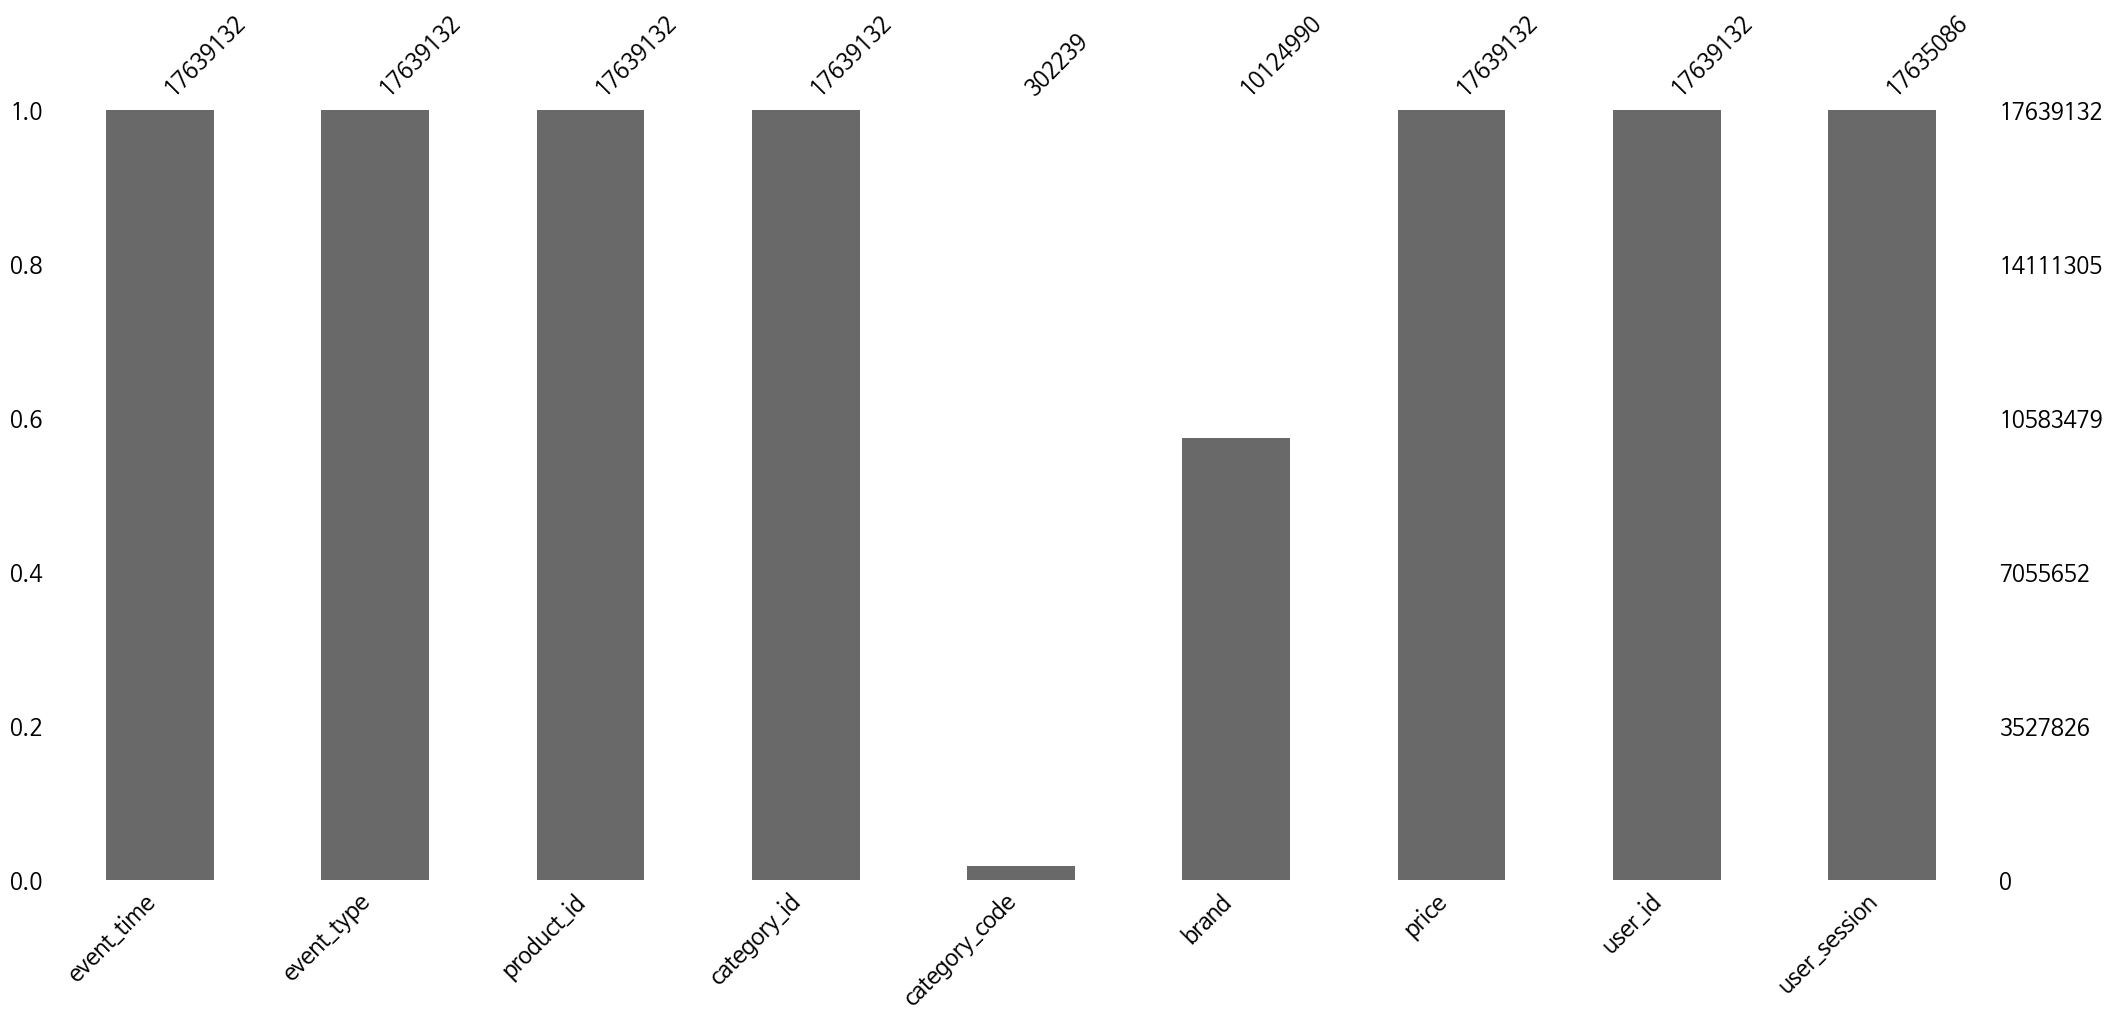

In [ ]:
# !pip install missingno
import missingno as msno
msno.bar(df)

In [7]:
# 'category_code' 컬럼 삭제
df.drop(['category_code'], axis=1, inplace=True)
df.head(3)

event_time event_type  product_id         category_id   brand  \
0  2019-10-01 00:00:00 UTC       cart     5773203 1487580000000000000  runail   
1  2019-10-01 00:00:03 UTC       cart     5773353 1487580000000000000  runail   
2  2019-10-01 00:00:07 UTC       cart     5881589 2151190000000000000  lovely   

   price    user_id                          user_session  
0      3  463240011  26dd6e6e-4dac-4778-8d2c-92e149dab885  
1      3  463240011  26dd6e6e-4dac-4778-8d2c-92e149dab885  
2     13  429681830  49e8d843-adf3-428b-a2c3-fe8bc6a307c9

In [ ]:
df.describe(include='all')

event_time event_type  product_id         category_id  \
count                  17639132   17639132    17639132            17639132   
unique                  7424770          4         NaN                 NaN   
top     2020-02-15 16:08:37 UTC       view         NaN                 NaN   
freq                       3087    8237771         NaN                 NaN   
mean                        NaN        NaN     5488248 1556053024747783680   
std                         NaN        NaN     1300583  171479967483666144   
min                         NaN        NaN        3752 1487580000000000000   
25%                         NaN        NaN     5726172 1487580005671109376   
50%                         NaN        NaN     5811800 1487580008246412288   
75%                         NaN        NaN     5859199 1487580013506068736   
max                         NaN        NaN     5932595 2242903426784559104   

           brand    price   user_id                          user_session  
count   10124990 17639132  17639132                              17635086  
unique       272      NaN       NaN                               3886500  
top       runail      NaN       NaN  74206ba1-c863-4760-bbdc-b11777059e46  
freq     1325155      NaN       NaN                                  5411  
mean         NaN        9 525320428                                   NaN  
std          NaN       19  87666458                                   NaN  
min          NaN      -79    465496                                   NaN  
25%          NaN        2 486620071                                   NaN  
50%          NaN        4 556045950                                   NaN  
75%          NaN        7 584777782                                   NaN  
max          NaN      328 622090237                                   NaN

### 1. price

* PRICE 0 이상 값 필터링

<ipython-input-8-7ba99c80b68d>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['price'], shade=True)


<function matplotlib.pyplot.show(close=None, block=None)>

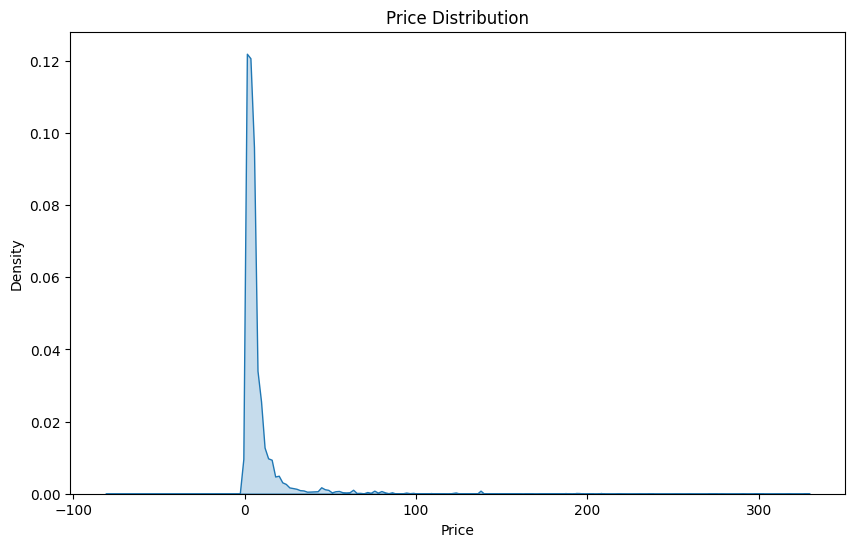

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['price'], shade=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show

In [ ]:
zero_price = len(df[df['price'] == 0])
print(f'가격이 0인 행 {zero_price}개')

가격이 0인 행 99316개


In [ ]:
no_price_df = df[df['price'] < 0]
no_price = len(df[df['price'] < 0])
print(f'가격이 0보다 작은 행 {no_price}개')

가격이 0보다 작은 행 115개


In [ ]:
no_price_df.head()

event_time event_type  product_id         category_id  \
112860  2019-10-01 19:10:56 UTC   purchase     5716857 1487580000000000000   
198302  2019-10-02 08:30:03 UTC   purchase     5716855 1487580000000000000   
436918  2019-10-03 17:37:04 UTC   purchase     5716859 1487580000000000000   
443204  2019-10-03 18:25:39 UTC   purchase     5670257 1487580000000000000   
73174   2019-11-01 15:36:23 UTC   purchase     5716855 1487580014042939648   

       brand  price    user_id                          user_session  
112860   NaN    -24  552507528  dcdd60c6-1a70-442d-bfb2-0252879054ad  
198302   NaN     -8  550375225  5ddec778-9464-4514-914d-be7b751b8e2c  
436918   NaN    -48  555414763  479149eb-1807-4178-8f6b-87c642350735  
443204   NaN    -16  556383221  4333d203-bc4d-4d0d-a6e1-0ea3a97a28c1  
73174    NaN     -8  566480066  34fa4291-9e2e-470f-a678-b84d9bbbdfe3

In [ ]:
no_price_df[no_price_df['user_id'] == 556383221]

event_time event_type  product_id         category_id  \
443204  2019-10-03 18:25:39 UTC   purchase     5670257 1487580000000000000   

       brand  price    user_id                          user_session  
443204   NaN    -16  556383221  4333d203-bc4d-4d0d-a6e1-0ea3a97a28c1

In [ ]:
df[(df['user_id'] == 556383221) & (df['product_id'] == 5670257)]

event_time event_type  product_id         category_id  \
443204  2019-10-03 18:25:39 UTC   purchase     5670257 1487580000000000000   

       brand  price    user_id                          user_session  
443204   NaN    -16  556383221  4333d203-bc4d-4d0d-a6e1-0ea3a97a28c1

* user_id와 product_id가 중복되는 행이 없는 것으로 보아 음수 값은 환불이 아닌 오류값으로 추정

In [8]:
df = df[df['price'] >= 0]

In [ ]:
df['price'].describe()

count   17639017
mean           9
std           19
min            0
25%            2
50%            4
75%            7
max          328
Name: price, dtype: float64

<ipython-input-28-7ba99c80b68d>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['price'], shade=True)


<function matplotlib.pyplot.show(close=None, block=None)>

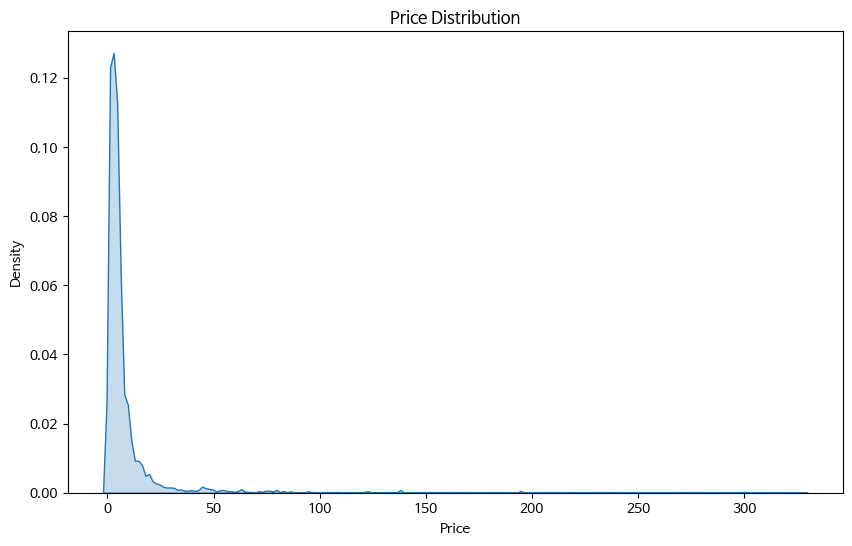

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['price'], shade=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show

###2. event_time

In [9]:
# event_time 컬럼 날짜 형식 변환
df['event_time'] = pd.to_datetime(df['event_time'])

In [ ]:
df['event_time'].describe(include='all')

count                               17639017
mean     2019-12-26 03:57:24.428902912+00:00
min                2019-10-01 00:00:00+00:00
25%                2019-11-23 18:17:04+00:00
50%                2019-12-26 09:16:55+00:00
75%                2020-01-30 07:21:59+00:00
max                2020-02-29 23:59:59+00:00
Name: event_time, dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17639017 entries, 0 to 4156681
Data columns (total 8 columns):
 #   Column        Dtype              
---  ------        -----              
 0   event_time    datetime64[ns, UTC]
 1   event_type    object             
 2   product_id    int64              
 3   category_id   float64            
 4   brand         object             
 5   price         float64            
 6   user_id       int64              
 7   user_session  object             
dtypes: datetime64[ns, UTC](1), float64(2), int64(2), object(3)
memory usage: 1.2+ GB


In [ ]:
df.to_csv('/content/drive/MyDrive/이커머스 프로젝트/ecommerce_data_1st', index=False)

###3. event_type

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/이커머스 프로젝트/ecommerce_data_1st')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17639017 entries, 0 to 17639016
Data columns (total 8 columns):
 #   Column        Dtype  
---  ------        -----  
 0   event_time    object 
 1   event_type    object 
 2   product_id    int64  
 3   category_id   float64
 4   brand         object 
 5   price         float64
 6   user_id       int64  
 7   user_session  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 1.1+ GB


In [ ]:
df.isnull().sum()/len(df)

event_time     0
event_type     0
product_id     0
category_id    0
brand          0
price          0
user_id        0
user_session   0
dtype: float64

#1

In [ ]:
df['event_type'].unique()

array(['cart', 'view', 'remove_from_cart', 'purchase'], dtype=object)

<ipython-input-23-28363ce04829>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=event_counts.index, y=event_counts.values, palette='viridis')


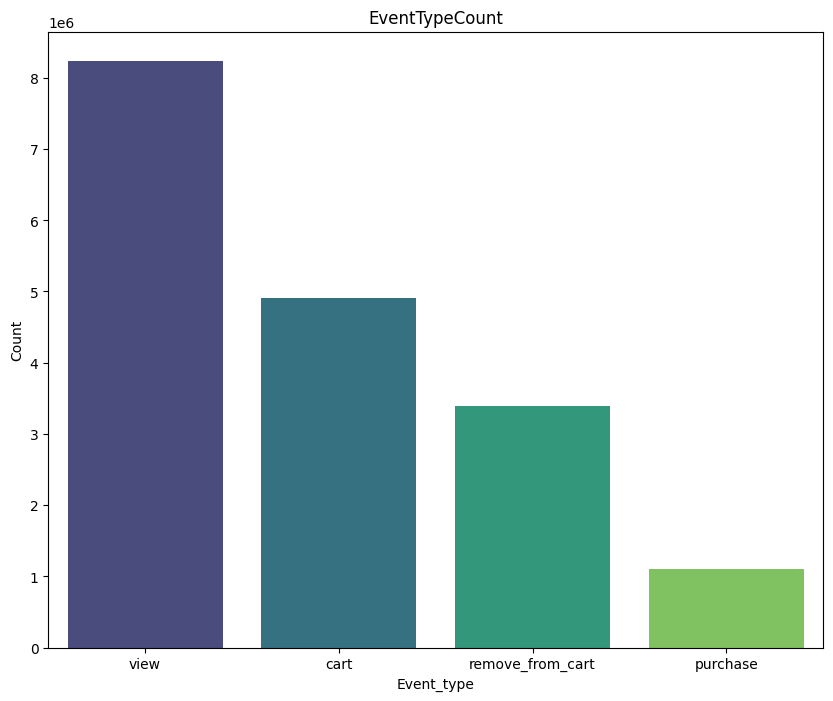

In [ ]:
# event_type의 횟수를 계산
event_counts = df['event_type'].value_counts()

plt.figure(figsize=(10, 8))
sns.barplot(x=event_counts.index, y=event_counts.values, palette='viridis')
plt.title('EventTypeCount')
plt.xlabel('Event_type')
plt.ylabel('Count')
plt.show()

###4. category_id

In [ ]:
len_category = len(df['category_id'].unique())
print(f'카테고리 종류 총 {len_category}개')

카테고리 종류 총 626개


In [ ]:
df.isnull().sum()

event_time            0
event_type            0
product_id            0
category_id           0
brand           7514027
price                 0
user_id               0
user_session       4046
dtype: int64

In [ ]:
df[df['user_session'].isnull()].head(20)

event_time event_type  product_id         category_id  \
22936   2019-10-01 07:39:05+00:00       cart     5727536 1487580000000000000   
22975   2019-10-01 07:39:29+00:00       cart     5699811 1487580000000000000   
53702   2019-10-01 11:29:29+00:00       cart     5873252 1487580000000000000   
61974   2019-10-01 12:34:50+00:00       cart     5861726 1487580000000000000   
65533   2019-10-01 13:06:35+00:00       cart     5665855 1487580000000000000   
89414   2019-10-01 16:45:00+00:00       cart     5793261 1487580000000000000   
153848  2019-10-02 02:40:47+00:00       cart     5875273 1487580000000000000   
194481  2019-10-02 08:09:32+00:00       cart     5686080 1487580000000000000   
194495  2019-10-02 08:09:35+00:00       cart     5686080 1487580000000000000   
223242  2019-10-02 10:46:31+00:00       cart     5866960 1487580000000000000   
236243  2019-10-02 11:54:11+00:00       cart     5880227 1487580000000000000   
240763  2019-10-02 12:14:45+00:00       cart     5760360 1487580000000000000   
246789  2019-10-02 12:42:08+00:00       cart        4958 1487580000000000000   
271920  2019-10-02 15:20:35+00:00       cart     5823778 1487580000000000000   
271933  2019-10-02 15:20:41+00:00       cart     5833318 1487580000000000000   
271938  2019-10-02 15:20:44+00:00       cart     5823778 1487580000000000000   
271948  2019-10-02 15:20:49+00:00       cart     5844359 1487580000000000000   
271975  2019-10-02 15:21:00+00:00       cart     5844360 1487580000000000000   
271997  2019-10-02 15:21:10+00:00       cart     5844360 1487580000000000000   
272014  2019-10-02 15:21:15+00:00       cart     5844361 1487580000000000000   

            brand  price    user_id user_session  
22936         NaN      3  555532580          NaN  
22975         NaN      3  555532580          NaN  
53702         NaN      4  401104846          NaN  
61974         NaN      7  555627944          NaN  
65533       irisk      2  555638076          NaN  
89414         NaN     22  555713414          NaN  
153848        NaN      7  555838430          NaN  
194481        NaN      1  415151266          NaN  
194495        NaN      1  415151266          NaN  
223242      sunuv     56  451061620          NaN  
236243        NaN      3  555998252          NaN  
240763     zinger      4  556002673          NaN  
246789     runail      1  544536170          NaN  
271920      estel      2  555980604          NaN  
271933  bpw.style      1  556063338          NaN  
271938      estel      2  555980604          NaN  
271948        NaN      5  555980604          NaN  
271975        NaN      5  555980604          NaN  
271997        NaN      5  555980604          NaN  
272014        NaN      5  555980604          NaN

In [ ]:
# 'user_session' null인 행 따로 모아놓음
session_null_df = df[df['user_session'].isnull()]

# category_id의 갯수 세기
category_count = session_null_df['category_id'].value_counts()

# 갯수 100개가 넘는 category_id 찾기
result = category_count[category_count > 100].index.tolist()

len(result) # user_id가 null인 행 100개가 넘는 category_id 총 8개

5

In [ ]:
category_count = session_null_df['category_id']
top10_category_count = category_count.head(10).value_counts().sort_values(ascending=False)

In [ ]:
session_null_df['event_type'].unique() # null 값 中 구매 행은 존재하지 않음

array(['cart', 'remove_from_cart', 'view'], dtype=object)

In [ ]:
session_null_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4046 entries, 22936 to 17634400
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   event_time    4046 non-null   object 
 1   event_type    4046 non-null   object 
 2   product_id    4046 non-null   int64  
 3   category_id   4046 non-null   float64
 4   brand         2590 non-null   object 
 5   price         4046 non-null   float64
 6   user_id       4046 non-null   int64  
 7   user_session  0 non-null      object 
dtypes: float64(2), int64(2), object(4)
memory usage: 284.5+ KB


> 이커머스 마케팅 KPI 3가지
1. CAC (고객획득비용) 고객을 데려오고
2. CR (Conversion Rate) 만족시키고
3. LTV (Lifetime Value) 유지시킨다

<구매 객단가 높이기>
- '원래의 구매보다 많이 하도록 유도!'
- 묶음 상품 판매시 가격 할인, 장바구니 페이지 관련 상품 혹은 보완재 추천 업셀링, 배송비


# NEW


In [ ]:
# changing the event_time coulmn to datetime64
df['event_time'] = pd.to_datetime(df['event_time'])
df.dtypes

event_time      datetime64[ns, UTC]
event_type                   object
product_id                    int64
category_id                 float64
brand                        object
price                       float64
user_id                       int64
user_session                 object
dtype: object

In [11]:
# Here i will add 6 new columns to help me with my analysis
# there are many ways to count a value in pandas ex(.value_counts(), for me i prefer to have a column that have a value of "1" for all rows to do the counting for the qualitative data
df['event_date'] = df['event_time'].dt.date
df['event_hour'] = df['event_time'].dt.hour
df['Day'] = df['event_time'].dt.day_name()
df["Month"] = df["event_time"].dt.month_name()
df['serial_number'] = np.arange(df.shape[0])
df['users'] = df['serial_number'].diff()
df.at[0, 'users'] = 1

In [66]:
df.head(3)

event_time event_type  product_id         category_id  \
0 2019-10-01 00:00:00+00:00       cart     5773203 1487580000000000000   
1 2019-10-01 00:00:03+00:00       cart     5773353 1487580000000000000   
2 2019-10-01 00:00:07+00:00       cart     5881589 2151190000000000000   

    brand  price    user_id                          user_session  event_date  \
0  runail      3  463240011  26dd6e6e-4dac-4778-8d2c-92e149dab885  2019-10-01   
1  runail      3  463240011  26dd6e6e-4dac-4778-8d2c-92e149dab885  2019-10-01   
2  lovely     13  429681830  49e8d843-adf3-428b-a2c3-fe8bc6a307c9  2019-10-01   

   event_hour      Day    Month  serial_number  users  
0           0  Tuesday  October              0      1  
1           0  Tuesday  October              1      1  
2           0  Tuesday  October              2      1

In [ ]:
df['serial_number'].describe()

count   17639017
mean     8819508
std      5091946
min            0
25%      4409754
50%      8819508
75%     13229262
max     17639016
Name: serial_number, dtype: float64

In [14]:
import plotly.express as px

# event_type이 purchase인 데이터만 필터링
purchase_events = df[df['event_type'] == 'purchase']

# 각 event_date와 event_type(purchase)별로 user_id 개수(count) 계산
purchase_event_count = purchase_events.groupby(["event_date"]).count().reset_index()

# Rename columns
purchase_event_count.rename(columns={'user_id': 'Users'}, inplace=True)

# Plotly Express를 사용하여 그래프 그리기
fig = px.bar(purchase_event_count, x="event_date", y="Users", title="Purchase Events by Days",
             text="Users", height=700)

# 그래프의 x축 레이블 각도 설정
fig.update_layout(xaxis_tickangle=-45)

# 그래프 출력
fig.show()


In [ ]:
import plotly.express as px

event_type_count = df.groupby(["event_date", "event_type"]).count()
event_type_count.rename(columns = {'user_id':'Users'}, inplace = True)

fig = px.bar(event_type_count.reset_index(), x="event_date", y="Users", color="event_type", title="Events by Days",text_auto=True,height=700)
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)


fig.update_layout(xaxis_tickangle=-45)
fig.show()

2019년 미국 블랙프라이데이 : 2019-11-29
 - 1주일 전부터 예비 세일 시작 (2019-11-22부터로 추정)

## 코호트 분석

In [41]:
# '구매' 데이터 한정하여 분석
cohort_df = df[df['event_type'] == 'purchase']

In [42]:
# event_time 컬럼 날짜 형식 변환
cohort_df['event_time'] = pd.to_datetime(cohort_df['event_time'])

<ipython-input-42-c62e8cde1238>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [43]:
cohort_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1096948 entries, 202 to 4156566
Data columns (total 14 columns):
 #   Column         Non-Null Count    Dtype              
---  ------         --------------    -----              
 0   event_time     1096948 non-null  datetime64[ns, UTC]
 1   event_type     1096948 non-null  object             
 2   product_id     1096948 non-null  int64              
 3   category_id    1096948 non-null  float64            
 4   brand          626093 non-null   object             
 5   price          1096948 non-null  float64            
 6   user_id        1096948 non-null  int64              
 7   user_session   1096948 non-null  object             
 8   event_date     1096948 non-null  object             
 9   event_hour     1096948 non-null  int32              
 10  Day            1096948 non-null  object             
 11  Month          1096948 non-null  object             
 12  serial_number  1096948 non-null  int64              
 13  users          

## 새로운 코호트

In [44]:
cohort_df.head(3)

event_time event_type  product_id         category_id  \
202 2019-10-01 00:06:35+00:00   purchase     5619862 1487580000000000000   
204 2019-10-01 00:06:35+00:00   purchase     5619866 1487580000000000000   
205 2019-10-01 00:06:35+00:00   purchase     5696184 1487580000000000000   

      brand  price    user_id                          user_session  \
202  runail      5  474232307  445f2b74-5e4c-427e-b7fa-6e0a28b156fe   
204  runail      3  474232307  445f2b74-5e4c-427e-b7fa-6e0a28b156fe   
205  runail      2  474232307  445f2b74-5e4c-427e-b7fa-6e0a28b156fe   

     event_date  event_hour      Day    Month  serial_number  users  
202  2019-10-01           0  Tuesday  October            202      1  
204  2019-10-01           0  Tuesday  October            204      1  
205  2019-10-01           0  Tuesday  October            205      1

In [45]:
cohort_df = cohort_df[['user_id','user_session','event_date','price']]

In [46]:
# event_time 컬럼 날짜 형식 변환
cohort_df['event_date'] = pd.to_datetime(cohort_df['event_date'])

In [47]:
cohort_df.sample(10)

user_id                          user_session event_date  price
2726739  604225976  87374a1d-871a-4aa0-9168-4ec0e0dd8db1 2020-01-21      4
2457688  417379229  195e822a-4b5a-4eeb-a05f-ccb917c42908 2019-12-19     10
1588420  570511645  00e27e3b-3c9e-4c75-9385-c5f771bfd32c 2019-11-12      9
1352268  572171108  4826a6dd-44fa-4e50-b912-919c89779ec6 2020-01-12      3
1558349  538983676  742dfa61-7df8-44a4-a775-6a09b3b856d7 2019-12-12      6
1916659  589082708  33f0befe-65cb-46e9-8fd9-cb859e6ab801 2020-01-15      3
3047296  618537341  8d5abcc5-00dd-4162-a044-e04fd222c04c 2020-02-21      3
3550907  511286935  14d29617-833e-4f53-bbf9-18e56e0d9f3e 2019-11-24     38
4088662  455746244  7807c9aa-6363-4ca3-bd58-fd955f59c037 2019-11-28      1
4026312  477526723  939a9742-513f-4b21-923d-6f44d1a18a9a 2020-01-30      5

In [48]:
cohort_df['First_Purchase'] = cohort_df.groupby(['user_id'])['event_date'].transform('min')

In [49]:
cohort_df[['user_id', 'event_date','First_Purchase']].sample(5)
# 샘플 행으로 구매 당시 시간과 해당 고객이 처음으로 주문한 날짜 파악

user_id event_date First_Purchase
983638   408111999 2019-11-08     2019-11-08
977021   598606207 2020-01-09     2020-01-09
2518512  566041851 2020-01-20     2020-01-20
1464707  469317338 2019-12-11     2019-12-11
1030611  606873159 2020-02-07     2020-02-07

In [50]:
# year_dff
year_diff = cohort_df['event_date'].dt.year - cohort_df['First_Purchase'].dt.year
# month_dff
month_diff = cohort_df['event_date'].dt.month - cohort_df['First_Purchase'].dt.month
month_diff.value_counts()

 0     841045
 1      88630
-10     69363
-9      53705
-11     21107
-8      11749
 2      11349
Name: count, dtype: int64

In [51]:
cohort_df['cohort_index'] = (year_diff * 12) + (month_diff + 1)

In [52]:
cohort_df['cohort_index'].value_counts() # 구매 월 차이를 알아볼 수 있음

cohort_index
1    841045
2    109737
3     80712
4     53705
5     11749
Name: count, dtype: int64

In [58]:
# 거래 날짜의 월
cohort_df['Purchase_Month'] = cohort_df['event_date'].dt.to_period('M')
# chort_월 : 해당 고객이 유입된 달
cohort_df['cohort_Month'] = cohort_df.groupby('user_id')['Purchase_Month'].transform('min')

In [59]:
cohort_df.sample(5)

user_id                          user_session event_date  price  \
3369603  575411760  b7781689-c106-75c0-1897-f7ca149ede17 2019-11-23      4   
837158   568446346  3c979af7-6be2-4255-b5d2-5dbbbf1df519 2019-11-07      3   
2971235  296420277  56652c05-c78d-425c-88a5-32236bb759d2 2020-01-23      3   
3433817  496160369  67032802-4e1a-4897-bbf8-feb524932630 2020-02-25      2   
1701642  530443535  39bc1cce-b6d8-d8f6-440b-85bff837ff36 2019-11-13      3   

        First_Purchase  cohort_index Purchase_Month cohort_Month  
3369603     2019-11-23             1        2019-11      2019-11  
837158      2019-11-07             1        2019-11      2019-11  
2971235     2019-12-08             2        2020-01      2019-12  
3433817     2019-11-22             4        2020-02      2019-11  
1701642     2019-11-13             1        2019-11      2019-11

In [61]:
cohort_retention = cohort_df.groupby(['cohort_Month', 'cohort_index'])['user_id'].nunique().reset_index()
cohort_retention.head(10)

cohort_Month  cohort_index  user_id
0      2019-10             1     6401
1      2019-10             2     1280
2      2019-10             3      908
3      2019-10             4      924
4      2019-10             5      780
5      2019-11             1    30244
6      2019-11             2     3801
7      2019-11             3     4035
8      2019-11             4     3188
9      2019-12             1    20904

In [62]:
# retetion 피벗테이블
pivot_retention = cohort_retention.pivot(index='cohort_Month', columns='cohort_index', values='user_id').round(1)
pivot_retention

cohort_index     1    2    3    4   5
cohort_Month                         
2019-10       6401 1280  908  924 780
2019-11      30244 3801 4035 3188 NaN
2019-12      20904 2024 1570  NaN NaN
2020-01      21237 1981  NaN  NaN NaN
2020-02      18240  NaN  NaN  NaN NaN

In [63]:
sizes = pivot_retention.iloc[:, 0]
retention = pivot_retention.divide(sizes, axis=0).round(2)
retention

cohort_index  1   2   3   4   5
cohort_Month                   
2019-10       1   0   0   0   0
2019-11       1   0   0   0 NaN
2019-12       1   0   0 NaN NaN
2020-01       1   0 NaN NaN NaN
2020-02       1 NaN NaN NaN NaN

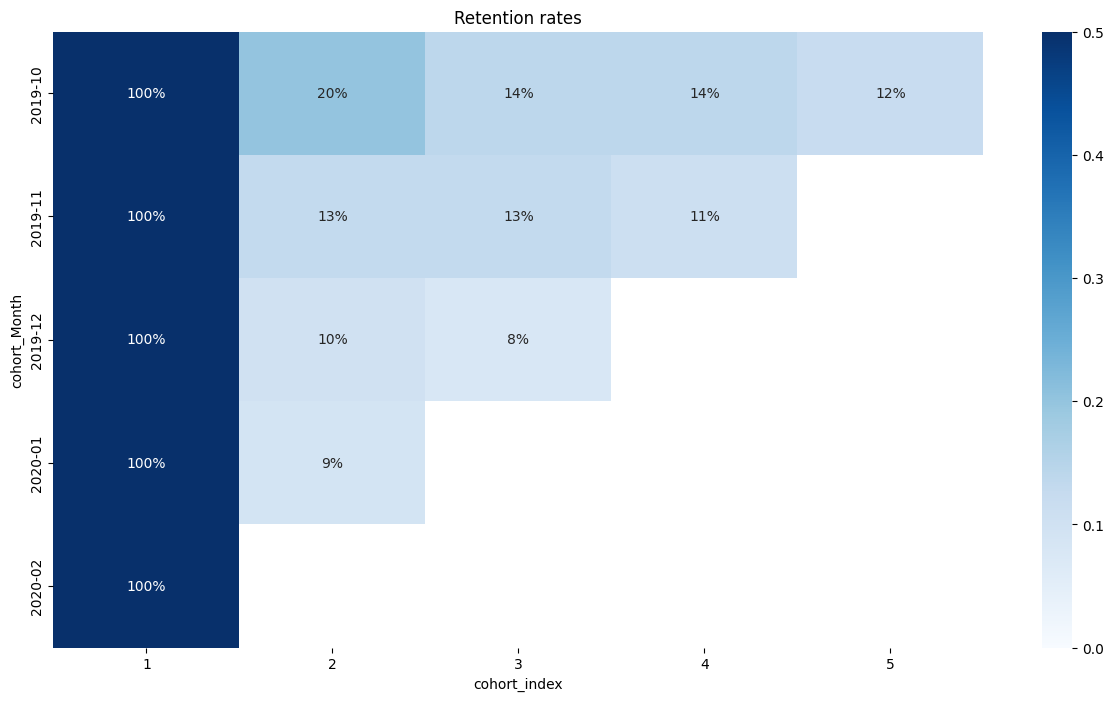

In [64]:
plt.figure(figsize=(15, 8))
plt.title('Retention rates')
sns.heatmap(data=retention, annot=True, fmt='.0%', vmin=0.0, vmax=0.5, cmap='Blues')
plt.show()


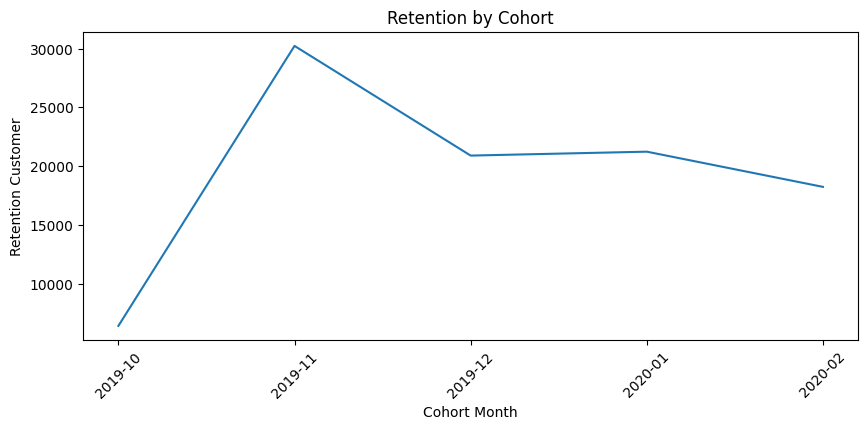

In [65]:
# 월 별로 신규 구매 고객 수 추이
pivot_retention_str = pivot_retention[1].index.astype(str)

plt.figure(figsize=(10, 4))
plt.plot(pivot_retention_str, pivot_retention[1])
plt.title('Retention by Cohort')
plt.xlabel('Cohort Month')
plt.ylabel('Retention Customer')
plt.xticks(rotation=45)  # x축 라벨 회전
plt.show()

## 기존 코호트

In [18]:
cohort_df.sample(3)

event_time event_type  product_id         category_id  \
109906  2019-11-01 21:00:17+00:00   purchase     5862572 1487580008145748992   
176715  2019-11-02 14:27:07+00:00   purchase     5724668 1487580005427839744   
2192071 2019-12-17 17:47:01+00:00   purchase     5731059 1487580004916134656   

            brand  price    user_id                          user_session  \
109906   roubloff      5  566582453  12a18f76-8956-4f9b-bba2-31ae51e30069   
176715      irisk      2  514908450  70f35a82-d969-4b51-b19c-7466086326e7   
2192071       NaN      6  496580058  fe403fd7-30ce-40ee-a6e3-cc8b84faa8ca   

         event_date  event_hour       Day     Month  serial_number  users  
109906   2019-11-01          21    Friday  November        1158476      1  
176715   2019-11-02          14  Saturday  November        1225285      1  
2192071  2019-12-17          17   Tuesday  December        7876455      1

In [ ]:
cohort_df.groupby(['user_id'])['event_time'].transform('min')

202        2019-10-01 00:06:35+00:00
204        2019-10-01 00:06:35+00:00
205        2019-10-01 00:06:35+00:00
206        2019-10-01 00:06:35+00:00
207        2019-10-01 00:06:35+00:00
                      ...           
17638684   2020-02-29 23:46:01+00:00
17638898   2020-02-29 23:54:44+00:00
17638899   2020-02-29 23:54:44+00:00
17638900   2020-02-29 23:54:44+00:00
17638901   2020-02-29 23:54:44+00:00
Name: event_time, Length: 1096948, dtype: datetime64[ns, UTC]

In [ ]:
cohort_df['First_Purchase'] = cohort_df.groupby(['user_id'])['event_time'].transform('min')

<ipython-input-35-50c7eee1aac7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df['First_Purchase'] = cohort_df.groupby(['user_id'])['event_time'].transform('min')


In [ ]:
cohort_df[['user_id', 'event_time','First_Purchase']].sample(5)
# 샘플 행으로 구매 당시 시간과 해당 고객이 처음으로 주문한 날짜 파악

user_id                event_time            First_Purchase
15308551  614040081 2020-02-12 21:40:15+00:00 2020-02-12 21:40:15+00:00
4504757   565148920 2019-11-24 09:08:31+00:00 2019-11-24 09:08:31+00:00
1234764   303835039 2019-11-02 16:01:05+00:00 2019-11-02 16:01:05+00:00
5601754   551331613 2019-11-30 14:17:16+00:00 2019-11-30 14:17:16+00:00
5064265   576929442 2019-11-27 19:22:47+00:00 2019-11-27 19:22:47+00:00

In [ ]:
different_rows = cohort_df[cohort_df['event_time'] != cohort_df['First_Purchase']].shape[0]
total_rows = cohort_df.shape[0]

different_percentage = (different_rows / total_rows) * 100

print(f'재구매가 이루어진 비율: {different_percentage: .2f}%')

재구매가 이루어진 비율:  32.21%


In [ ]:
# year_dff
year_diff = cohort_df['event_time'].dt.year - cohort_df['First_Purchase'].dt.year
# month_dff
month_diff = cohort_df['event_time'].dt.month - cohort_df['First_Purchase'].dt.month
month_diff.value_counts()

 0     841045
 1      88630
-10     69363
-9      53705
-11     21107
-8      11749
 2      11349
Name: count, dtype: int64

In [ ]:
year_diff.value_counts()

0    941024
1    155924
Name: count, dtype: int64

In [ ]:
cohort_df['cohort_index'] = (year_diff * 12) + (month_diff + 1)

<ipython-input-40-7fd0b2a0902d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df['cohort_index'] = (year_diff * 12) + (month_diff + 1)


In [ ]:
cohort_df['cohort_index'].value_counts() # 구매 월 차이를 알아볼 수 있음

cohort_index
1    841045
2    109737
3     80712
4     53705
5     11749
Name: count, dtype: int64

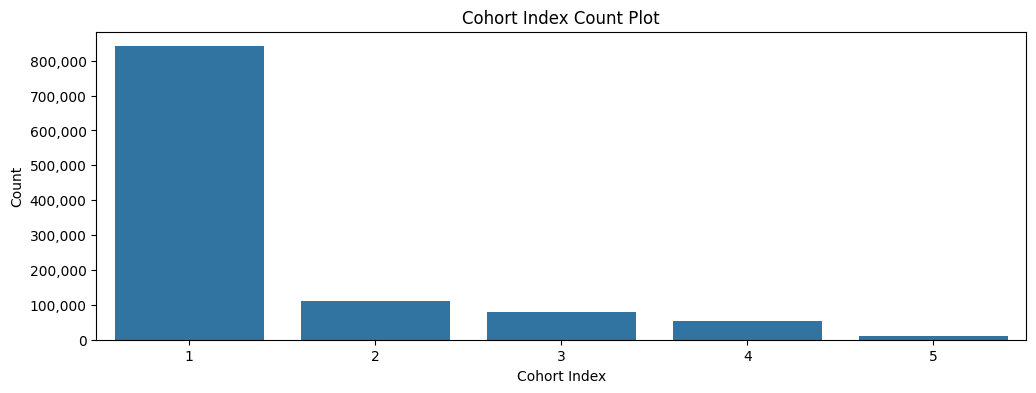

In [ ]:
plt.figure(figsize=(12,4))
sns.countplot(data=cohort_df, x='cohort_index')

# y축의 눈금 조정
plt.yscale('linear')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.xlabel('Cohort Index')
plt.ylabel('Count')
plt.title('Cohort Index Count Plot')
plt.show()

In [ ]:
cohort_df['First_Purchase_YM'] = cohort_df['First_Purchase'].astype(str).str[:7]

<ipython-input-43-b06253cd6a8f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df['First_Purchase_YM'] = cohort_df['First_Purchase'].astype(str).str[:7]


In [ ]:
cohort_count = cohort_df.groupby(['First_Purchase_YM','cohort_index'])['user_id'].nunique().unstack()
# 1 = 해당 달에 처음 구매한 고객의 수 (신규유치고객)
cohort_count

cohort_index          1    2    3    4   5
First_Purchase_YM                         
2019-10            6401 1280  908  924 780
2019-11           30244 3801 4035 3188 NaN
2019-12           20904 2024 1570  NaN NaN
2020-01           21237 1981  NaN  NaN NaN
2020-02           18240  NaN  NaN  NaN NaN

<Axes: xlabel='cohort_index', ylabel='First_Purchase_YM'>

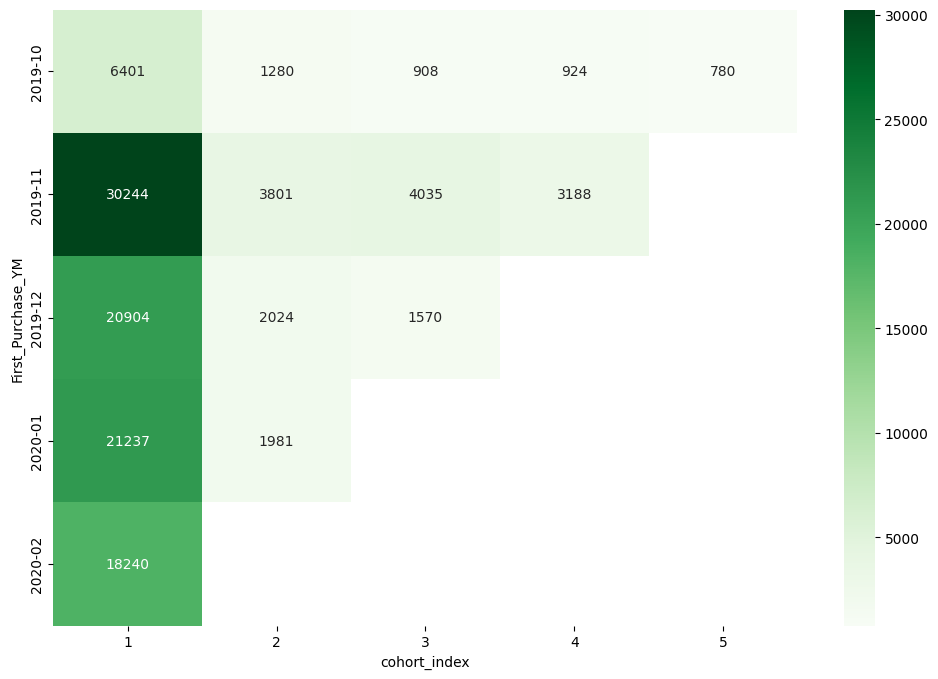

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(cohort_count, cmap='Greens', annot=True, fmt=".0f") # 잔존 빈도

<Axes: title={'center': 'Monthly New Customer Count'}, xlabel='First_Purchase_YM'>

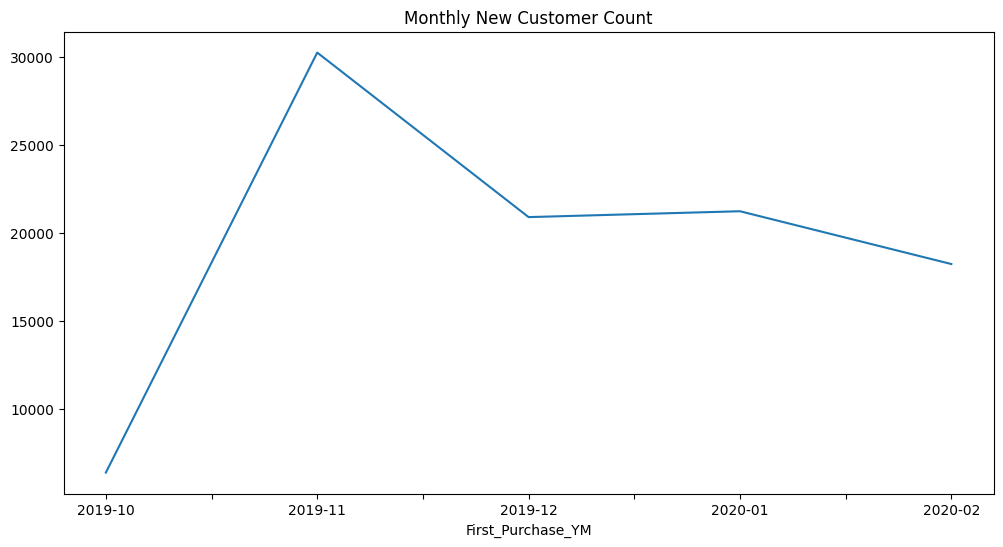

In [ ]:
cohort_count[1].plot(figsize=(12, 6), rot=0, title='Monthly New Customer Count')

<Axes: title={'center': 'Monthly New Customer Count'}, xlabel='First_Purchase_YM'>

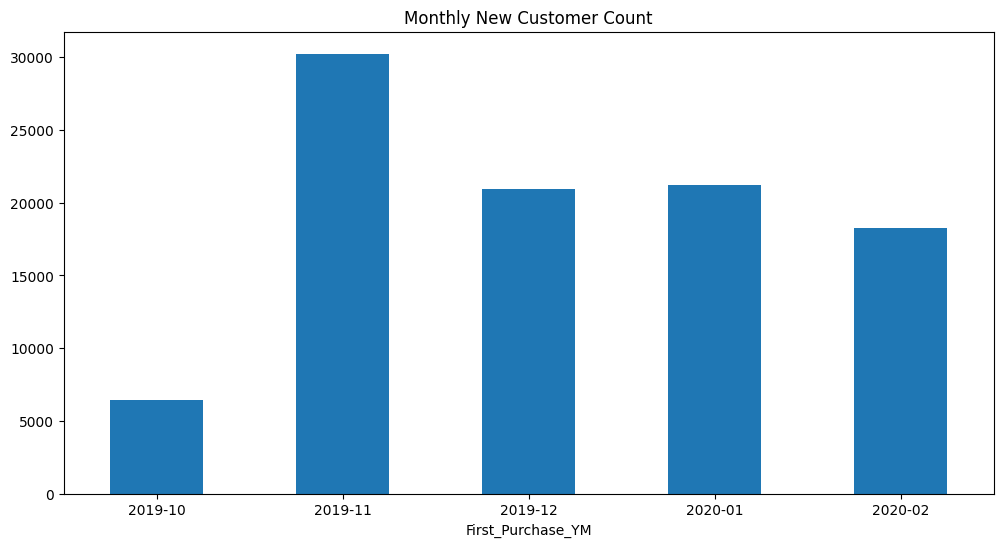

In [ ]:
cohort_count[1].plot(kind='bar', figsize=(12, 6), rot=0,title='Monthly New Customer Count') # rot = 축 이름 가지런히 놓는 방법

### 잔존율

In [ ]:
cohort_count

cohort_index          1    2    3    4   5
First_Purchase_YM                         
2019-10            6401 1280  908  924 780
2019-11           30244 3801 4035 3188 NaN
2019-12           20904 2024 1570  NaN NaN
2020-01           21237 1981  NaN  NaN NaN
2020-02           18240  NaN  NaN  NaN NaN

In [ ]:
# 소수점 이하 값까지 표시하기 위해 소수점 자리수를 설정
pd.options.display.float_format = '{:.4f}'.format

cohort_norm = cohort_count.div(cohort_count[1], axis=0)
cohort_norm

cohort_index           1      2      3      4      5
First_Purchase_YM                                   
2019-10           1.0000 0.2000 0.1419 0.1444 0.1219
2019-11           1.0000 0.1257 0.1334 0.1054    NaN
2019-12           1.0000 0.0968 0.0751    NaN    NaN
2020-01           1.0000 0.0933    NaN    NaN    NaN
2020-02           1.0000    NaN    NaN    NaN    NaN

<Axes: xlabel='cohort_index', ylabel='First_Purchase_YM'>

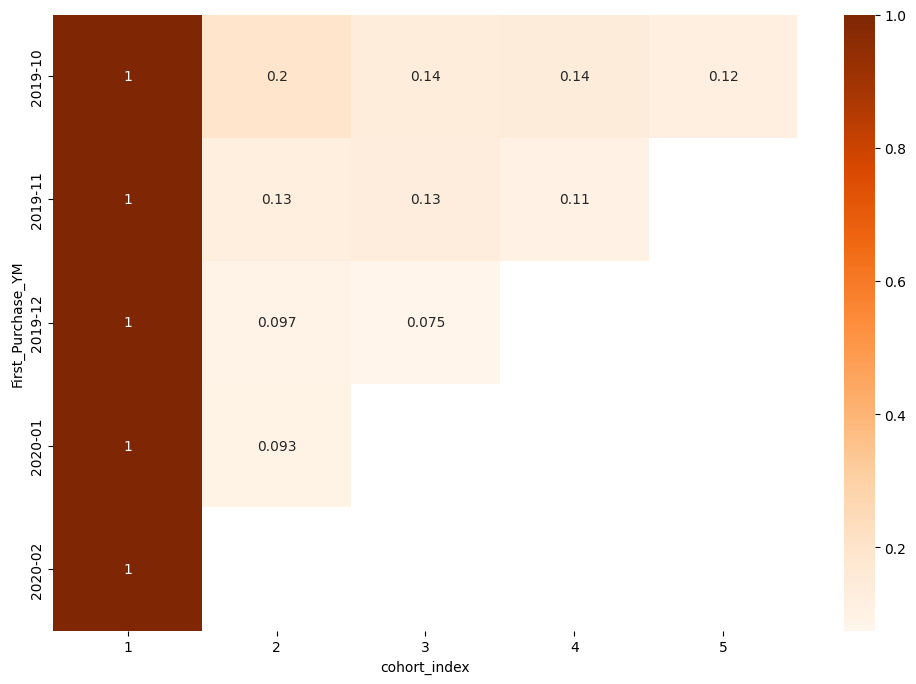

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(cohort_norm, cmap='Oranges', annot=True)

### 고객별 매출액

In [ ]:
cohort_df.head()

event_time event_type  product_id              category_id  \
202 2019-10-01 00:06:35+00:00   purchase     5619862 1487580000000000000.0000   
204 2019-10-01 00:06:35+00:00   purchase     5619866 1487580000000000000.0000   
205 2019-10-01 00:06:35+00:00   purchase     5696184 1487580000000000000.0000   
206 2019-10-01 00:06:35+00:00   purchase     5706784 1487580000000000000.0000   
207 2019-10-01 00:06:35+00:00   purchase     5723503 1487580000000000000.0000   

      brand  price    user_id                          user_session  \
202  runail 5.3200  474232307  445f2b74-5e4c-427e-b7fa-6e0a28b156fe   
204  runail 2.8600  474232307  445f2b74-5e4c-427e-b7fa-6e0a28b156fe   
205  runail 2.3800  474232307  445f2b74-5e4c-427e-b7fa-6e0a28b156fe   
206  runail 4.4400  474232307  445f2b74-5e4c-427e-b7fa-6e0a28b156fe   
207  runail 2.6200  474232307  445f2b74-5e4c-427e-b7fa-6e0a28b156fe   

               First_Purchase  cohort_index First_Purchase_YM  
202 2019-10-01 00:06:35+00:00             1           2019-10  
204 2019-10-01 00:06:35+00:00             1           2019-10  
205 2019-10-01 00:06:35+00:00             1           2019-10  
206 2019-10-01 00:06:35+00:00             1           2019-10  
207 2019-10-01 00:06:35+00:00             1           2019-10

In [ ]:
cohort_total_price = cohort_df.groupby(["First_Purchase_YM","cohort_index"])['price'].sum().unstack()
# 코호트 인덱스 값에 따른 매출액 합계값
cohort_total_price

cohort_index                 1           2           3           4          5
First_Purchase_YM                                                            
2019-10            274529.2900  98534.7000  55385.9000  66974.0700 58393.8700
2019-11           1432974.2700 199995.6200 250241.5100 194847.8200        NaN
2019-12            822783.0100 100030.8700  79819.6000         NaN        NaN
2020-01            905447.7700 106354.9500         NaN         NaN        NaN
2020-02            767952.3400         NaN         NaN         NaN        NaN

<Axes: xlabel='cohort_index', ylabel='First_Purchase_YM'>

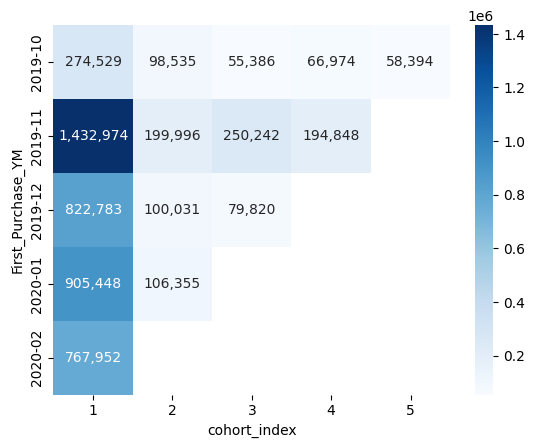

In [ ]:
sns.heatmap(cohort_total_price, cmap='Blues', annot=True, fmt=',.0f')

##Retentioneering

In [ ]:
!pip install retentioneering
import retentioneering
from retentioneering.eventstream import Eventstream

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 915.5/915.5 kB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 42.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 80.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 90.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 98.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 92.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 88.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 59.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.9/426.9 kB 41.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 23.6 MB/s eta 

In [ ]:
df.rename(columns={'event_type':'event','event_time':'timestamp'},inplace=True)

In [ ]:
stream = Eventstream(df, user_sample_size=0.1, user_sample_seed=42)

stream.describe()

value
category          metric                                       
overall           unique_users                           143504
                  unique_events                               6
                  eventstream_start   2019-10-01 00:01:25+00:00
                  eventstream_end     2020-02-29 23:59:59+00:00
                  eventstream_length          151 days 23:58:34
path_length_time  mean                          7 days 07:45:27
                  std                          21 days 19:46:38
                  median                        0 days 00:00:17
                  min                           0 days 00:00:00
                  max                         151 days 23:24:49
path_length_steps mean                                  14.2100
                  std                                   70.2800
                  median                                 4.0000
                  min                                         3
                  max                                      9422

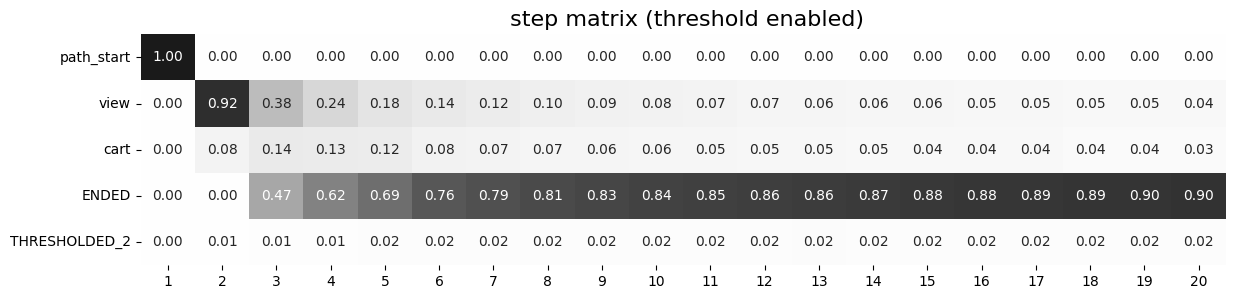

In [ ]:
stream.step_matrix(threshold=0.02)
# threshold는 0.02보다 최댓값이 낮은 단계별 이벤트는 제외하고 기록하는 것을 의미
## 그래서 remove in cart 단계는 비율이 0.02보다 낮아 THRESHOLDED_2 로 넘어간 것

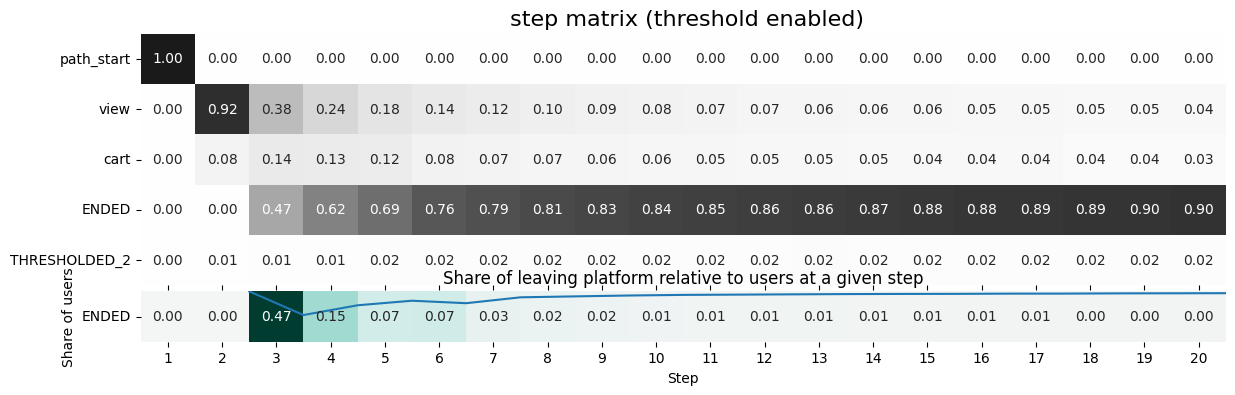

In [ ]:
sm = stream.step_matrix(threshold=0.05, targets=['ENDED'])

ended_on_step = sm.values[1].loc["ENDED"]
users_on_step = 1 - sm.values[0].loc["ENDED"].shift(1)
ended_share = ended_on_step / users_on_step.dropna()

plt.title('Share of leaving platform relative to users at a given step')
plt.xlabel('Step')
plt.ylabel('Share of users')
plt.plot(ended_share)
plt.show()

# RFM

#### 전처리

In [158]:
df = pd.read_csv('/content/drive/MyDrive/이커머스 프로젝트/ecommerce_data_1st')

In [159]:
df['event_time'] = pd.to_datetime(df['event_time'])

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17639017 entries, 0 to 17639016
Data columns (total 8 columns):
 #   Column        Dtype              
---  ------        -----              
 0   event_time    datetime64[ns, UTC]
 1   event_type    object             
 2   product_id    int64              
 3   category_id   float64            
 4   brand         object             
 5   price         float64            
 6   user_id       int64              
 7   user_session  object             
dtypes: datetime64[ns, UTC](1), float64(2), int64(2), object(3)
memory usage: 1.1+ GB


In [161]:
df.shape

(17639017, 8)

In [162]:
df.head(2)

event_time event_type  product_id         category_id  \
0 2019-10-01 00:00:00+00:00       cart     5773203 1487580000000000000   
1 2019-10-01 00:00:03+00:00       cart     5773353 1487580000000000000   

    brand  price    user_id                          user_session  
0  runail      3  463240011  26dd6e6e-4dac-4778-8d2c-92e149dab885  
1  runail      3  463240011  26dd6e6e-4dac-4778-8d2c-92e149dab885

In [163]:
df = df.iloc[:, [6,7,0,1,2,3,4,5]] # 데이터 내 컬럼 순서 변경
df.head(3)

user_id                          user_session                event_time  \
0  463240011  26dd6e6e-4dac-4778-8d2c-92e149dab885 2019-10-01 00:00:00+00:00   
1  463240011  26dd6e6e-4dac-4778-8d2c-92e149dab885 2019-10-01 00:00:03+00:00   
2  429681830  49e8d843-adf3-428b-a2c3-fe8bc6a307c9 2019-10-01 00:00:07+00:00   

  event_type  product_id         category_id   brand  price  
0       cart     5773203 1487580000000000000  runail      3  
1       cart     5773353 1487580000000000000  runail      3  
2       cart     5881589 2151190000000000000  lovely     13

In [14]:
df.describe(include='all')

user_id                          user_session  \
count   17639017                              17634971   
unique       NaN                               3886499   
top          NaN  74206ba1-c863-4760-bbdc-b11777059e46   
freq         NaN                                  5411   
mean   525320377                                   NaN   
min       465496                                   NaN   
25%    486620071                                   NaN   
50%    556045950                                   NaN   
75%    584777782                                   NaN   
max    622090237                                   NaN   
std     87666433                                   NaN   

                                 event_time event_type  product_id  \
count                              17639017   17639017    17639017   
unique                                  NaN          4         NaN   
top                                     NaN       view         NaN   
freq                                    NaN    8237769         NaN   
mean    2019-12-26 03:57:24.428902912+00:00        NaN     5488247   
min               2019-10-01 00:00:00+00:00        NaN        3752   
25%               2019-11-23 18:17:04+00:00        NaN     5726172   
50%               2019-12-26 09:16:55+00:00        NaN     5811800   
75%               2020-01-30 07:21:59+00:00        NaN     5859199   
max               2020-02-29 23:59:59+00:00        NaN     5932595   
std                                     NaN        NaN     1300587   

               category_id     brand    price  
count             17639017  10124990 17639017  
unique                 NaN       272      NaN  
top                    NaN    runail      NaN  
freq                   NaN   1325155      NaN  
mean   1556053471167008000       NaN        9  
min    1487580000000000000       NaN        0  
25%    1487580005671109376       NaN        2  
50%    1487580008246412288       NaN        4  
75%    1487580013506068736       NaN        7  
max    2242903426784559104       NaN      328  
std     171480437347118816       NaN       19

In [164]:
# user_id 있는 행
df_valid = df[df['user_id'].notnull() & (df['price'] > 0) & (df['event_type'] == 'purchase')]
df_valid.shape

(1096947, 8)

- **약 110만개 행**

In [16]:
monetary_df = df_valid.groupby('user_id')['price'].sum().reset_index()
monetary_df.head()

user_id  price
0   9794320     13
1  10079204     26
2  10280338    178
3  12055855     17
4  12936739     30

In [17]:
monetary_df.describe(include='all')

user_id  price
count     97026  97026
mean  531096145     56
std    88320873     83
min     9794320      0
25%   497060962     16
50%   564605328     33
75%   590223547     61
max   622073202   2857

In [18]:
monetary_df[monetary_df['price'] > 2000]

user_id  price
262    150318419   2857
1613   247216055   2570
18637  469299888   2412
19009  471197852   2672
32613  531900924   2751
45010  557790271   2716
47158  562167663   2243
48771  565036131   2556
56342  572081598   2213

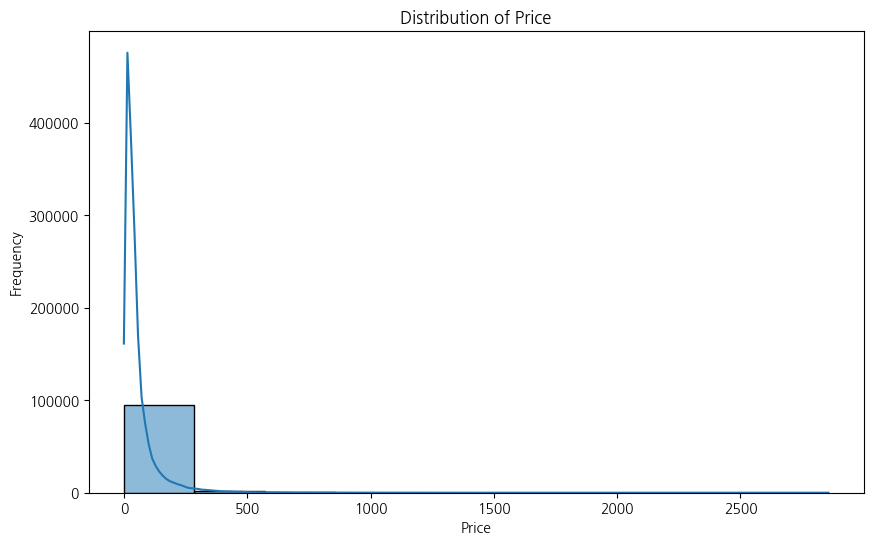

In [ ]:
# price 컬럼의 값의 분포를 히스토그램으로 시각화
plt.figure(figsize=(10, 6))
sns.histplot(monetary_df['price'], bins=10, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [19]:
df_valid.duplicated()
df_valid[df_valid.duplicated(keep="first")].head(10)

user_id                          user_session  \
12975   486637085  205bec28-f4a8-4c83-a239-ad4061d9ec1e   
18102   483780690  c7fdeffd-21ec-72c7-3a28-0c38960edc5c   
29369   474393926  1384092e-8aa7-4431-bb8b-d06e6f8f2cbb   
34950   450205849  a6f2286a-f34d-452d-aa19-39ae77dc4926   
35198   550049808  130d5b4c-98a0-493f-b2c4-384e7fff533c   
57942   439462386  3ec08964-1d01-431a-9619-5861dfb6099a   
69529   345161926  34d7a36b-a705-4b20-999a-77fca132918d   
107613  307510697  2fefa203-5a5b-4f7a-a24f-a43516d9df67   
121503  555428551  ada0c427-209e-4f89-acca-b4f19fdbf7ff   
289009  556091079  384466c8-207f-4594-bc13-03c260bc6ee3   

                      event_time event_type  product_id         category_id  \
12975  2019-10-01 06:07:38+00:00   purchase     5743974 1487580000000000000   
18102  2019-10-01 06:52:39+00:00   purchase     5823288 1487580000000000000   
29369  2019-10-01 08:35:09+00:00   purchase     5804051 1487580000000000000   
34950  2019-10-01 09:19:48+00:00   purchase     5803966 1487580000000000000   
35198  2019-10-01 09:22:19+00:00   purchase     5749199 1487580000000000000   
57942  2019-10-01 12:03:51+00:00   purchase     5760789 1487580000000000000   
69529  2019-10-01 13:38:19+00:00   purchase     5854314 1487580000000000000   
107613 2019-10-01 18:39:37+00:00   purchase     5804371 1487580000000000000   
121503 2019-10-01 20:03:33+00:00   purchase     5743974 1487580000000000000   
289009 2019-10-02 17:14:22+00:00   purchase     5723515 1487580000000000000   

          brand  price  
12975   italwax      2  
18102    runail      2  
29369   bluesky      4  
34950   bluesky      4  
35198   italwax      2  
57942    runail      3  
69529    runail      2  
107613  bluesky      4  
121503  italwax      2  
289009   runail      3

In [20]:
df_valid[df_valid.duplicated(keep='first')].sort_values(['user_id','event_time']).head(20)

user_id                          user_session  \
16678267   72655920  c5643d68-0641-4f40-9f1e-7019a49ec320   
10742445  150318419  e3e25ff3-7338-4e28-a2f0-6aa1e33c37d2   
1395378   168757641  219244d6-4dc2-4398-8f10-a496293c8ff4   
1957066   172974485  15c8a6d8-cad6-45c3-aa38-d0b39b8a0c9d   
13867237  172974485  15c8a6d8-cad6-45c3-aa38-d0b39b8a0c9d   
8497712   230911992  95ed4f14-39ed-45ed-b2d7-d800219127b2   
8501471   230911992  e259d064-91dc-42e6-88c2-e5fa10ad3386   
1132644   231647424  4f745cec-dd50-76fe-6c40-4806c8e6098d   
4971973   233100987  7cbeebfb-71e3-44cd-8bc6-76ca235074e2   
10417585  235267883  8fc524b5-8349-4abf-8759-779438cbbfb8   
3347434   236122009  733bb242-e78d-4977-bc13-74ece161b377   
11381803  240124573  efc59b7e-f1f4-406e-8186-a6cd85479592   
12189613  244716585  5b810b21-0097-4cb8-9ed7-c9fdcff1d6b4   
10506147  252880948  9136901c-ce4d-4970-ab02-30c9788d4397   
4881125   256480321  7f882e18-d40a-49e1-9e45-8d5968f1d785   
10990958  262453727  3ccba3dc-2625-4cd4-9b12-fcc2a88dd072   
5679829   268575911  21800141-bbd4-4e10-9834-e9b1990fe41b   
541516    273308416  fa419686-2232-43b3-a4f0-588f9ee955b2   
14230452  274561386  619438d5-9985-43c0-b93c-30d7c922ae15   
16014298  275131685  4660e348-0767-4ed9-9c12-0fba3ba64644   

                        event_time event_type  product_id         category_id  \
16678267 2020-02-23 10:16:20+00:00   purchase     5738998 1487580013858390528   
10742445 2020-01-13 13:05:12+00:00   purchase     5763933 1487580005671109376   
1395378  2019-11-03 20:48:14+00:00   purchase     5747406 1487580005671109376   
1957066  2019-11-07 16:01:03+00:00   purchase     5809303 1487580007675986944   
13867237 2020-02-03 13:21:41+00:00   purchase     5809303 1487580007675986944   
8497712  2019-12-23 11:02:56+00:00   purchase     5804463 1487580005461394176   
8501471  2019-12-23 11:34:04+00:00   purchase     5804463 1487580005461394176   
1132644  2019-11-01 17:21:29+00:00   purchase     5896509 1487580008313521152   
4971973  2019-11-27 07:49:21+00:00   purchase     5738759 1487580013581566208   
10417585 2020-01-11 08:36:14+00:00   purchase     5803898 1487580005461394176   
3347434  2019-11-18 04:34:02+00:00   purchase     5747406 1487580005671109376   
11381803 2020-01-17 14:37:38+00:00   purchase     5773361 1487580005134238464   
12189613 2020-01-23 11:06:31+00:00   purchase     5813485 1487580005671109376   
10506147 2020-01-11 20:21:00+00:00   purchase     5561064 1487580005595611904   
4881125  2019-11-26 13:40:43+00:00   purchase     5766981 1487580013053083904   
10990958 2020-01-14 21:58:12+00:00   purchase     5763933 1487580005671109376   
5679829  2019-11-30 22:04:44+00:00   purchase     5763933 1487580005671109376   
541516   2019-10-04 14:51:00+00:00   purchase     5854324 1487580000000000000   
14230452 2020-02-05 16:27:45+00:00   purchase       24330 1487580013053083904   
16014298 2020-02-18 07:14:30+00:00   purchase     5833659 1921723491720102400   

              brand  price  
16678267    concept      1  
10742445     masura     16  
1395378      masura      6  
1957066   bpw.style      1  
13867237  bpw.style      1  
8497712     bluesky      4  
8501471     bluesky      4  
1132644     concept      6  
4971973      kapous      3  
10417585    bluesky      4  
3347434      masura      6  
11381803     runail      3  
12189613     masura      2  
10506147        NaN      3  
4881125     italwax      2  
10990958     masura     16  
5679829      masura     14  
541516       runail      2  
14230452  depilflax      3  
16014298        NaN      6

In [21]:
df_valid['event_time'].info()

<class 'pandas.core.series.Series'>
Index: 1096947 entries, 202 to 17638901
Series name: event_time
Non-Null Count    Dtype              
--------------    -----              
1096947 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1)
memory usage: 16.7 MB


In [22]:
# 마지막 영업일 구매일자를 1로 지정하기 위한 방법
import datetime as dt
last_timestamp = df_valid['event_time'].max() + dt.timedelta(days=1) # event_time 행에서 가장 마지막 구매 일자 + 1일 더한 값. 즉, 마지막 구매일자는 1로 지정되고, 그 이후로 차례로 2, 3, 4일로 지정됨
last_timestamp

Timestamp('2020-03-01 23:54:44+0000', tz='UTC')

### 고객별 R F M 값 구하기

In [165]:
# Recency: 최근 거래 기준일(last_timestamp)과 고객별 최근 구매 날짜(x.max())와 차이
rfm = df_valid.groupby('user_id').agg({"event_time" : lambda x :(last_timestamp -  x.max()).days,
                                 'user_session' : 'nunique',
                                 'price' : 'sum'
                                 })
# 고객 id 별로 몇일전에 구매했는지 파악 (1이면 오늘)

In [166]:
rfm = rfm.rename(columns={'event_time':'Recency',
                    'user_session':'Frequency',
                    'price':'MonetaryValue'})
rfm.sample(3)

Recency  Frequency  MonetaryValue
user_id                                     
601960694       44          1             74
608051882       24          1              3
587161211       25          2            136

In [25]:
rfm.describe()

Recency  Frequency  MonetaryValue
count    97026      97026          97026
mean        62          1             56
std         40          1             83
min          1          1              0
25%         28          1             16
50%         58          1             33
75%         94          1             61
max        152         95           2857

In [26]:
percentage = len(rfm[rfm["Frequency"] > 2]) / len(rfm) * 100
print(f"Frequency 1, 2번이 아닌 비율 {percentage:.3f}%")

Frequency 1, 2번이 아닌 비율 7.658%


> Frequency 1번인 그룹으로만 따로 나누는 것도 하나의 방법

In [ ]:
# rfm.to_csv('/content/drive/My Drive/RFM_1.csv')

<Axes: >

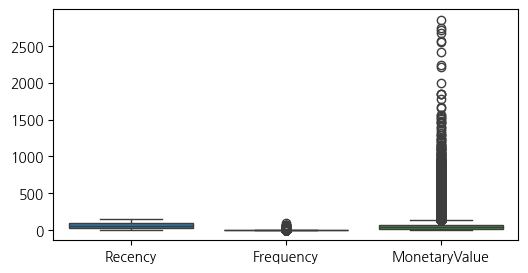

In [ ]:
plt.figure(figsize=(6,3))
sns.boxplot(rfm)

<Axes: xlabel='Recency'>

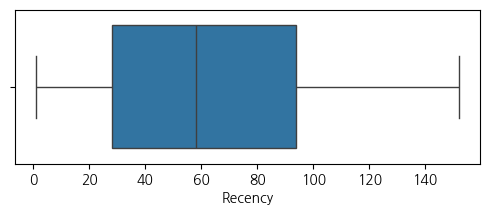

In [ ]:
plt.figure(figsize=(6, 2))
sns.boxplot(data=rfm, x='Recency')

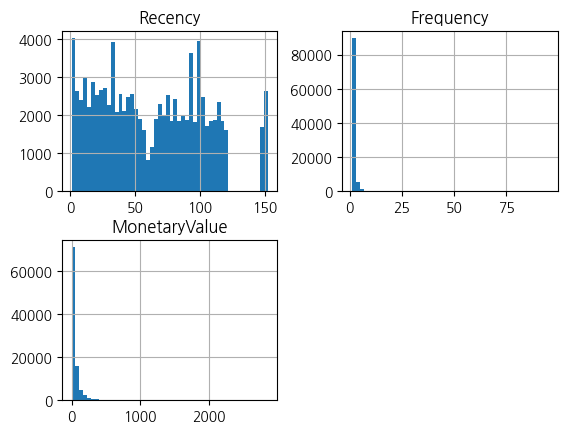

In [ ]:
rfm.hist(bins=50); # 구간을 더 잘게 나누어 확인

In [27]:
rfm[['Recency','Frequency','MonetaryValue']].describe()

Recency  Frequency  MonetaryValue
count    97026      97026          97026
mean        62          1             56
std         40          1             83
min          1          1              0
25%         28          1             16
50%         58          1             33
75%         94          1             61
max        152         95           2857

### RFM 모형

> pd.cut : 동일한 구간으로 나누는 것 (bins히스토, 절대평가)

> pd.qcut : 동일한 갯수로 나누는 것 (4분위수, 상대평가)

In [ ]:
# r_labels : 최근일수록 점수 high, 오래될수록 점수 low 산정
r_labels = list(range(5, 0, -1))
# m_labels, f_labels: 높을수록 점수 high
f_labels = [1, 2, 3, 4]  # Frequency: 1, 2, 3~5, 6+
m_labels = list(range(1, 6))
cut_size = 5

In [ ]:
rfm

Recency  Frequency  MonetaryValue
user_id                                     
9794320         97          1             13
10079204       116          1             26
10280338        11          5            178
12055855        72          1             17
12936739        44          1             30
...            ...        ...            ...
622065819        1          1             20
622066161        1          1             13
622067983        1          1             66
622069477        1          1              1
622073202        1          1              4

[97026 rows x 3 columns]

In [ ]:
r_qcut = pd.qcut(x=rfm['Recency'], q=cut_size, labels=r_labels, duplicates='drop')
f_cut = rfm['Frequency'].apply(lambda x: 1 if x == 1 else (2 if x == 2 else (3 if 3 <= x <= 5 else 4))) # 방문 빈도가 1, 2인 비율이 압도적 -> frequency는 q_cut말고 수동 조정
m_qcut = pd.qcut(x=rfm['MonetaryValue'], q=cut_size, labels=m_labels, duplicates='drop')

In [ ]:
not_one = rfm[rfm['Frequency'] != 1].shape[0]
print(not_one)

19669


In [ ]:
rfm = rfm.assign(R=r_qcut, F=f_cut, M=m_qcut)
rfm.head(2)

Recency  Frequency  MonetaryValue  R  F  M
user_id                                             
9794320        97          1             13  2  1  1
10079204      116          1             26  1  1  3

In [ ]:
#rfm segment
rfm['RFM_segment'] = rfm['R'].astype(str) + rfm['F'].astype(str) + rfm['M'].astype(str)
rfm

Recency  Frequency  MonetaryValue  R  F  M RFM_segment
user_id                                                          
9794320         97          1             13  2  1  1         211
10079204       116          1             26  1  1  3         113
10280338        11          5            178  5  3  5         535
12055855        72          1             17  3  1  2         312
12936739        44          1             30  4  1  3         413
...            ...        ...            ... .. .. ..         ...
622065819        1          1             20  5  1  2         512
622066161        1          1             13  5  1  1         511
622067983        1          1             66  5  1  4         514
622069477        1          1              1  5  1  1         511
622073202        1          1              4  5  1  1         511

[97026 rows x 7 columns]

In [ ]:
# rfm score (고객별 점수)
rfm['RFM_score'] = rfm[['R','F','M']].astype(int).sum(axis=1)
rfm.head(3)

Recency  Frequency  MonetaryValue  R  F  M RFM_segment  RFM_score
user_id                                                                    
9794320        97          1             13  2  1  1         211          4
10079204      116          1             26  1  1  3         113          5
10280338       11          5            178  5  3  5         535         13

In [ ]:
len(rfm['RFM_segment'].unique())

82

<Axes: xlabel='RFM_segment', ylabel='RFM_score'>

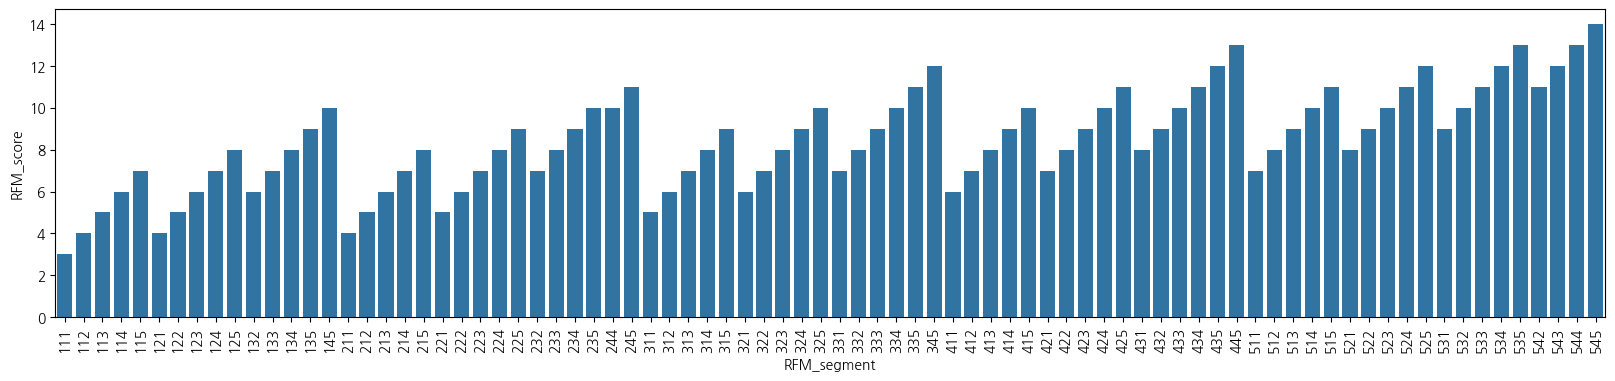

In [ ]:
plt.figure(figsize=(20,4))
plt.xticks(rotation=90)
sns.barplot(data=rfm.sort_values('RFM_segment'), x="RFM_segment", y='RFM_score')

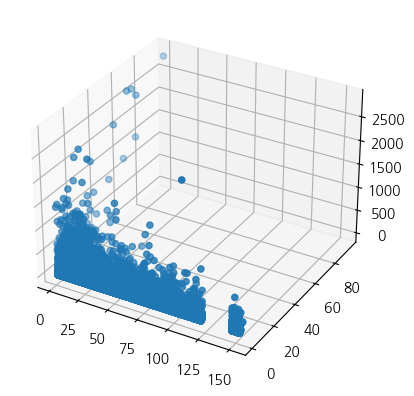

In [ ]:
ax = plt.axes(projection='3d')
ax.scatter3D(rfm['Recency'], rfm['Frequency'], rfm['MonetaryValue']) # 이상치, 특이한 고객 찾을 때는 이방법이 더 좋을 수 있음
# But 몰려있기에 고객별로 정확한 파악이 어려워 segment를 나눠줌

In [ ]:
import plotly.express as px

color_map = px.colors.qualitative.Light24[:82]  # 82가지 색상 생성

fig = px.scatter_3d(rfm, x='Recency', y='Frequency', z='MonetaryValue', title='3D Scatter plot of RFM Segments',color='RFM_segment', color_discrete_map=color_map,
                    labels={'Recency': 'R', 'Frequency': 'F', 'MonetaryValue': 'M'})


fig.show()


TypeError: list indices must be integers or slices, not str

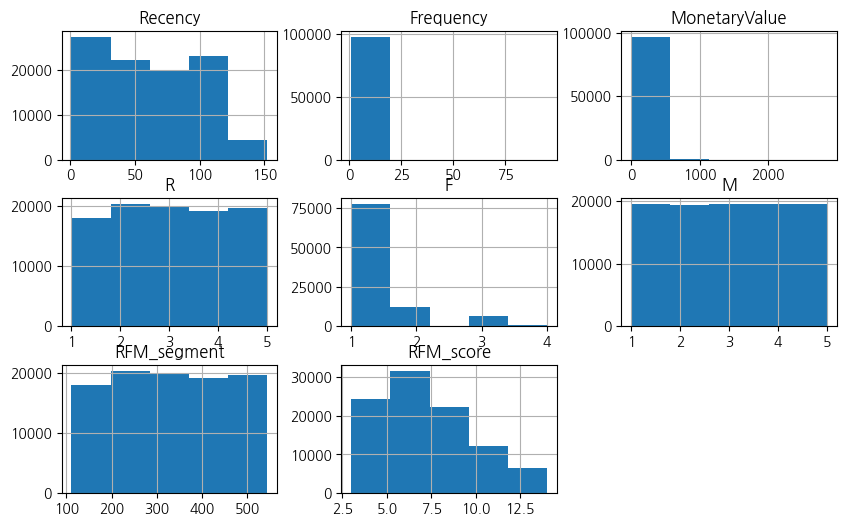

In [ ]:
rfm.astype(int).hist(bins=5, figsize=(10,6));
# q_cut을 진행했기 때문에 두번째 행 처럼 비슷한 비율로 분포되게 할 수 있음

In [ ]:
rfm.groupby('RFM_score').agg({'Recency':'mean',
                              'Frequency':'mean',
                              'MonetaryValue':['mean', 'sum']
                              }).style.background_gradient().format("{:,.0f}")
# Ex) RFM_score 10점일때, 31일 만에 주문하고, 약 2번 주문했다

#### qcut을 통한 고객군 나누기

In [ ]:
rfm['RFM_class'] = pd.qcut(x=rfm['RFM_score'], q=4, labels=['blonze', 'silver','gold', 'platinum'])
rfm

Recency  Frequency  MonetaryValue  R  F  M RFM_segment  RFM_score  \
user_id                                                                        
9794320         97          1             13  2  1  1         211          4   
10079204       116          1             26  1  1  3         113          5   
10280338        11          5            178  5  3  5         535         13   
12055855        72          1             17  3  1  2         312          6   
12936739        44          1             30  4  1  3         413          8   
...            ...        ...            ... .. .. ..         ...        ...   
622065819        1          1             20  5  1  2         512          8   
622066161        1          1             13  5  1  1         511          7   
622067983        1          1             66  5  1  4         514         10   
622069477        1          1              1  5  1  1         511          7   
622073202        1          1              4  5  1  1         511          7   

          RFM_class  
user_id              
9794320      blonze  
10079204     blonze  
10280338   platinum  
12055855     silver  
12936739       gold  
...             ...  
622065819      gold  
622066161    silver  
622067983  platinum  
622069477    silver  
622073202    silver  

[97026 rows x 9 columns]

In [ ]:
rfm.groupby('RFM_class')['RFM_score'].describe()

count  mean  std  min  25%  50%  75%  max
RFM_class                                           
blonze     24417     4    1    3    4    4    5    5
silver     31518     7    0    6    6    7    7    7
gold       22333     8    0    8    8    8    9    9
platinum   18758    11    1   10   10   11   12   14

1. 브론즈 3~5
2. 실버 6~7
3. 골드 8~9
4. 플래티넘 10~14

<Axes: xlabel='RFM_class', ylabel='RFM_score'>

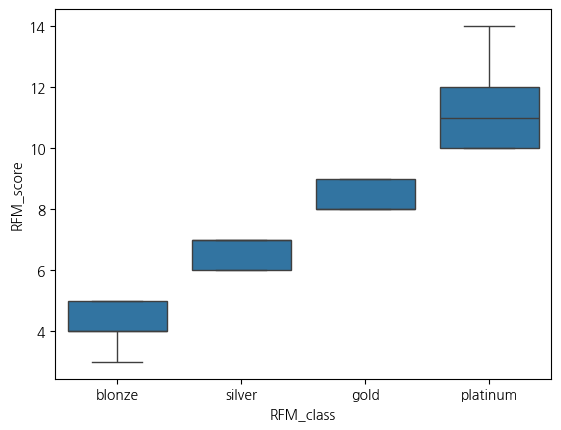

In [ ]:
sns.boxplot(data=rfm, x='RFM_class', y='RFM_score')

<Axes: xlabel='R', ylabel='RFM_score'>

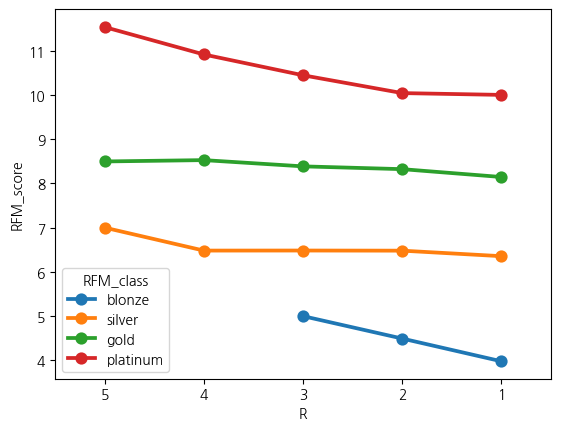

In [ ]:
sns.pointplot(data=rfm, x='R', y='RFM_score', hue='RFM_class')

<Axes: xlabel='F', ylabel='RFM_score'>

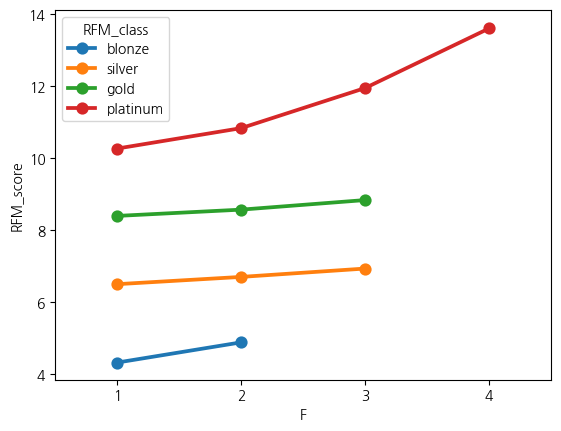

In [ ]:
sns.pointplot(data=rfm, x='F', y='RFM_score', hue='RFM_class')

<Axes: xlabel='M', ylabel='RFM_score'>

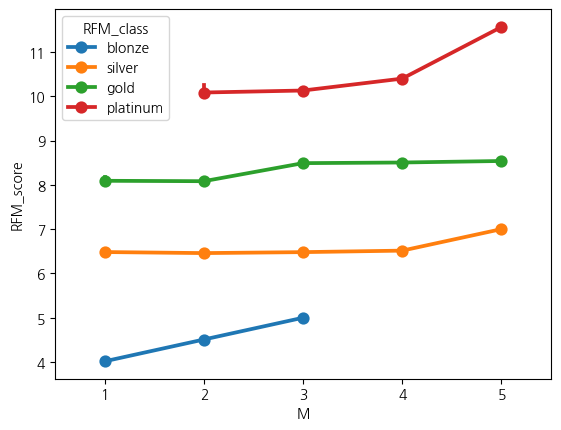

In [ ]:
sns.pointplot(data=rfm, x='M', y='RFM_score', hue='RFM_class')

In [ ]:
rfm.columns

Index(['Recency', 'Frequency', 'MonetaryValue', 'R', 'F', 'M', 'RFM_segment',
       'RFM_score', 'RFM_class'],
      dtype='object')

In [ ]:
rfm.groupby("RFM_class").agg({'Recency':'mean',
                              'Frequency':'mean',
                              'MonetaryValue':['mean','sum','count']})

Recency Frequency MonetaryValue               
             mean      mean          mean     sum  count
RFM_class                                               
blonze         99         1            16  402282  24417
silver         67         1            34 1078884  31518
gold           45         1            59 1308947  22333
platinum       25         3           140 2624153  18758

In [ ]:
rfm.groupby("RFM_class").agg({'Recency':'mean',
                              'Frequency':'mean',
                              'MonetaryValue':['mean','sum','count']
                              }).style.background_gradient().format('{:,.0f}')

In [ ]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97026 entries, 9794320 to 622073202
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Recency        97026 non-null  int64   
 1   Frequency      97026 non-null  int64   
 2   MonetaryValue  97026 non-null  float64 
 3   R              97026 non-null  category
 4   F              97026 non-null  int64   
 5   M              97026 non-null  category
 6   RFM_segment    97026 non-null  object  
 7   RFM_score      97026 non-null  int64   
 8   RFM_class      97026 non-null  category
dtypes: category(3), float64(1), int64(4), object(1)
memory usage: 5.5+ MB


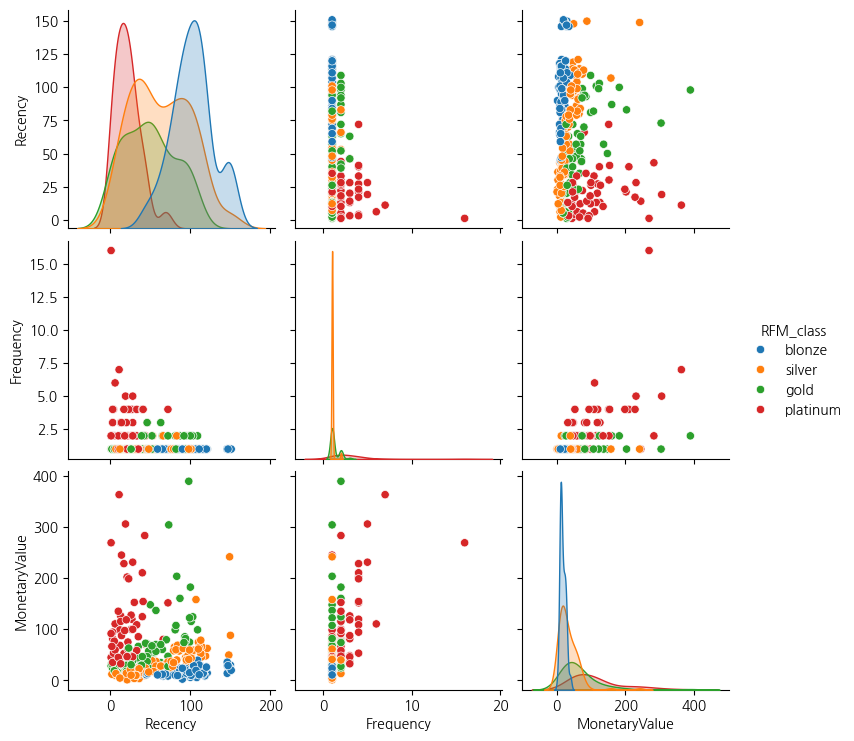

In [ ]:
sns.pairplot(data=rfm.sample(300), hue='RFM_class', vars=['Recency', 'Frequency', 'MonetaryValue'])


In [ ]:
corr = rfm.select_dtypes(include='number').drop(columns=['F']).corr().round(3)

corr

Recency  Frequency  MonetaryValue  RFM_score
Recency              1         -0             -0         -1
Frequency           -0          1              1          1
MonetaryValue       -0          1              1          1
RFM_score           -1          1              1          1

In [ ]:
# 삼각형태의 heatmap형태 만들기 위해 삼각형 마스크 생성
import numpy as np
mask = np.triu(np.ones_like(corr))
mask

array([[1., 1., 1., 1.],
       [0., 1., 1., 1.],
       [0., 0., 1., 1.],
       [0., 0., 0., 1.]])

<Axes: >

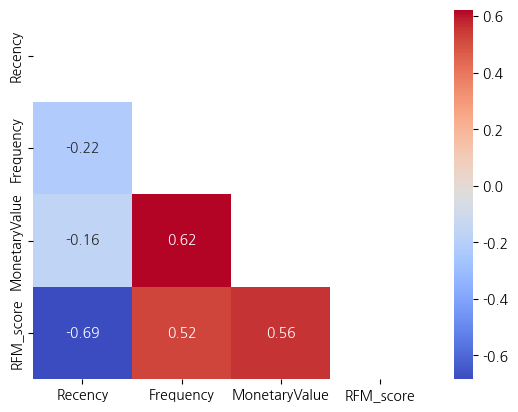

In [ ]:
sns.heatmap(corr, annot=True, cmap='coolwarm', mask=mask)
# Recency 경우, 최근인 값에 더 높은 점수 부여 -> 음의 상관 관계가 나옴

In [ ]:
# rfm.to_csv('/content/drive/My Drive/RFM.csv')

In [ ]:
pd.read_csv('/content/drive/My Drive/RFM.csv')

user_id  Recency  Frequency  MonetaryValue  R  F  M  RFM_segment  \
0        9794320       97          1             13  2  1  1          211   
1       10079204      116          1             26  1  1  3          113   
2       10280338       11          5            178  5  3  5          535   
3       12055855       72          1             17  3  1  2          312   
4       12936739       44          1             30  4  1  3          413   
...          ...      ...        ...            ... .. .. ..          ...   
97021  622065819        1          1             20  5  1  2          512   
97022  622066161        1          1             13  5  1  1          511   
97023  622067983        1          1             66  5  1  4          514   
97024  622069477        1          1              1  5  1  1          511   
97025  622073202        1          1              4  5  1  1          511   

       RFM_score RFM_class  
0              4    blonze  
1              5    blonze  
2             13  platinum  
3              6    silver  
4              8      gold  
...          ...       ...  
97021          8      gold  
97022          7    silver  
97023         10  platinum  
97024          7    silver  
97025          7    silver  

[97026 rows x 10 columns]

### k-means 클러스터링

> k평균 이상치에 민감, 중심점과 오브젝트 간 유클리드 거리로 계산

In [ ]:
# 한글 폰트 사용을 위해
!pip install koreanize-matplotlib
import koreanize_matplotlib

In [ ]:
# 군집화 시각화 위해
!pip install yellowbrick

In [ ]:
rfm = pd.read_csv('/content/drive/MyDrive/RFM.csv', index_col = 'user_id')
rfm.shape

(97026, 9)

In [ ]:
rfm.head()

Recency  Frequency  MonetaryValue  R  F  M  RFM_segment  RFM_score  \
user_id                                                                        
9794320        97          1             13  2  1  1          211          4   
10079204      116          1             26  1  1  3          113          5   
10280338       11          5            178  5  3  5          535         13   
12055855       72          1             17  3  1  2          312          6   
12936739       44          1             30  4  1  3          413          8   

         RFM_class  
user_id             
9794320     blonze  
10079204    blonze  
10280338  platinum  
12055855    silver  
12936739      gold

In [ ]:
rfm.isnull().sum()

Recency          0
Frequency        0
MonetaryValue    0
R                0
F                0
M                0
RFM_segment      0
RFM_score        0
RFM_class        0
dtype: int64

In [ ]:
# Recency, Frequency, Monetary만 따로 rfm_cluster 변수에 담아 사용
rfm_cluster = rfm.iloc[:, :3]
rfm_cluster.head()

Recency  Frequency  MonetaryValue
user_id                                    
9794320        97          1             13
10079204      116          1             26
10280338       11          5            178
12055855       72          1             17
12936739       44          1             30

In [ ]:
rfm_cluster.describe()

Recency  Frequency  MonetaryValue
count    97026      97026          97026
mean        62          1             56
std         40          1             83
min          1          1              0
25%         28          1             16
50%         58          1             33
75%         94          1             61
max        152         95           2857

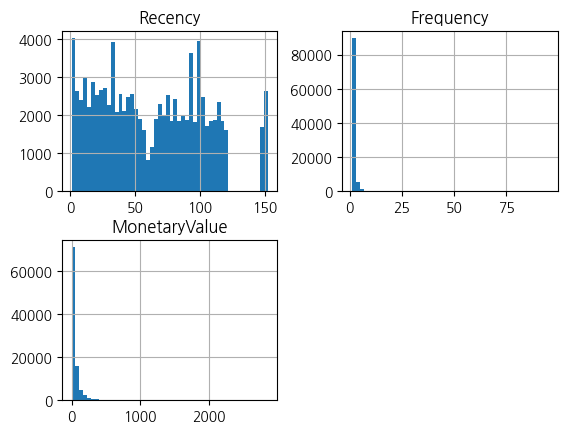

In [ ]:
rfm_cluster.hist(bins=50); # ';' 줄바꿈 표시 의미 -> 로그가 따로 나오지 않는 효과

In [ ]:
# 로그 변환
rfm_cluster_log = np.log1p(rfm_cluster) # 1보다 작을 시 음의 무한대로 향하기 때문에 최솟값 1을 맞춰야함
rfm_cluster_log.head()

Recency  Frequency  MonetaryValue
user_id                                    
9794320         5          1              3
10079204        5          1              3
10280338        2          2              5
12055855        4          1              3
12936739        4          1              3

In [ ]:
rfm_cluster_log.describe()

Recency  Frequency  MonetaryValue
count    97026      97026          97026
mean         4          1              4
std          1          0              1
min          1          1              0
25%          3          1              3
50%          4          1              4
75%          5          1              4
max          5          5              8

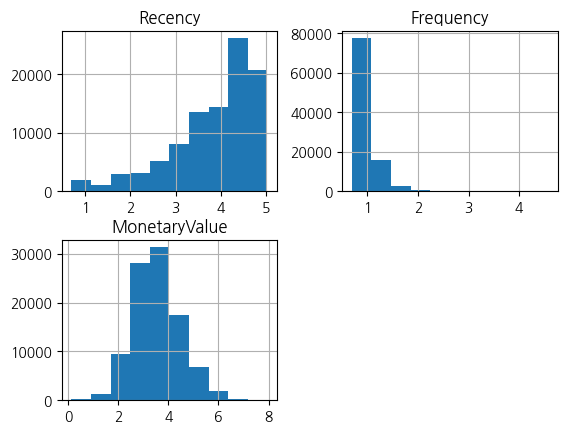

In [ ]:
rfm_cluster_log.hist();

In [ ]:
#스케일링 조정
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

ss = StandardScaler()
X = ss.fit_transform(rfm_cluster_log)
X = pd.DataFrame(X, columns=rfm_cluster_log.columns)

In [ ]:
X

Recency  Frequency  MonetaryValue
0            1         -0             -1
1            1         -0             -0
2           -1          4              2
3            0         -0             -1
4           -0         -0             -0
...        ...        ...            ...
97021       -3         -0             -1
97022       -3         -0             -1
97023       -3         -0              1
97024       -3         -0             -3
97025       -3         -0             -2

[97026 rows x 3 columns]

In [ ]:
ss = StandardScaler()
X_standard = ss.fit_transform(rfm_cluster_log[['Recency', 'MonetaryValue']])
X_standard = pd.DataFrame(X_standard, columns=['Recency', 'MonetaryValue'])

# RobustScaler로 Frequency 컬럼 스케일링
robust_scaler = RobustScaler()
X_robust = rfm_cluster_log.copy()  # rfm_cluster_log 데이터프레임을 복사하여 사용합니다.
X_robust['Frequency'] = robust_scaler.fit_transform(rfm_cluster_log[['Frequency']])

# X_standard와 X_robust 데이터프레임을 통합하여 전체 데이터프레임 X 생성
X = pd.concat([X_standard, X_robust[['Frequency']]], axis=1)

> RobustScaler 중앙값(50%)를 0으로 맞춤

In [ ]:
X.describe().round(2) # 평균 0, 편차 1

Recency  MonetaryValue  Frequency
count    97026          97026      97026
mean        -0              0          0
std          1              1          0
min         -3             -4          0
25%         -0             -1          0
50%          0             -0          0
75%          1              1          0
max          1              5          4

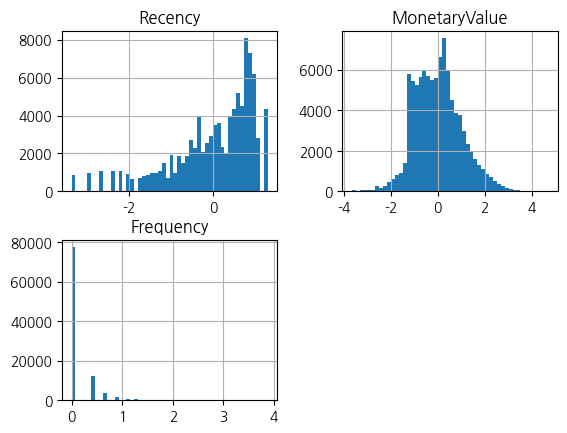

In [ ]:
X.hist(bins=50);

In [ ]:
X

Recency  MonetaryValue  Frequency
0                1             -1        NaN
1                1             -0        NaN
2               -1              2        NaN
3                0             -1        NaN
4               -0             -0        NaN
...            ...            ...        ...
622065819      NaN            NaN          0
622066161      NaN            NaN          0
622067983      NaN            NaN          0
622069477      NaN            NaN          0
622073202      NaN            NaN          0

[194052 rows x 3 columns]

#### KMeans

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=6, n_init='auto',random_state=42)
kmeans.fit(X)
kmeans.cluster_centers_, kmeans.inertia_

(array([[ 0.49908146, -0.43827309,  0.52754964],
        [-1.27778677,  3.25766981,  1.86383907],
        [-0.60536932, -0.41482154, -0.72402487],
        [ 0.03249671,  1.2763131 ,  0.81416409],
        [-2.06166121, -0.13944703,  0.19159157],
        [ 0.70718866, -0.42504007, -0.88615933]]),
 74635.20526126053)

In [ ]:
kmeans.cluster_centers_.shape

(6, 3)

In [ ]:
inertia = []
silhouettes = []
range_n_clusters = range(2, 21)

for n_cluster in range_n_clusters:
  kmeans = KMeans(n_clusters=n_cluster, n_init='auto',random_state=42)
  kmeans.fit(X)
  inertia.append(kmeans.inertia_)
  silhouettes.append(silhouette_score(X, labels=kmeans.labels_))
  print(n_cluster, end=',')

2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,

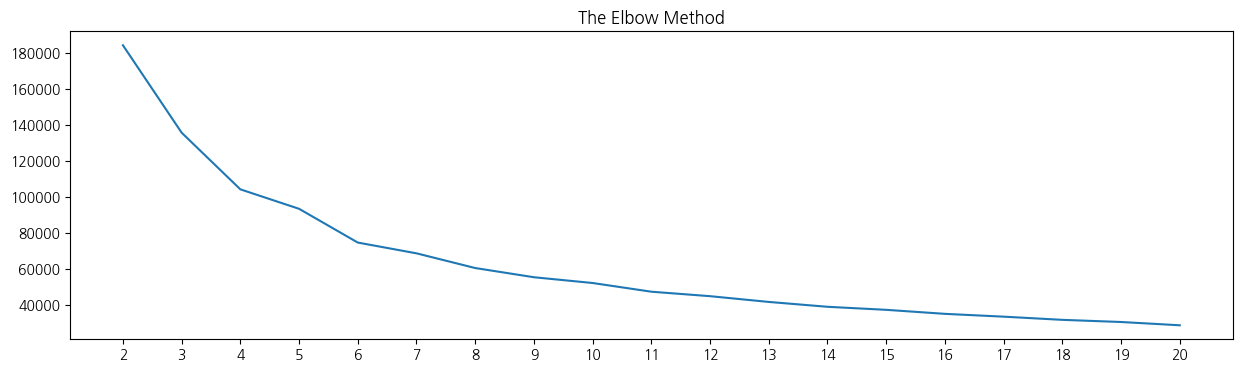

In [ ]:
plt.figure(figsize=(15,4))
plt.plot(range_n_clusters, inertia)
plt.title('The Elbow Method')
plt.xticks(range_n_clusters)
plt.show()

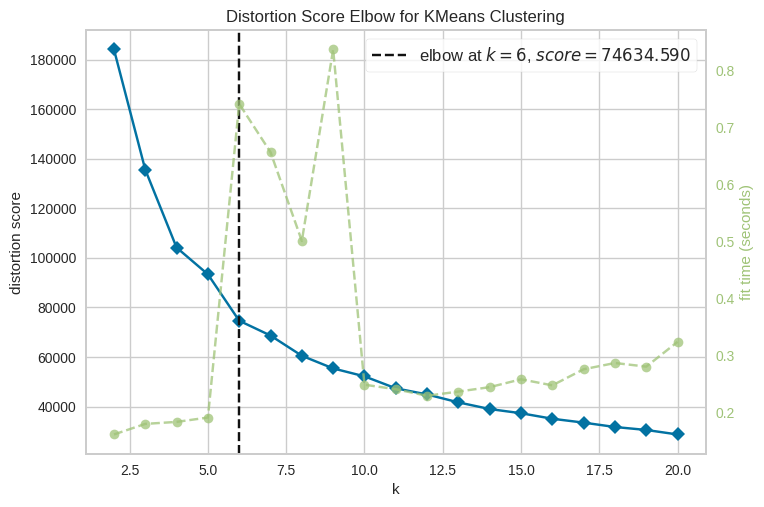

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

KEV = KElbowVisualizer(kmeans, k=20, n_init='auto')
KEV.fit(X)
KEV.show()

6개의 클러스터

In [ ]:
n_clusters = 6
kmeans = KMeans(n_clusters=n_clusters, n_init='auto', random_state=42)
kmeans.fit(X)

KMeans(n_clusters=6, n_init='auto', random_state=42)

In [ ]:
kmeans.labels_

array([5, 5, 1, ..., 4, 4, 4], dtype=int32)

In [ ]:
kmeans.cluster_centers_

array([[ 0.49908146, -0.43827309,  0.52754964],
       [-1.27778677,  3.25766981,  1.86383907],
       [-0.60536932, -0.41482154, -0.72402487],
       [ 0.03249671,  1.2763131 ,  0.81416409],
       [-2.06166121, -0.13944703,  0.19159157],
       [ 0.70718866, -0.42504007, -0.88615933]])

In [ ]:
pd.Series(kmeans.labels_).value_counts()

0    27953
5    26911
2    16071
3    12810
4     8612
1     4669
Name: count, dtype: int64

In [ ]:
pd.Series(kmeans.labels_).value_counts()

0    27953
5    26911
2    16071
3    12810
4     8612
1     4669
Name: count, dtype: int64

##### 실루엣 분석 시각화

In [ ]:
silhouette_avg = silhouette_score(X, kmeans.labels_)
silhouette_avg

0.3531398405032534

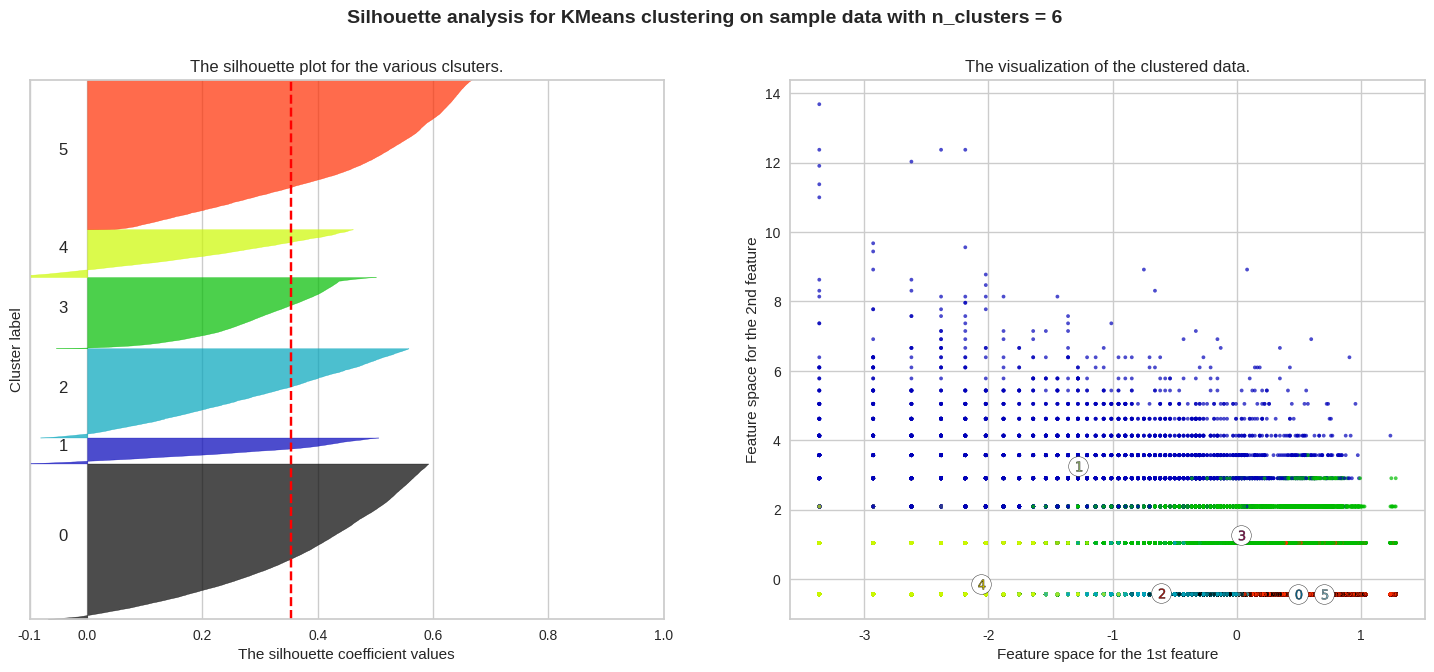

In [ ]:
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18,7)

ax1.set_xlim([-0.1, 1])

ax1.set_ylim([0, len(X) + (n_clusters +1) * 10])

cluster_labels = kmeans.labels_
sample_silhouette_values = silhouette_samples(X, cluster_labels)

y_lower = 10
for i in range(n_clusters):
  ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

  ith_cluster_silhouette_values.sort()

  size_cluster_i = ith_cluster_silhouette_values.shape[0]
  y_upper = y_lower + size_cluster_i

  color = cm.nipy_spectral(float(i) / n_clusters)
  ax1.fill_betweenx(
      np.arange(y_lower, y_upper),
      0,
      ith_cluster_silhouette_values,
      facecolor=color,
      edgecolor=color,
      alpha=0.7,
  )

  ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

  y_lower = y_upper + 10

ax1.set_title('The silhouette plot for the various clsuters.')
ax1.set_xlabel('The silhouette coefficient values')
ax1.set_ylabel('Cluster label')

ax1.axvline(x=silhouette_avg, color='red', linestyle='--')

ax1.set_yticks([])
ax1.set_xticks([ -0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

colors= cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
ax2.scatter(
    X.iloc[:, 0], X.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k'
)

centers = kmeans.cluster_centers_
ax2.scatter(
    centers[:, 0],
    centers[:, 1],
    marker='o',
    c='white',
    alpha=1,
    s=200,
    edgecolor='k',
)

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor='k')

ax2.set_title('The visualization of the clustered data.')
ax2.set_xlabel('Feature space for the 1st feature')
ax2.set_ylabel('Feature space for the 2nd feature')

plt.suptitle(
    'Silhouette analysis for KMeans clustering on sample data with n_clusters = %d'
    % n_clusters,
    fontsize=14,
    fontweight='bold',
)

plt.show()

In [ ]:
rfm['Cluster'] = kmeans.labels_
rfm

Recency  Frequency  MonetaryValue  R  F  M  RFM_segment  RFM_score  \
user_id                                                                         
9794320         97          1             13  2  1  1          211          4   
10079204       116          1             26  1  1  3          113          5   
10280338        11          5            178  5  3  5          535         13   
12055855        72          1             17  3  1  2          312          6   
12936739        44          1             30  4  1  3          413          8   
...            ...        ...            ... .. .. ..          ...        ...   
622065819        1          1             20  5  1  2          512          8   
622066161        1          1             13  5  1  1          511          7   
622067983        1          1             66  5  1  4          514         10   
622069477        1          1              1  5  1  1          511          7   
622073202        1          1              4  5  1  1          511          7   

          RFM_class  Cluster  
user_id                       
9794320      blonze        5  
10079204     blonze        5  
10280338   platinum        1  
12055855     silver        5  
12936739       gold        2  
...             ...      ...  
622065819      gold        4  
622066161    silver        4  
622067983  platinum        4  
622069477    silver        4  
622073202    silver        4  

[97026 rows x 10 columns]

In [ ]:
pd.crosstab(rfm['RFM_class'], rfm['Cluster'])

Cluster        0     1      2     3     4      5
RFM_class                                       
blonze      2339     0    148    16     0  21914
gold        9390    15   5501  4461  2966      0
platinum    1822  4654    372  7139  4771      0
silver     14402     0  10050  1194   875   4997

1 - platinum 2 - silver&gold  3 - platinum&gold 4 - platinum&gold 5 - blonze

In [ ]:
rfm['Cluster'].value_counts()

Cluster
0    27953
5    26911
2    16071
3    12810
4     8612
1     4669
Name: count, dtype: int64

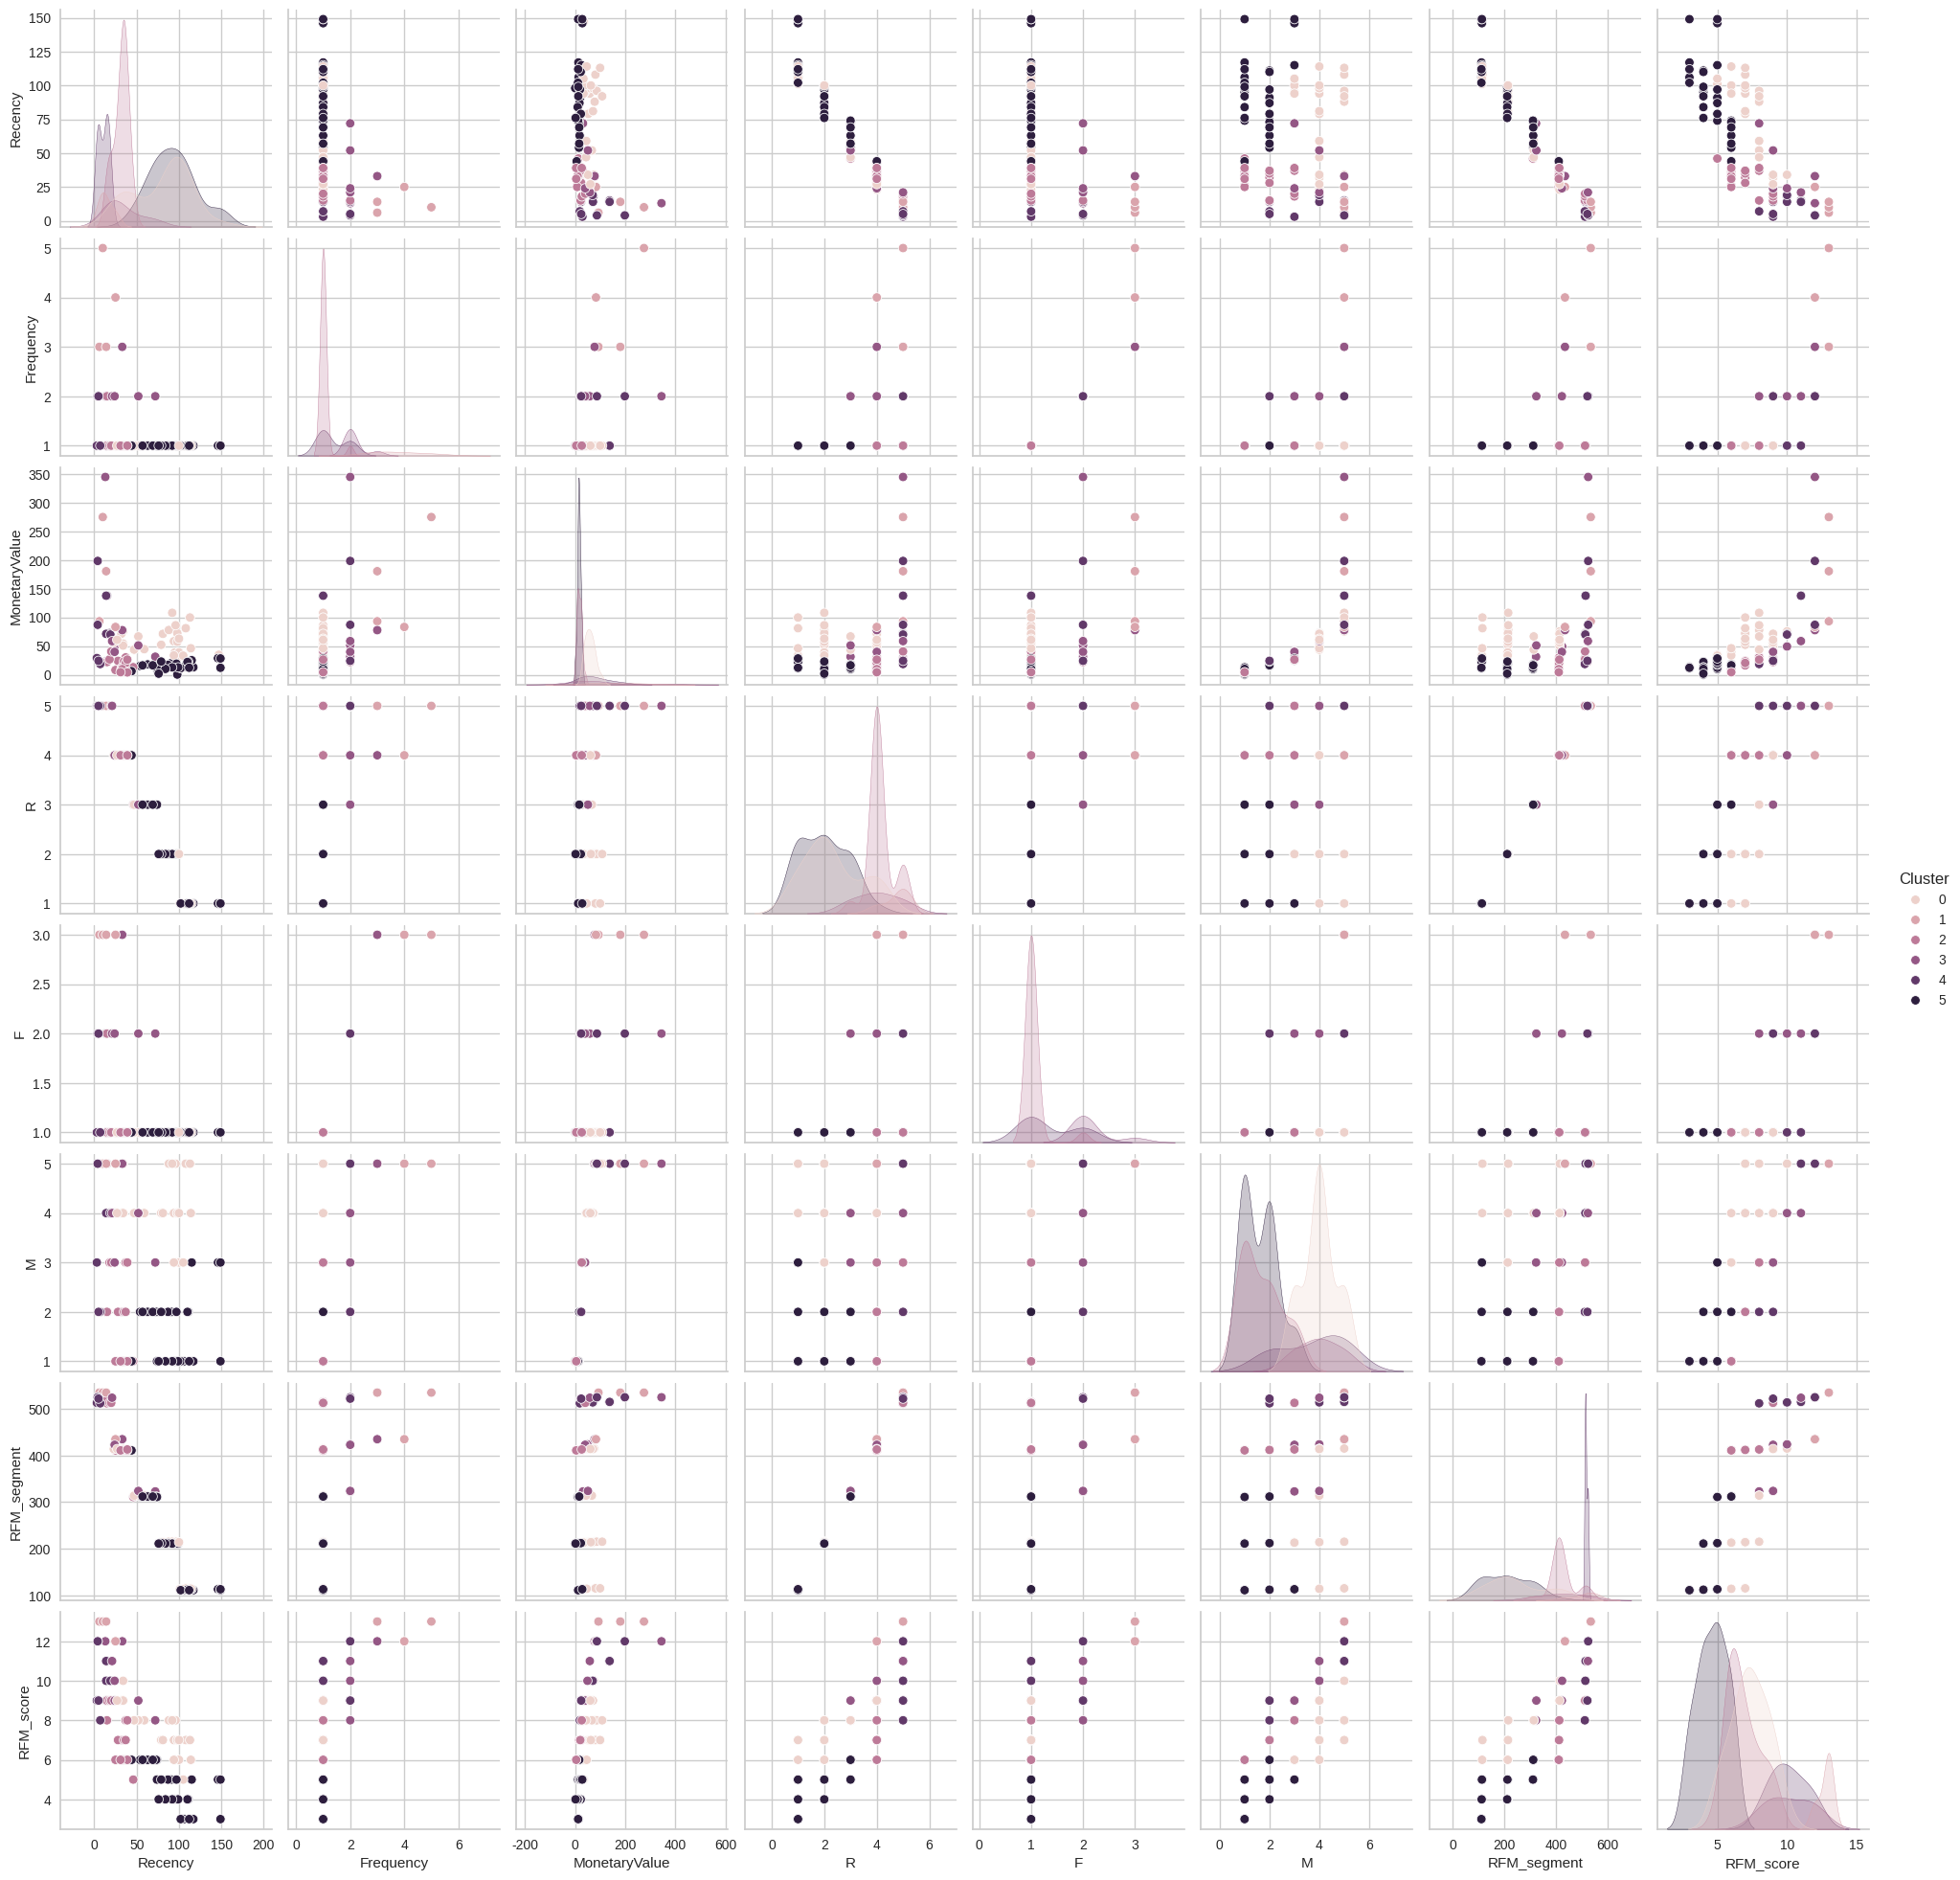

In [ ]:
sns.pairplot(data=rfm.sample(100), hue='Cluster')

### qq_plot

### RFM 모형

> pd.cut : 동일한 구간으로 나누는 것 (bins히스토, 절대평가)

> pd.qcut : 동일한 갯수로 나누는 것 (4분위수, 상대평가)

In [167]:
# r_labels : 최근일수록 점수 high, 오래될수록 점수 low 산정
r_labels = list(range(5, 0, -1))
# m_labels, f_labels: 높을수록 점수 high
f_labels = [1, 2, 3, 4, 5]  # Frequency: 1, 2, 3~5, 6~10, ELSE
m_labels = list(range(1, 6))
cut_size = 5

In [169]:
rfm

Recency  Frequency  MonetaryValue
user_id                                     
9794320         97          1             13
10079204       116          1             26
10280338        11          5            178
12055855        72          1             17
12936739        44          1             30
...            ...        ...            ...
622065819        1          1             20
622066161        1          1             13
622067983        1          1             66
622069477        1          1              1
622073202        1          1              4

[97026 rows x 3 columns]

In [170]:
r_qcut = pd.qcut(x=rfm['Recency'], q=cut_size, labels=r_labels, duplicates='drop')
f_cut = rfm['Frequency'].apply(lambda x: 1 if x == 1 else
                                            (2 if x == 2 else
                                            (3 if 3 <= x <= 5 else
                                            (4 if 5 < x <= 10 else 5)))) # 방문 빈도가 1, 2인 비율이 압도적 -> frequency는 q_cut말고 수동 조정
m_qcut = pd.qcut(x=rfm['MonetaryValue'], q=cut_size, labels=m_labels, duplicates='drop')

In [171]:
not_one = rfm[rfm['Frequency'] != 1].shape[0]
print(not_one)

19669


In [172]:
rfm = rfm.assign(R=r_qcut, F=f_cut, M=m_qcut)
rfm.head(2)

Recency  Frequency  MonetaryValue  R  F  M
user_id                                             
9794320        97          1             13  2  1  1
10079204      116          1             26  1  1  3

In [174]:
#rfm segment
rfm['RFM_segment'] = rfm['R'].astype(str) + rfm['F'].astype(str) + rfm['M'].astype(str)
rfm

Recency  Frequency  MonetaryValue  R  F  M  RFM_score RFM_segment
user_id                                                                     
9794320         97          1             13  2  1  1          4         211
10079204       116          1             26  1  1  3          5         113
10280338        11          5            178  5  3  5         13         535
12055855        72          1             17  3  1  2          6         312
12936739        44          1             30  4  1  3          8         413
...            ...        ...            ... .. .. ..        ...         ...
622065819        1          1             20  5  1  2          8         512
622066161        1          1             13  5  1  1          7         511
622067983        1          1             66  5  1  4         10         514
622069477        1          1              1  5  1  1          7         511
622073202        1          1              4  5  1  1          7         511

[97026 rows x 8 columns]

In [173]:
# rfm score (고객별 점수)
rfm['RFM_score'] = rfm[['R','F','M']].astype(int).sum(axis=1)
rfm.head(3)

Recency  Frequency  MonetaryValue  R  F  M  RFM_score
user_id                                                        
9794320        97          1             13  2  1  1          4
10079204      116          1             26  1  1  3          5
10280338       11          5            178  5  3  5         13

In [80]:
len(rfm['RFM_segment'].unique())

87

<Axes: xlabel='RFM_segment', ylabel='RFM_score'>

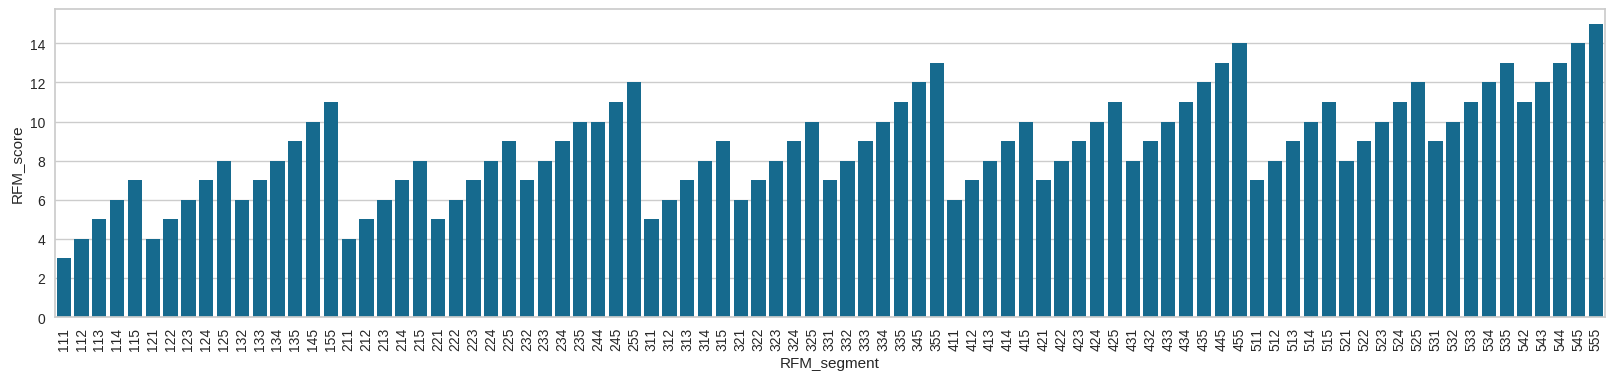

In [81]:
plt.figure(figsize=(20,4))
plt.xticks(rotation=90)
sns.barplot(data=rfm.sort_values('RFM_segment'), x="RFM_segment", y='RFM_score')

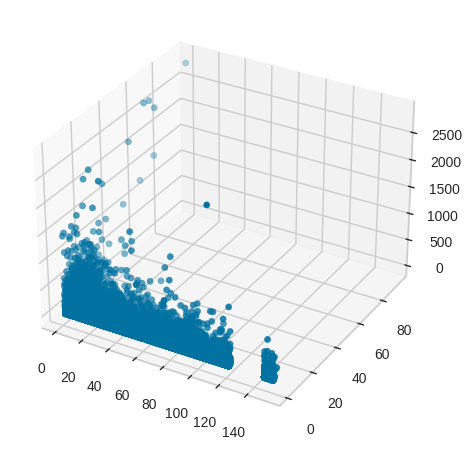

In [63]:
ax = plt.axes(projection='3d')
ax.scatter3D(rfm['Recency'], rfm['Frequency'], rfm['MonetaryValue']) # 이상치, 특이한 고객 찾을 때는 이방법이 더 좋을 수 있음
# But 몰려있기에 고객별로 정확한 파악이 어려워 segment를 나눠줌

In [82]:
import plotly.express as px

color_map = px.colors.qualitative.Light24[:82]  # 82가지 색상 생성

fig = px.scatter_3d(rfm, x='Recency', y='Frequency', z='MonetaryValue', title='3D Scatter plot of RFM Segments',color='RFM_segment', color_discrete_map=color_map,
                    labels={'Recency': 'R', 'Frequency': 'F', 'MonetaryValue': 'M'})


fig.show()

TypeError: list indices must be integers or slices, not str

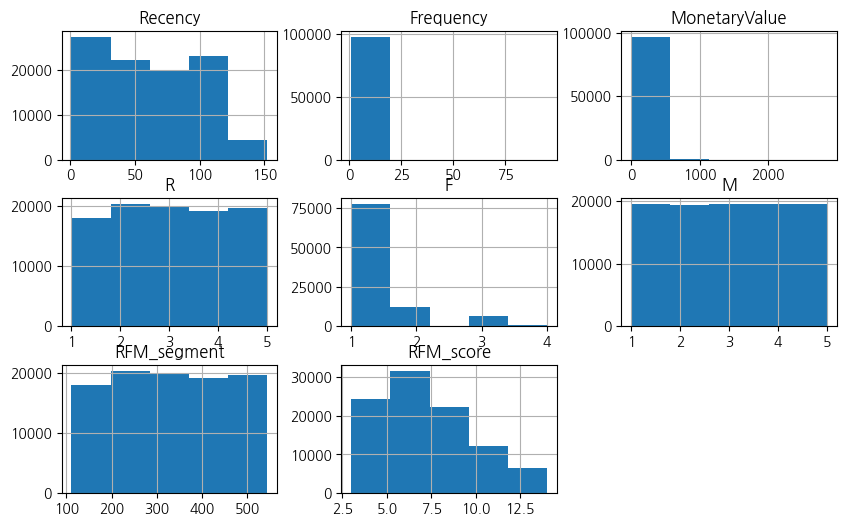

In [ ]:
rfm.astype(int).hist(bins=5, figsize=(10,6));
# q_cut을 진행했기 때문에 두번째 행 처럼 비슷한 비율로 분포되게 할 수 있음

In [65]:
rfm.groupby('RFM_score').agg({'Recency':'mean',
                              'Frequency':'mean',
                              'MonetaryValue':['mean', 'sum']
                              }).style.background_gradient().format("{:,.0f}")
# Ex) RFM_score 10점일때, 31일 만에 주문하고, 약 2번 주문했다

#### qcut을 통한 고객군 나누기

In [176]:
rfm['RFM_class'] = pd.qcut(x=rfm['RFM_score'], q=5, labels=['bronze', 'silver','gold', 'platinum', 'vip'])
rfm

Recency  Frequency  MonetaryValue  R  F  M  RFM_score RFM_segment  \
user_id                                                                        
9794320         97          1             13  2  1  1          4         211   
10079204       116          1             26  1  1  3          5         113   
10280338        11          5            178  5  3  5         13         535   
12055855        72          1             17  3  1  2          6         312   
12936739        44          1             30  4  1  3          8         413   
...            ...        ...            ... .. .. ..        ...         ...   
622065819        1          1             20  5  1  2          8         512   
622066161        1          1             13  5  1  1          7         511   
622067983        1          1             66  5  1  4         10         514   
622069477        1          1              1  5  1  1          7         511   
622073202        1          1              4  5  1  1          7         511   

          RFM_class  
user_id              
9794320      bronze  
10079204     bronze  
10280338        vip  
12055855     silver  
12936739       gold  
...             ...  
622065819      gold  
622066161      gold  
622067983       vip  
622069477      gold  
622073202      gold  

[97026 rows x 9 columns]

In [177]:
rfm.groupby('RFM_class')['RFM_score'].describe()

count  mean  std  min  25%  50%  75%  max
RFM_class                                           
bronze     24417     4    1    3    4    4    5    5
silver     15366     6    0    6    6    6    6    6
gold       28661     7    0    7    7    7    8    8
platinum    9824     9    0    9    9    9    9    9
vip        18758    11    1   10   10   11   12   15

1. 브론즈 3~5
2. 실버 6~7
3. 골드 8~9
4. 플래티넘 10~14

<Axes: xlabel='RFM_class', ylabel='RFM_score'>

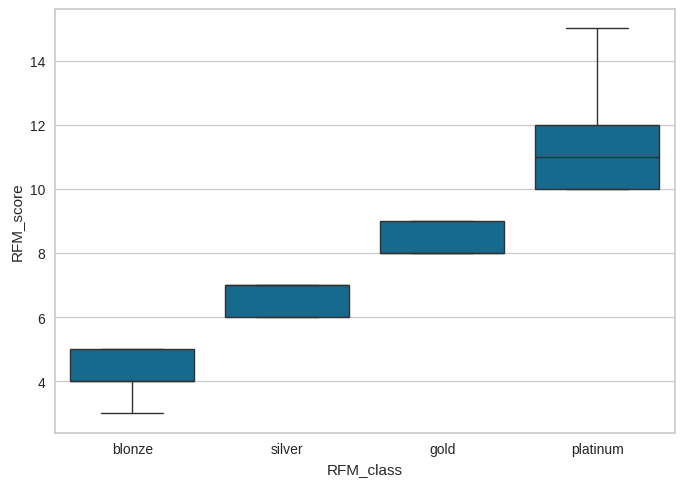

In [94]:
sns.boxplot(data=rfm, x='RFM_class', y='RFM_score')

<Axes: xlabel='R', ylabel='RFM_score'>

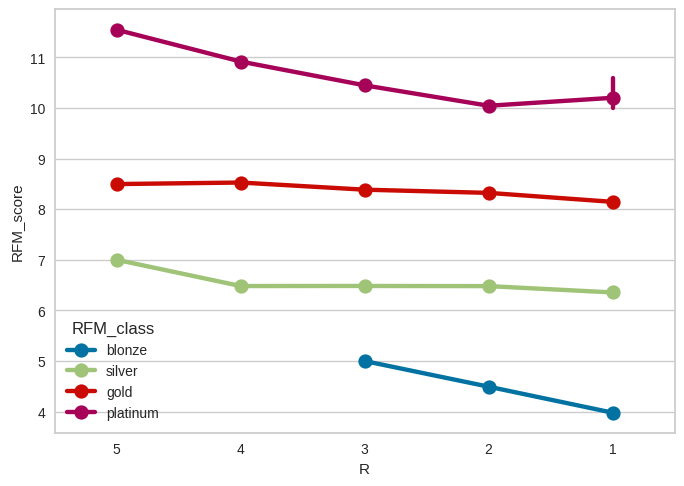

In [95]:
sns.pointplot(data=rfm, x='R', y='RFM_score', hue='RFM_class')

<Axes: xlabel='F', ylabel='RFM_score'>

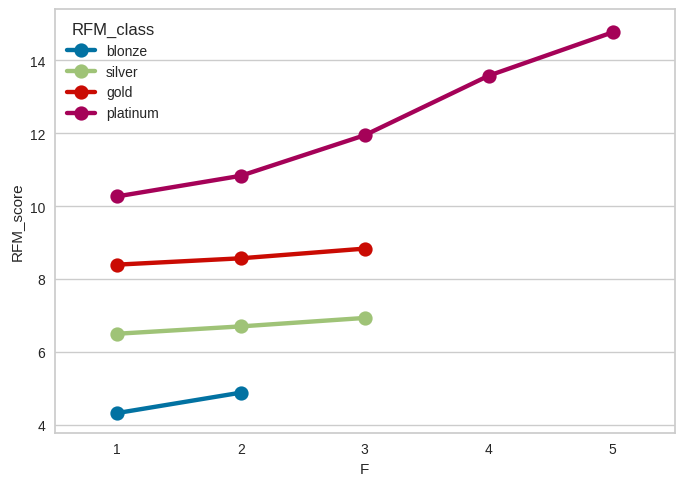

In [96]:
sns.pointplot(data=rfm, x='F', y='RFM_score', hue='RFM_class')

<Axes: xlabel='M', ylabel='RFM_score'>

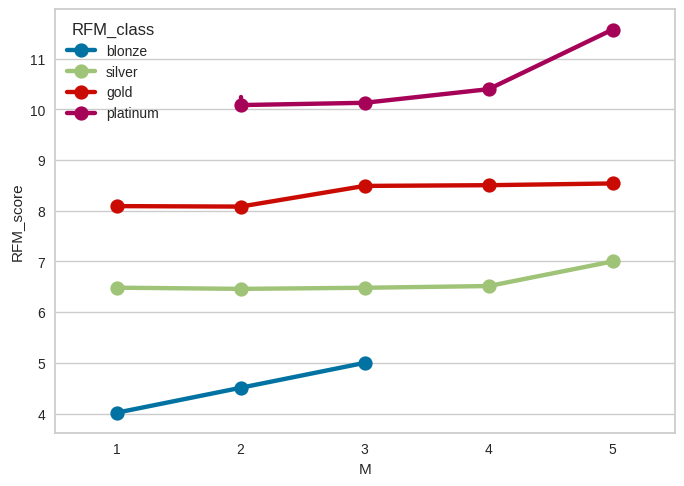

In [97]:
sns.pointplot(data=rfm, x='M', y='RFM_score', hue='RFM_class')

In [98]:
rfm.columns

Index(['Recency', 'Frequency', 'MonetaryValue', 'R_log', 'F_log', 'M_log',
       'Cluster', 'R', 'F', 'M', 'RFM_segment', 'RFM_score', 'RFM_class'],
      dtype='object')

In [99]:
rfm.groupby("RFM_class").agg({'Recency':'mean',
                              'Frequency':'mean',
                              'MonetaryValue':['mean','sum','count']})

Recency Frequency MonetaryValue               
             mean      mean          mean     sum  count
RFM_class                                               
blonze         99         1            16  402282  24417
silver         67         1            34 1078884  31518
gold           45         1            59 1308947  22333
platinum       25         3           140 2624153  18758

In [100]:
rfm.groupby("RFM_class").agg({'Recency':'mean',
                              'Frequency':'mean',
                              'MonetaryValue':['mean','sum','count']
                              }).style.background_gradient().format('{:,.0f}')

In [101]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97026 entries, 9794320 to 622073202
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Recency        97026 non-null  int64   
 1   Frequency      97026 non-null  int64   
 2   MonetaryValue  97026 non-null  float64 
 3   R_log          97026 non-null  float64 
 4   F_log          97026 non-null  float64 
 5   M_log          97026 non-null  float64 
 6   Cluster        97026 non-null  int32   
 7   R              97026 non-null  category
 8   F              97026 non-null  int64   
 9   M              97026 non-null  category
 10  RFM_segment    97026 non-null  object  
 11  RFM_score      97026 non-null  int64   
 12  RFM_class      97026 non-null  category
dtypes: category(3), float64(4), int32(1), int64(4), object(1)
memory usage: 8.1+ MB


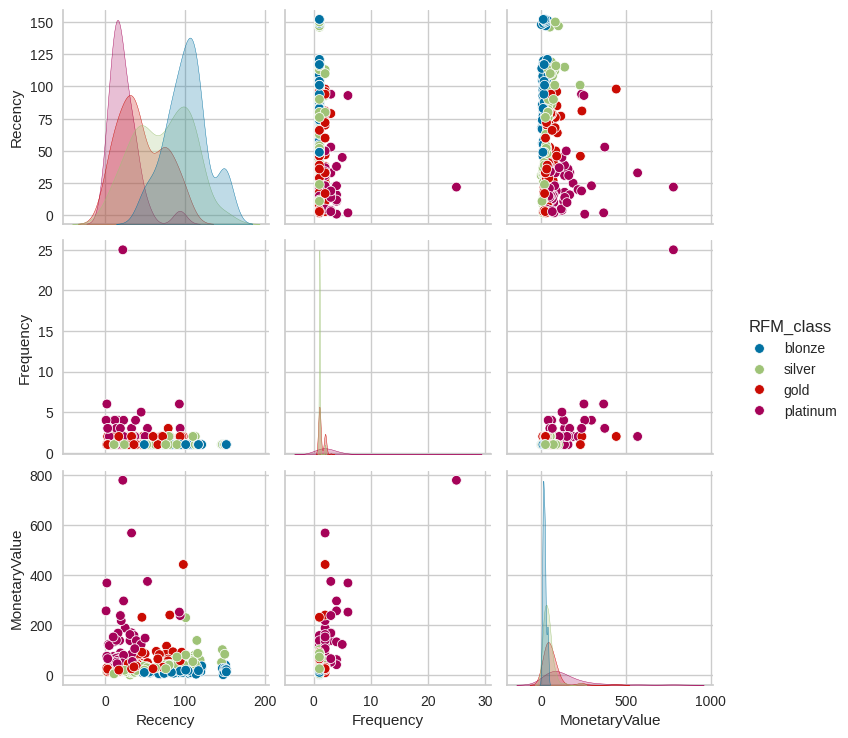

In [102]:
sns.pairplot(data=rfm.sample(300), hue='RFM_class', vars=['Recency', 'Frequency', 'MonetaryValue'])


In [103]:
corr = rfm.select_dtypes(include='number').drop(columns=['F']).corr().round(3)

corr

Recency  Frequency  MonetaryValue  R_log  F_log  M_log  \
Recency              1         -0             -0     -1     -0     -0   
Frequency           -0          1              1      0      1      0   
MonetaryValue       -0          1              1      0      1      1   
R_log               -1          0              0      1      0      0   
F_log               -0          1              1      0      1      1   
M_log               -0          0              1      0      1      1   
Cluster             -0         -0             -0      0      0     -1   
RFM_score           -1          1              1      1      1      1   

               Cluster  RFM_score  
Recency             -0         -1  
Frequency           -0          1  
MonetaryValue       -0          1  
R_log                0          1  
F_log                0          1  
M_log               -1          1  
Cluster              1         -0  
RFM_score           -0          1

In [104]:
# 삼각형태의 heatmap형태 만들기 위해 삼각형 마스크 생성
import numpy as np
mask = np.triu(np.ones_like(corr))
mask

array([[1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1.]])

<Axes: >

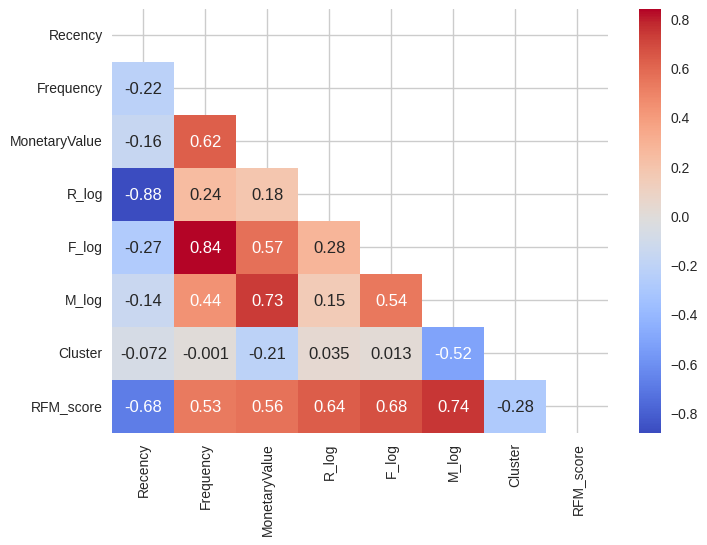

In [105]:
sns.heatmap(corr, annot=True, cmap='coolwarm', mask=mask)
# Recency 경우, 최근인 값에 더 높은 점수 부여 -> 음의 상관 관계가 나옴

In [106]:
# rfm.to_csv('/content/drive/My Drive/RFM_LOG.csv')

In [107]:
pd.read_csv('/content/drive/My Drive/RFM_LOG.csv')

user_id  Recency  Frequency  MonetaryValue  R_log  F_log  M_log  \
0        9794320       97          1             13     -5      0      3   
1       10079204      116          1             26     -5      0      3   
2       10280338       11          5            178     -2      2      5   
3       12055855       72          1             17     -4      0      3   
4       12936739       44          1             30     -4      0      3   
...          ...      ...        ...            ...    ...    ...    ...   
97021  622065819        1          1             20      0      0      3   
97022  622066161        1          1             13      0      0      3   
97023  622067983        1          1             66      0      0      4   
97024  622069477        1          1              1      0      0     -0   
97025  622073202        1          1              4      0      0      1   

       Cluster  R  F  M  RFM_segment  RFM_score RFM_class  
0            8  2  1  1          211          4    blonze  
1            0  1  1  3          113          5    blonze  
2            3  5  3  5          535         13  platinum  
3            8  3  1  2          312          6    silver  
4            1  4  1  3          413          8      gold  
...        ... .. .. ..          ...        ...       ...  
97021        2  5  1  2          512          8      gold  
97022        2  5  1  1          511          7    silver  
97023        2  5  1  4          514         10  platinum  
97024        2  5  1  1          511          7    silver  
97025        2  5  1  1          511          7    silver  

[97026 rows x 14 columns]

In [ ]:
rfm['re_R'] = 1 / rfm['Recency']

In [ ]:
from scipy.stats import norm, probplot

# 정규성, 데이터 분포 확인 위한 QQ_plot 시각화 함수
def QQ_plot(data, measure):
    fig = plt.figure(figsize=(20,7))

    (mu, sigma) = norm.fit(data)

    fig1 = fig.add_subplot(121)
    sns.distplot(data, fit=norm)
    fig1.set_title(measure + ' Distribution ( mu = {:.2f} and sigma = {:.2f} )'.format(mu, sigma), loc='center')
    fig1.set_xlabel(measure)
    fig1.set_ylabel('Frequency')
   # QQ_plot
    fig2 = fig.add_subplot(122)
    res = probplot(data, plot=fig2)
    fig2.set_title(measure + ' Probability Plot (skewness: {:.6f} and kurtosis: {:.6f} )'.format(data.skew(), data.kurt()), loc='center')

    plt.tight_layout()
    plt.show()

<ipython-input-32-50f093749f8e>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, fit=norm)


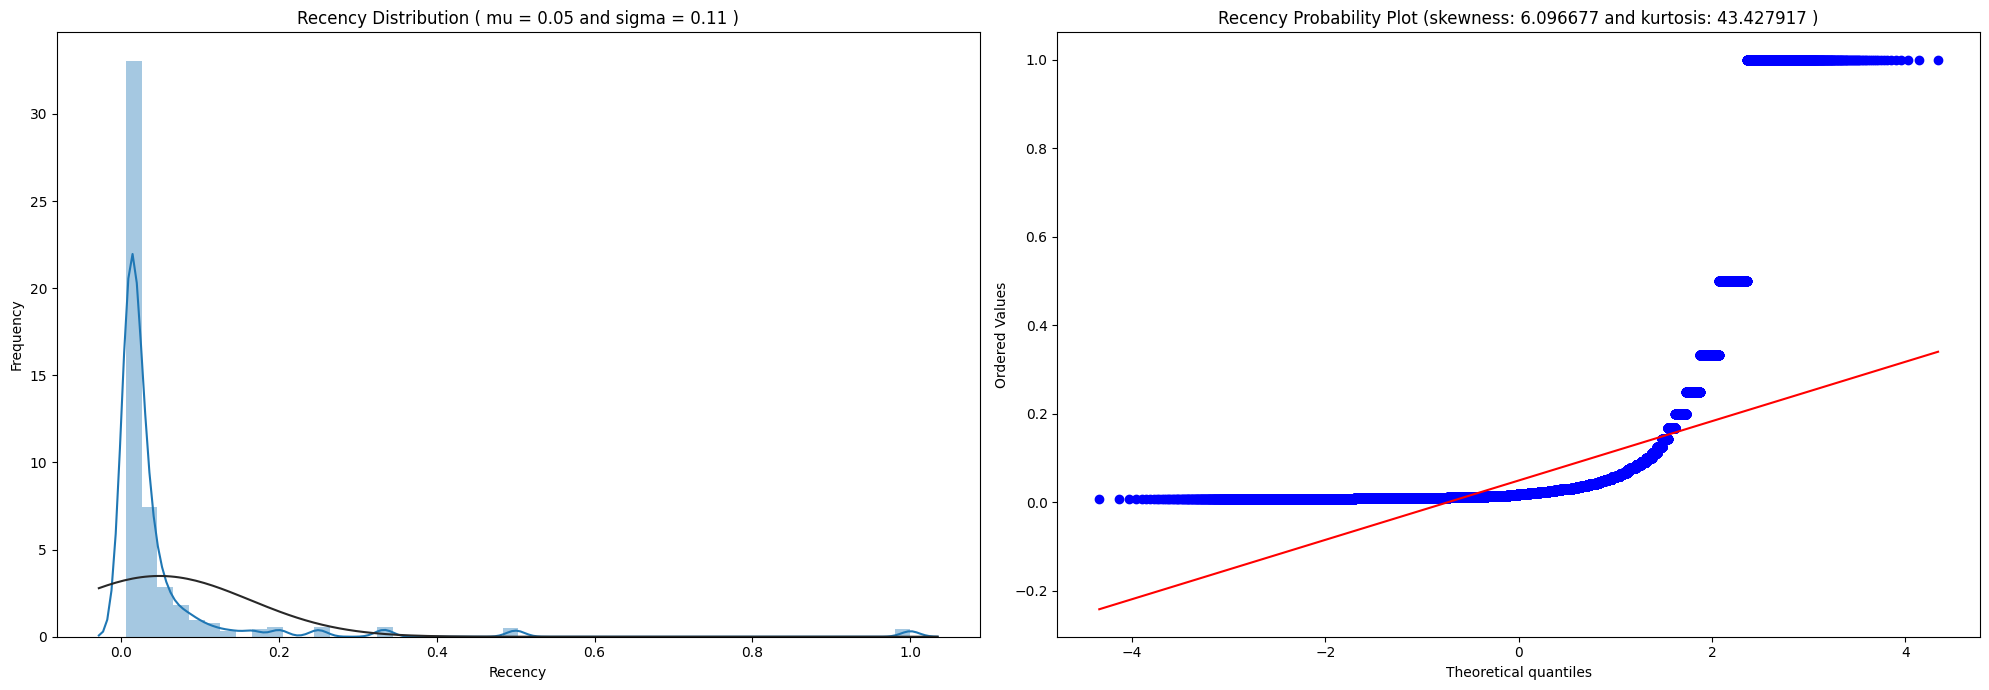

In [ ]:
QQ_plot(rfm['re_R'], 'Recency')

<ipython-input-32-50f093749f8e>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, fit=norm)


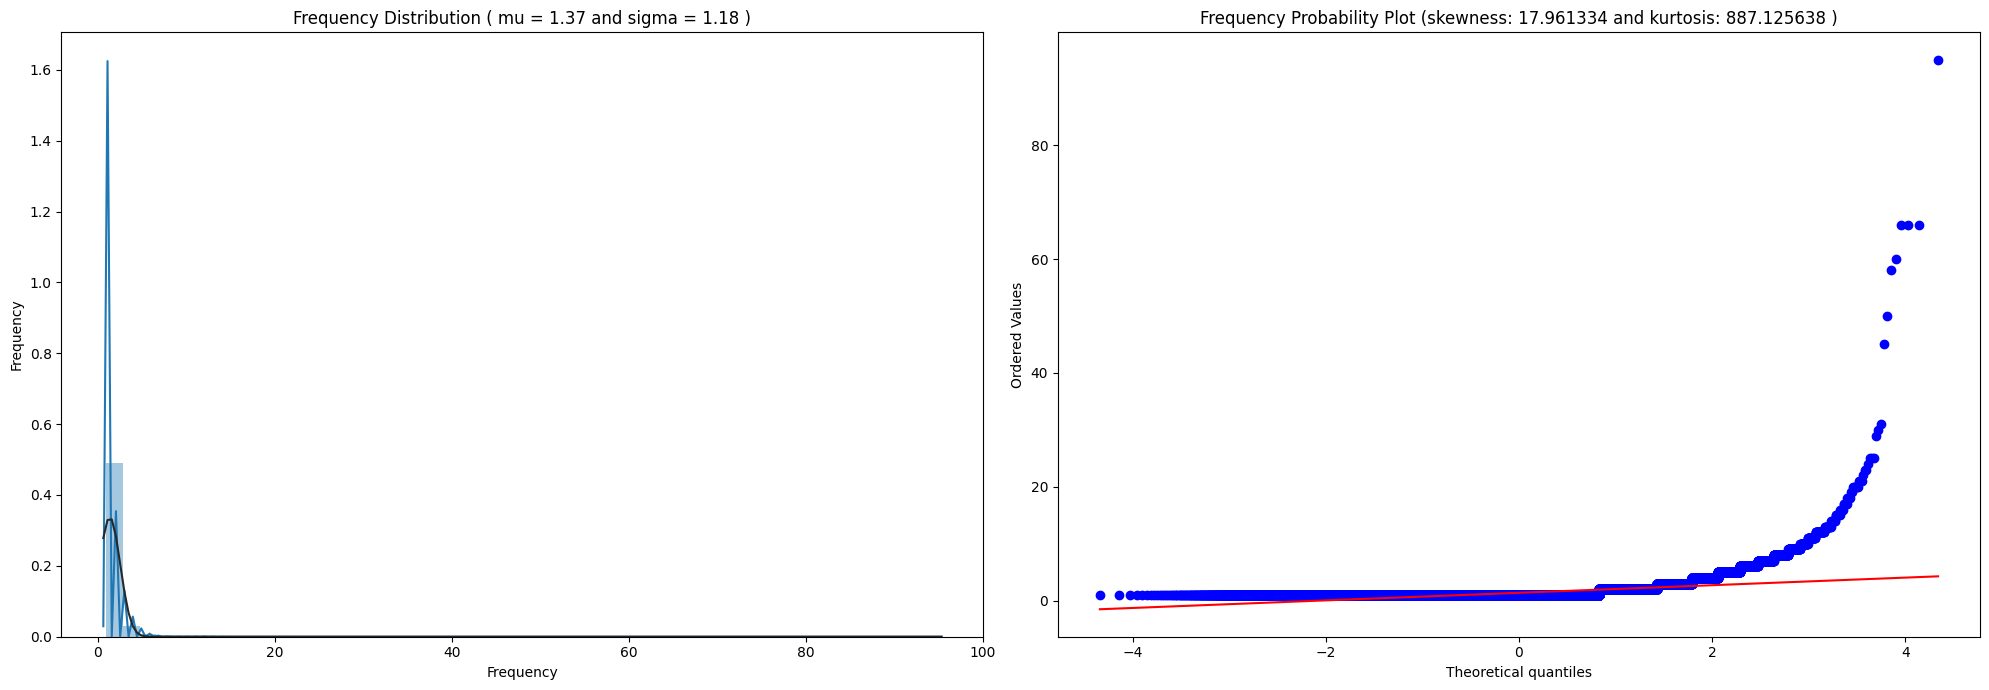

In [ ]:
QQ_plot(rfm['Frequency'], 'Frequency')

<ipython-input-32-50f093749f8e>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, fit=norm)


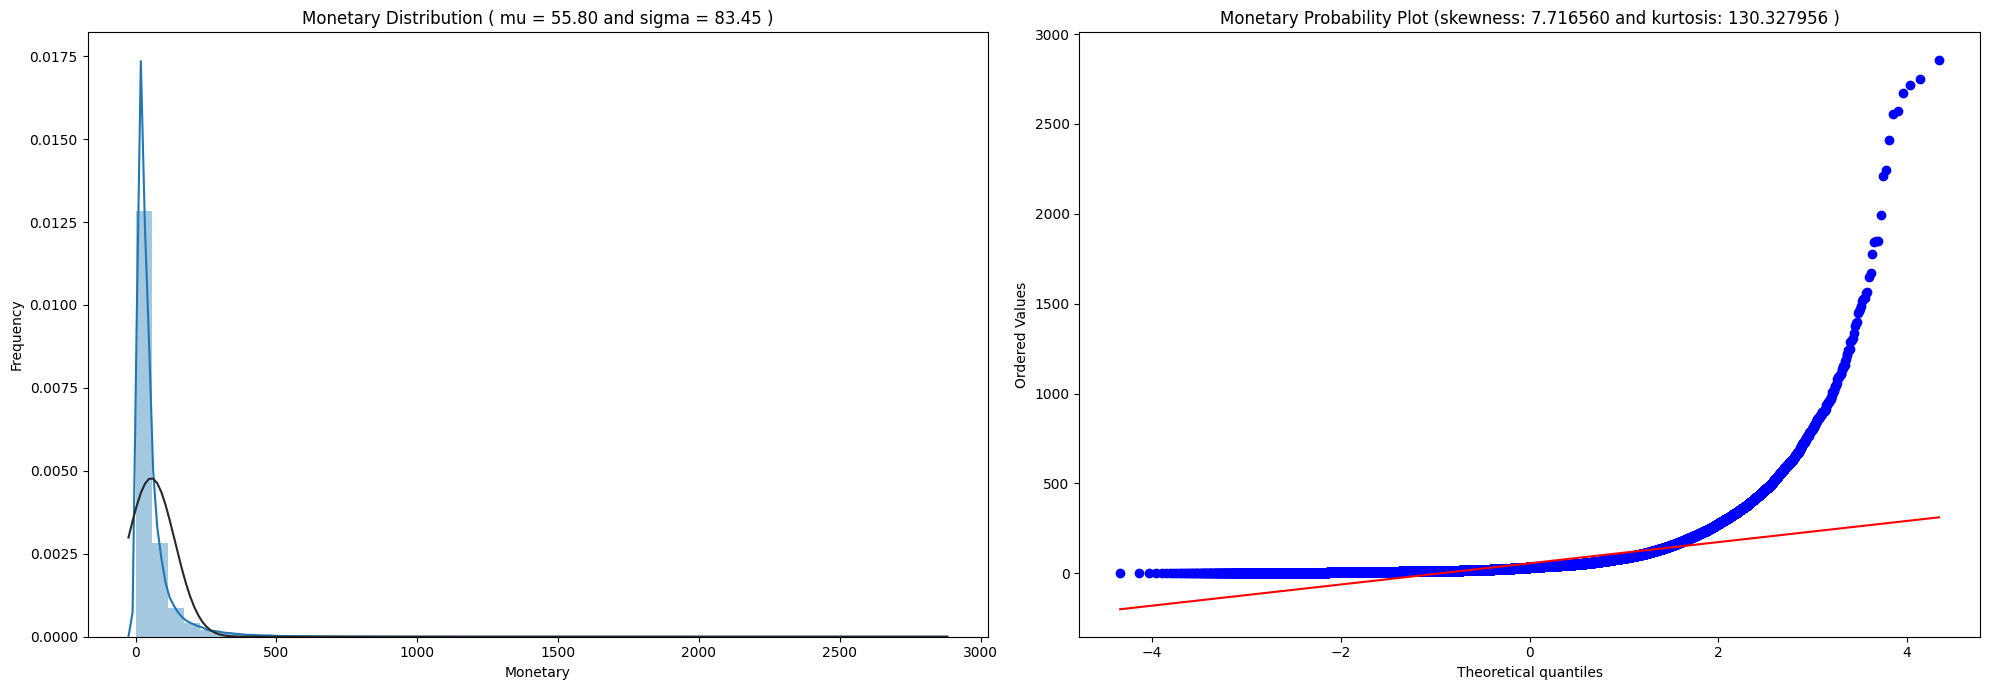

In [ ]:
QQ_plot(rfm['MonetaryValue'], 'Monetary')

In [ ]:
# R, F, M 모두가 좌측으로 편향된 분포를 가지는 것을 확인할 수 있으며 분산이 지나치게 큰 값을 보임
import math
from sklearn.preprocessing import MinMaxScaler
# R, F, M 컬럼의 정규화를 위해 각각 log를 취함

rfm['R_log'] = rfm['re_R'].apply(lambda x: math.log(x) if x > 0 else 0)
rfm['F_log'] = rfm['Frequency'].apply(lambda x: math.log(x) if x > 0 else 0)
rfm['M_log'] = rfm['MonetaryValue'].apply(lambda x: math.log(x) if x > 0 else 0)
features = ['R_log','F_log','M_log']

X_subset = rfm[features]

# 컬럼별로 표준화를 실행
scaler = MinMaxScaler().fit(X_subset)
X_scaled = scaler.transform(X_subset)
rfm_log=pd.DataFrame(X_scaled, columns=X_subset.columns)

In [ ]:
rfm_log.describe()

R_log  F_log  M_log
count  97026  97026  97026
mean       0      0      1
std        0      0      0
min        0      0      0
25%        0      0      0
50%        0      0      1
75%        0      0      1
max        1      1      1

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

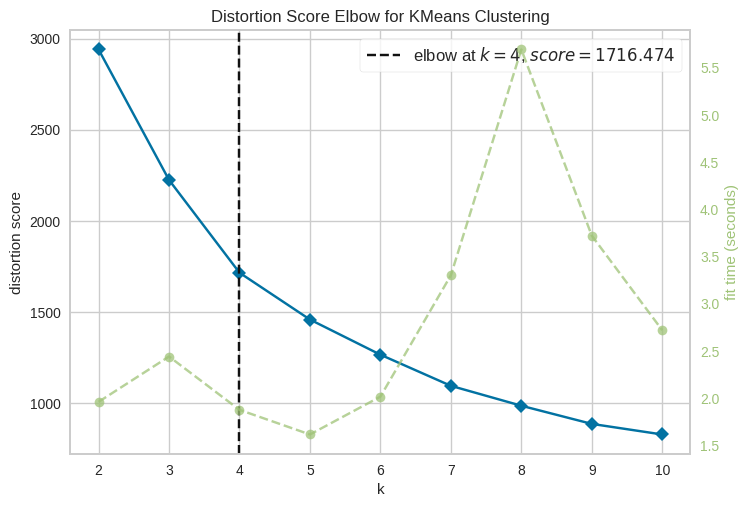

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# 엘보우 기법을 통해 군집 수 결정
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

Elbow_M = KElbowVisualizer(KMeans(init='k-means++',random_state=1004), k=10)
Elbow_M.fit(rfm_log)
Elbow_M.show()

#### KMeans

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=6, n_init='auto',random_state=42)
kmeans.fit(rfm_log)
kmeans.cluster_centers_, kmeans.inertia_

(array([[0.10094148, 0.02995696, 0.6105209 ],
        [0.28084472, 0.00789758, 0.52745758],
        [0.79033535, 0.10895192, 0.6004225 ],
        [0.33514991, 0.23309518, 0.6853813 ],
        [0.49429401, 0.01690195, 0.53227432],
        [0.09771218, 0.00172689, 0.46788397]]),
 1267.198793640202)

In [ ]:
kmeans.cluster_centers_.shape

(6, 3)

In [ ]:
inertia = []
silhouettes = []
range_n_clusters = range(2, 21)

for n_cluster in range_n_clusters:
  kmeans = KMeans(n_clusters=n_cluster, n_init='auto',random_state=42)
  kmeans.fit(rfm_log)
  inertia.append(kmeans.inertia_)
  silhouettes.append(silhouette_score(rfm_log, labels=kmeans.labels_))
  print(n_cluster, end=',')

2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,

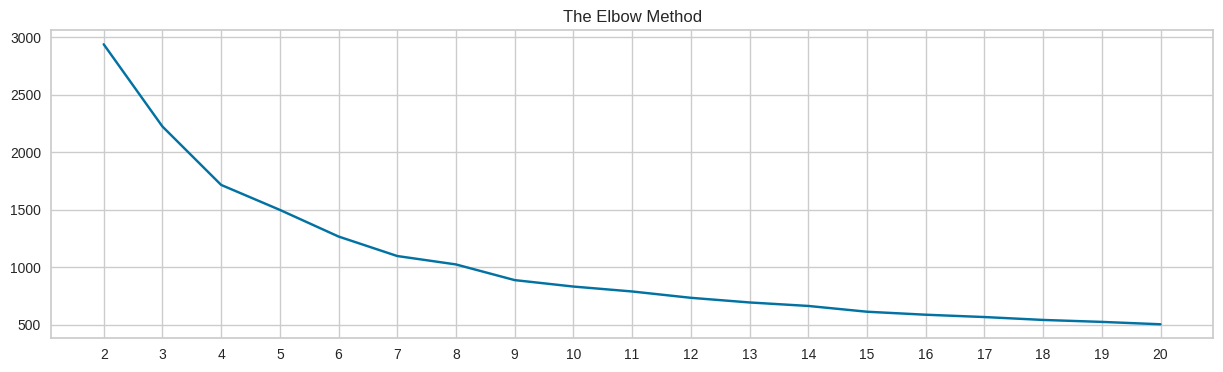

In [ ]:
plt.figure(figsize=(15,4))
plt.plot(range_n_clusters, inertia)
plt.title('The Elbow Method')
plt.xticks(range_n_clusters)
plt.show()

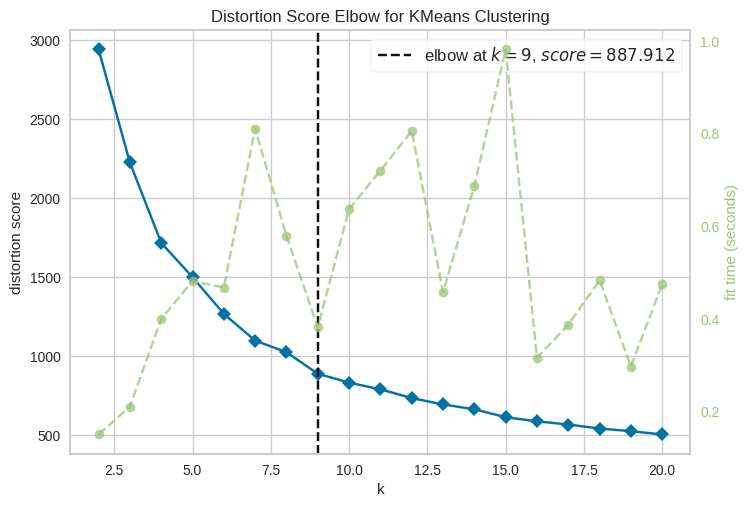

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

KEV = KElbowVisualizer(kmeans, k=20, n_init='auto')
KEV.fit(rfm_log)
KEV.show()

6개의 클러스터

In [ ]:
n_clusters = 9
kmeans = KMeans(n_clusters=n_clusters, n_init='auto', random_state=42)
kmeans.fit(rfm_log)

KMeans(n_clusters=9, n_init='auto', random_state=42)

In [ ]:
kmeans.labels_

array([8, 0, 3, ..., 2, 2, 2], dtype=int32)

In [ ]:
kmeans.cluster_centers_

array([[8.98989308e-02, 9.15240106e-15, 5.97388647e-01],
       [2.74321661e-01, 9.04475745e-05, 6.00160800e-01],
       [8.09472886e-01, 3.20448682e-02, 5.45290326e-01],
       [6.65310976e-01, 3.08863024e-01, 7.24569618e-01],
       [1.48705200e-01, 1.73620688e-01, 6.30332134e-01],
       [3.56315680e-01, 2.22300193e-01, 6.74147142e-01],
       [2.87716043e-01, 4.02581858e-03, 4.57781930e-01],
       [4.99982293e-01, 1.52824683e-02, 5.38084487e-01],
       [9.60815911e-02, 6.79015567e-04, 4.64440149e-01]])

In [ ]:
pd.Series(kmeans.labels_).value_counts()

8    21946
0    20641
6    11912
1    11752
7     9295
4     7804
5     7217
2     3916
3     2543
Name: count, dtype: int64

In [ ]:
pd.Series(kmeans.labels_).value_counts()

0    27953
5    26911
2    16071
3    12810
4     8612
1     4669
Name: count, dtype: int64

##### 실루엣 분석 시각화

In [ ]:
silhouette_avg = silhouette_score(rfm_log, kmeans.labels_)
silhouette_avg

0.3466214475214148

실루엣 계수의 평균 값을 기준으로 클러스터링의 적절성을 판단

0.7 이상: 매우 좋은 클러스터 구조.
0.5 - 0.7: 적절한 클러스터 구조.
0.25 - 0.5: 약한 클러스터 구조, 클러스터가 약간 혼합되어 있을 수 있음.
0.25 이하: 클러스터가 명확하지 않음.

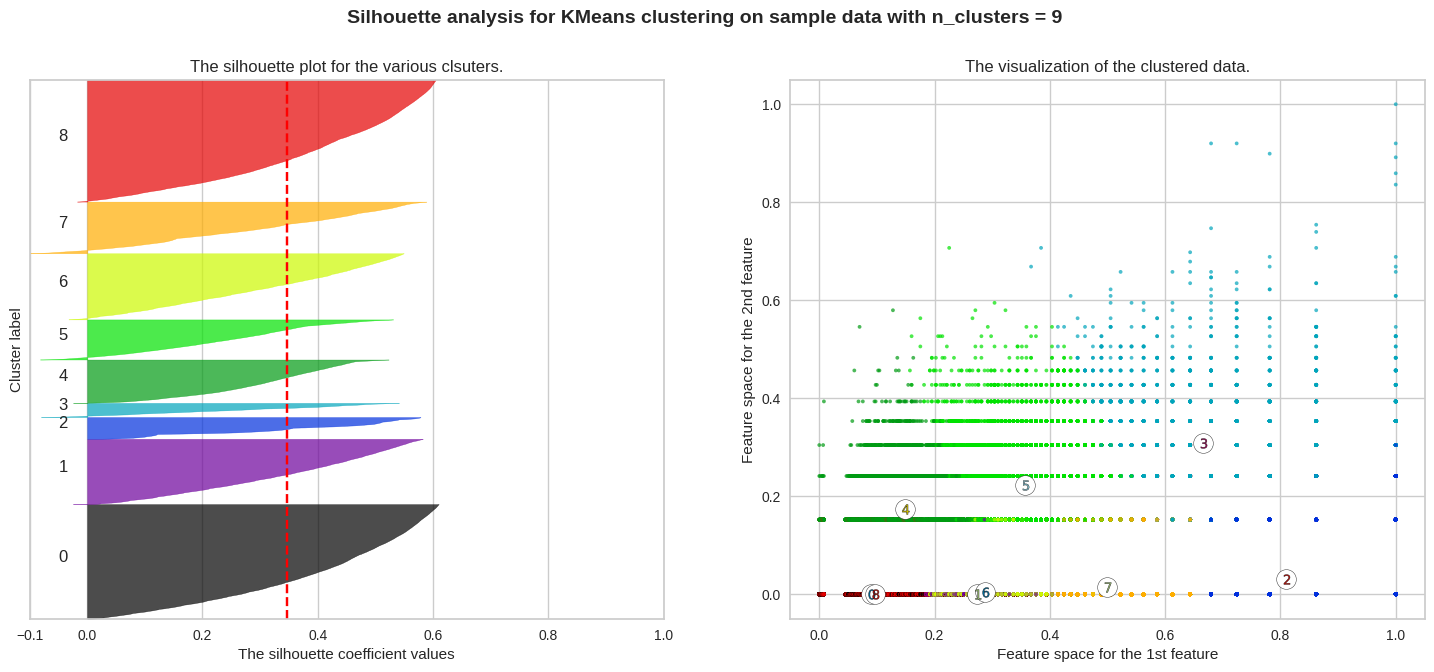

In [ ]:
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18,7)

ax1.set_xlim([-0.1, 1])

ax1.set_ylim([0, len(rfm_log) + (n_clusters +1) * 10])

cluster_labels = kmeans.labels_
sample_silhouette_values = silhouette_samples(rfm_log, cluster_labels)

y_lower = 10
for i in range(n_clusters):
  ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

  ith_cluster_silhouette_values.sort()

  size_cluster_i = ith_cluster_silhouette_values.shape[0]
  y_upper = y_lower + size_cluster_i

  color = cm.nipy_spectral(float(i) / n_clusters)
  ax1.fill_betweenx(
      np.arange(y_lower, y_upper),
      0,
      ith_cluster_silhouette_values,
      facecolor=color,
      edgecolor=color,
      alpha=0.7,
  )

  ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

  y_lower = y_upper + 10

ax1.set_title('The silhouette plot for the various clsuters.')
ax1.set_xlabel('The silhouette coefficient values')
ax1.set_ylabel('Cluster label')

ax1.axvline(x=silhouette_avg, color='red', linestyle='--')

ax1.set_yticks([])
ax1.set_xticks([ -0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

colors= cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
ax2.scatter(
    rfm_log.iloc[:, 0], rfm_log.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k'
)

centers = kmeans.cluster_centers_
ax2.scatter(
    centers[:, 0],
    centers[:, 1],
    marker='o',
    c='white',
    alpha=1,
    s=200,
    edgecolor='k',
)

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor='k')

ax2.set_title('The visualization of the clustered data.')
ax2.set_xlabel('Feature space for the 1st feature')
ax2.set_ylabel('Feature space for the 2nd feature')

plt.suptitle(
    'Silhouette analysis for KMeans clustering on sample data with n_clusters = %d'
    % n_clusters,
    fontsize=14,
    fontweight='bold',
)

plt.show()

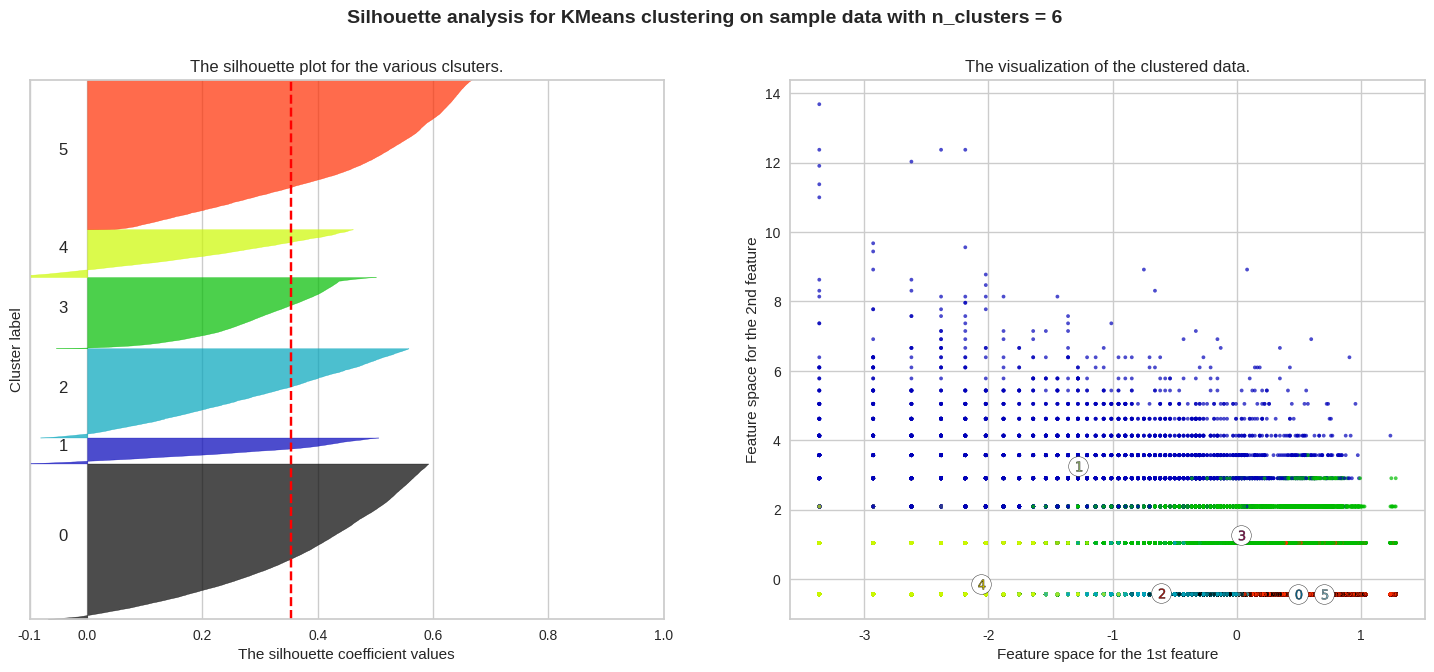

In [ ]:
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18,7)

ax1.set_xlim([-0.1, 1])

ax1.set_ylim([0, len(rfm_log) + (n_clusters +1) * 10])

cluster_labels = kmeans.labels_
sample_silhouette_values = silhouette_samples(X, cluster_labels)

y_lower = 10
for i in range(n_clusters):
  ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

  ith_cluster_silhouette_values.sort()

  size_cluster_i = ith_cluster_silhouette_values.shape[0]
  y_upper = y_lower + size_cluster_i

  color = cm.nipy_spectral(float(i) / n_clusters)
  ax1.fill_betweenx(
      np.arange(y_lower, y_upper),
      0,
      ith_cluster_silhouette_values,
      facecolor=color,
      edgecolor=color,
      alpha=0.7,
  )

  ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

  y_lower = y_upper + 10

ax1.set_title('The silhouette plot for the various clsuters.')
ax1.set_xlabel('The silhouette coefficient values')
ax1.set_ylabel('Cluster label')

ax1.axvline(x=silhouette_avg, color='red', linestyle='--')

ax1.set_yticks([])
ax1.set_xticks([ -0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

colors= cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
ax2.scatter(
    rfm_log.iloc[:, 0], rfm_log.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k'
)

centers = kmeans.cluster_centers_
ax2.scatter(
    centers[:, 0],
    centers[:, 1],
    marker='o',
    c='white',
    alpha=1,
    s=200,
    edgecolor='k',
)

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor='k')

ax2.set_title('The visualization of the clustered data.')
ax2.set_xlabel('Feature space for the 1st feature')
ax2.set_ylabel('Feature space for the 2nd feature')

plt.suptitle(
    'Silhouette analysis for KMeans clustering on sample data with n_clusters = %d'
    % n_clusters,
    fontsize=14,
    fontweight='bold',
)

plt.show()

In [53]:
rfm['Cluster'] = kmeans.labels_
rfm

Recency  Frequency  MonetaryValue  re_R  R_log  F_log  M_log  \
user_id                                                                   
9794320         97          1             13     0     -5      0      3   
10079204       116          1             26     0     -5      0      3   
10280338        11          5            178     0     -2      2      5   
12055855        72          1             17     0     -4      0      3   
12936739        44          1             30     0     -4      0      3   
...            ...        ...            ...   ...    ...    ...    ...   
622065819        1          1             20     1      0      0      3   
622066161        1          1             13     1      0      0      3   
622067983        1          1             66     1      0      0      4   
622069477        1          1              1     1      0      0     -0   
622073202        1          1              4     1      0      0      1   

           Cluster  
user_id             
9794320          8  
10079204         0  
10280338         3  
12055855         8  
12936739         1  
...            ...  
622065819        2  
622066161        2  
622067983        2  
622069477        2  
622073202        2  

[97026 rows x 8 columns]

In [123]:
pd.crosstab(rfm['RFM_class'], rfm['Cluster'])

Cluster        0     1     2     3     4     5     6     7      8
RFM_class                                                        
blonze      3403     0     0     0    57     0  1893     0  19064
silver     13606  1858   807     0  1275     0  9280  1810   2882
gold        3632  7984  1450     1  3847   446   739  4234      0
platinum       0  1910  1659  2542  2625  6771     0  3251      0

In [124]:
rfm['Cluster'].value_counts()

Cluster
8    21946
0    20641
6    11912
1    11752
7     9295
4     7804
5     7217
2     3916
3     2543
Name: count, dtype: int64

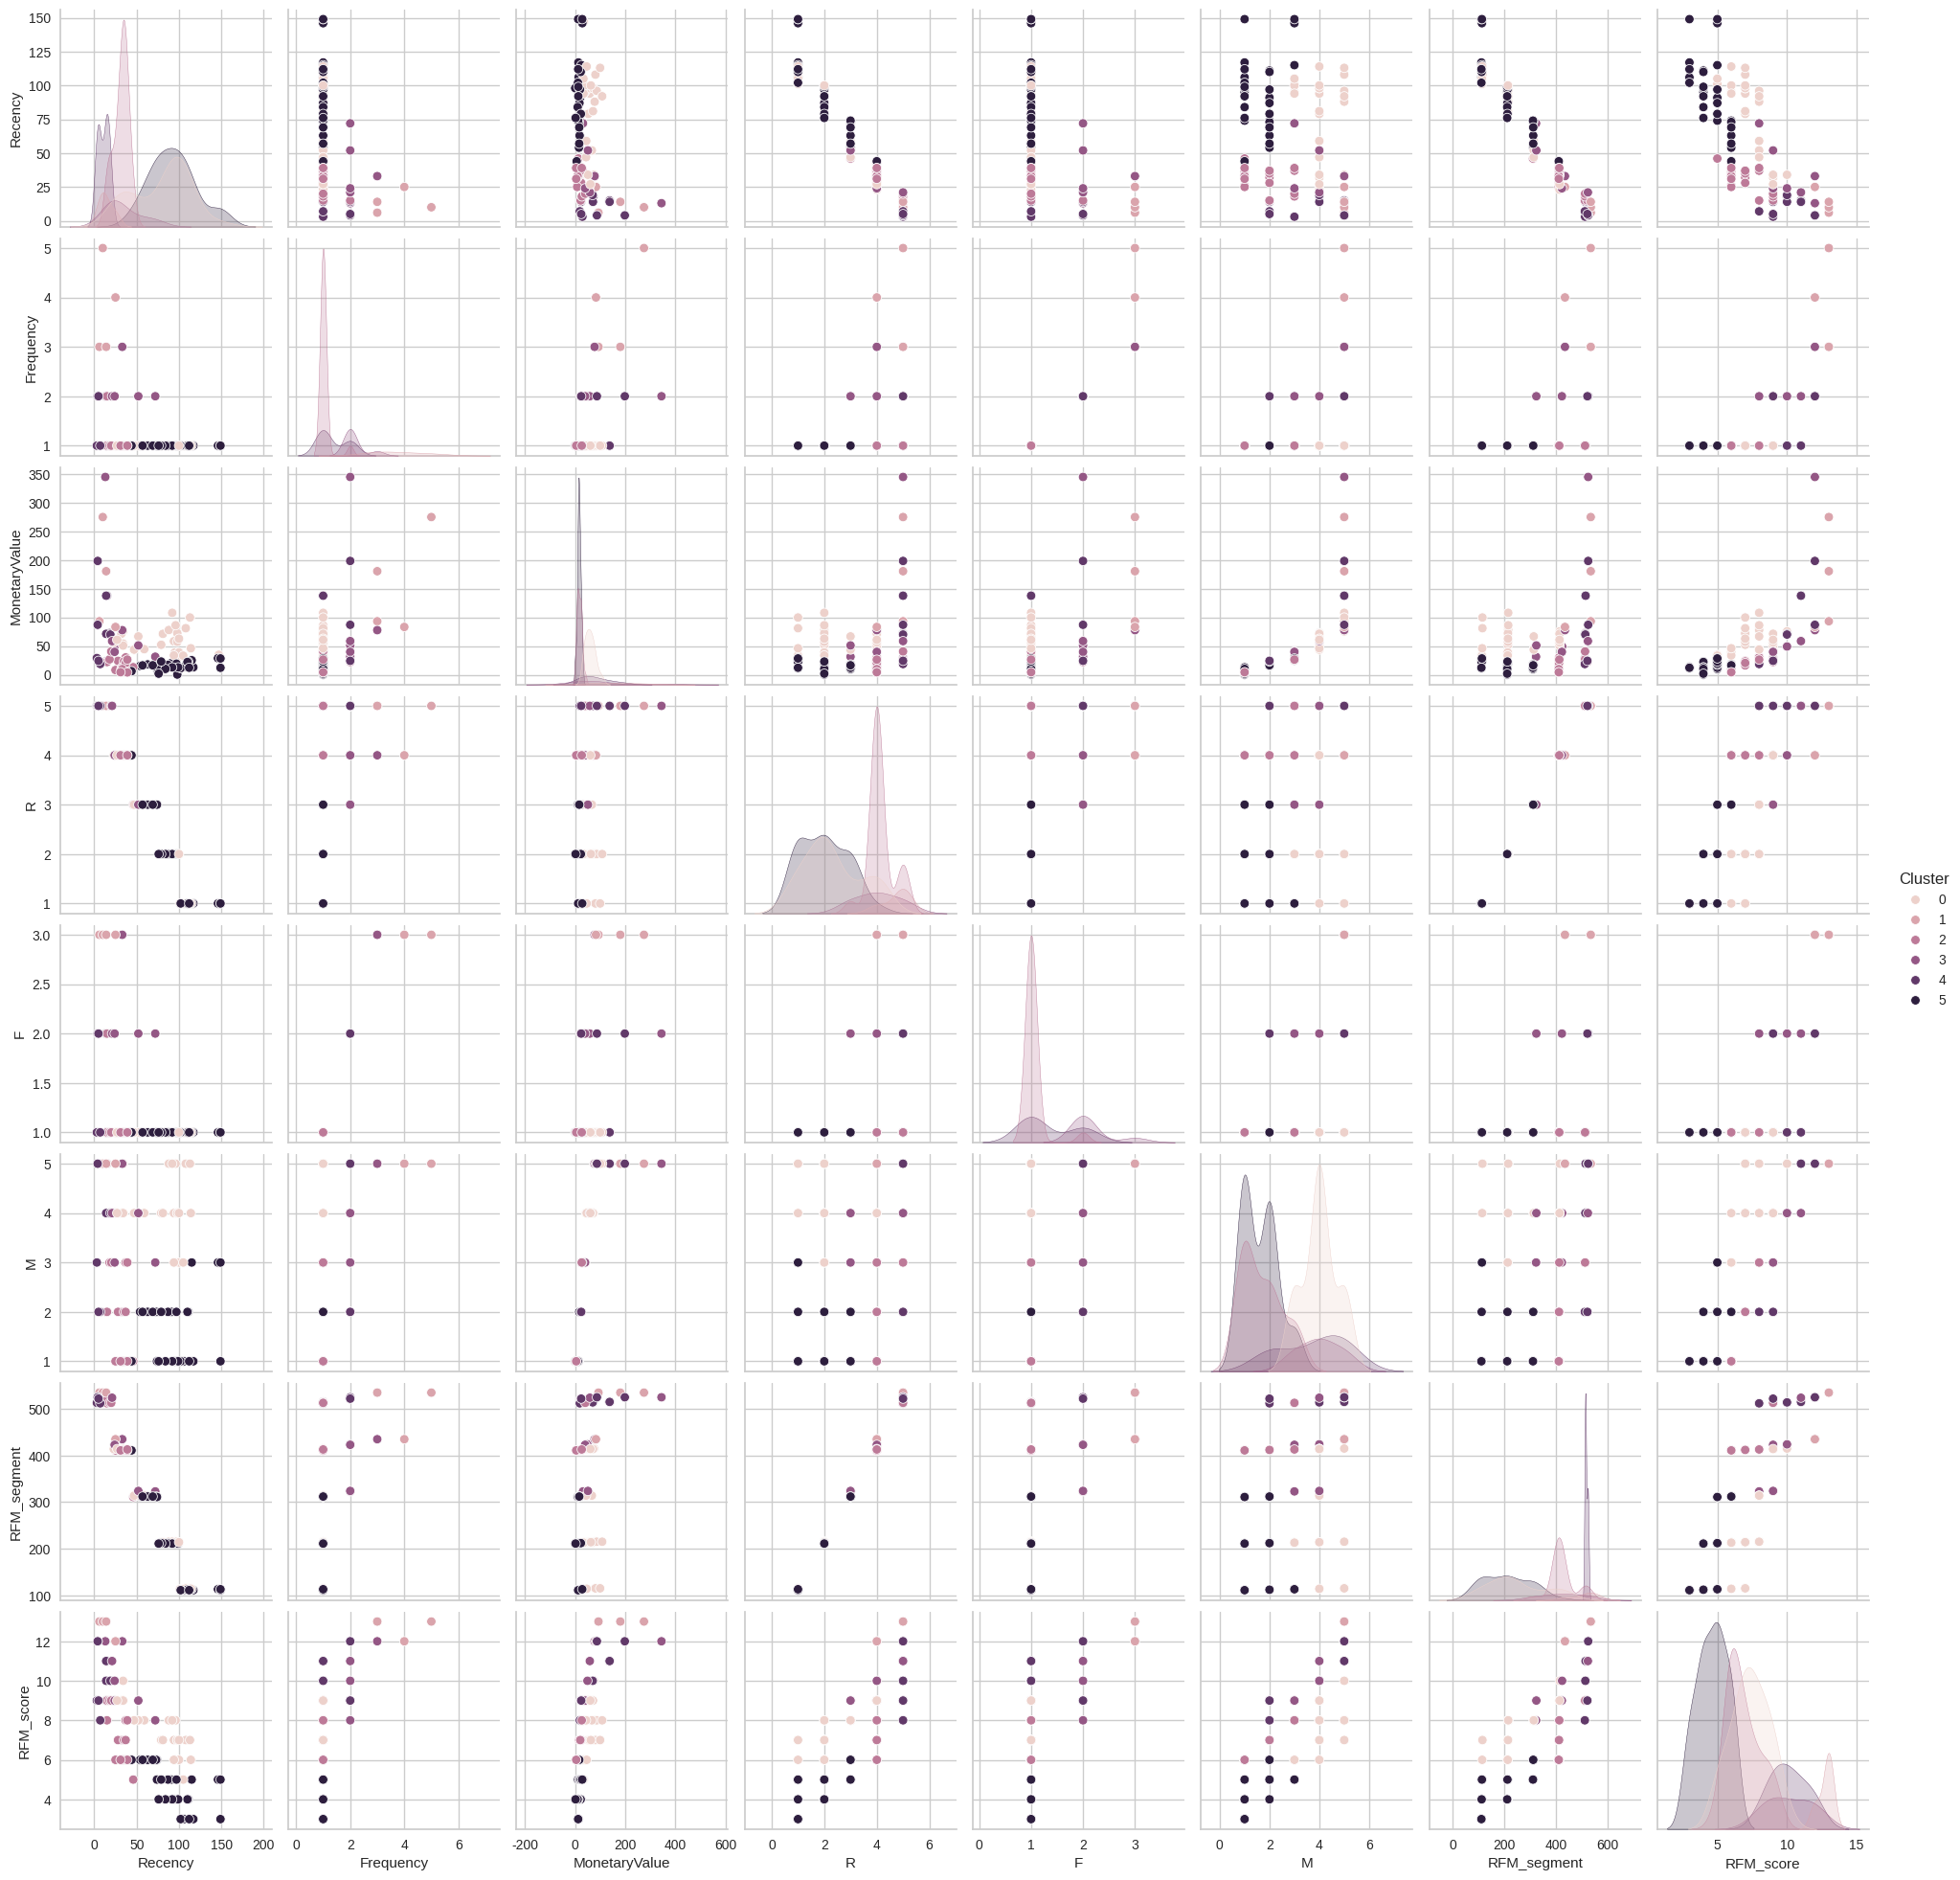

In [ ]:
sns.pairplot(data=rfm.sample(100), hue='Cluster')

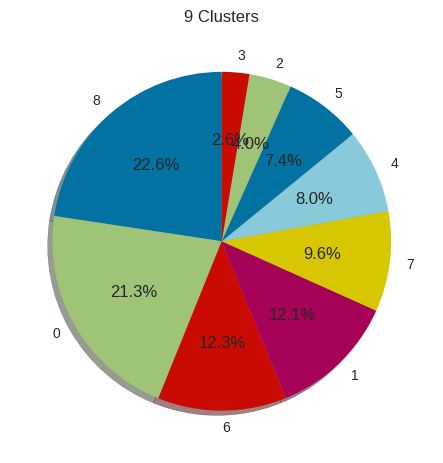

In [125]:
# 군집별 빈도 수
market = rfm.Cluster.value_counts()
g = plt.pie(market, labels=market.index, autopct='%.1f%%', shadow=True, startangle=90)
plt.title('9 Clusters')
plt.show()

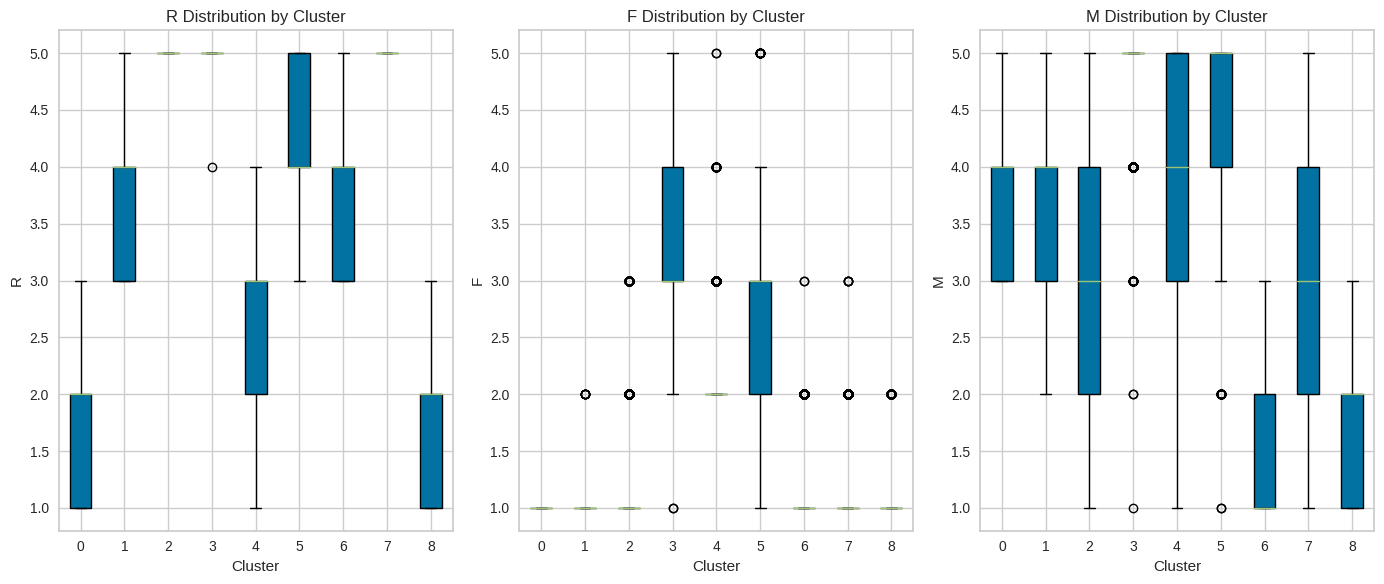

In [126]:
# Ensure the 'R', 'F', 'M' columns are numeric
rfm['R'] = pd.to_numeric(rfm['R'], errors='coerce')
rfm['F'] = pd.to_numeric(rfm['F'], errors='coerce')
rfm['M'] = pd.to_numeric(rfm['M'], errors='coerce')

# Ensure the 'clusters' column is integer
rfm['Cluster'] = pd.to_numeric(rfm['Cluster'], errors='coerce')

# Recalculate cluster means
cluster_means = rfm.groupby('Cluster')[['R', 'F', 'M']].mean()

# Plot boxplots
plt.figure(figsize=(14, 6))

for i, col in enumerate(cluster_means.columns):
    plt.subplot(1, 3, i+1)
    plt.boxplot([rfm[rfm['Cluster'] == c][col] for c in cluster_means.index], patch_artist=True)
    plt.xlabel('Cluster')
    plt.ylabel(col)
    plt.title(f'{col} Distribution by Cluster')
    plt.xticks(range(1, len(cluster_means.index) + 1), cluster_means.index)

plt.tight_layout()
plt.show()

0: Silver

1: Gold

2: Platinum+Gold+Silver

3: Platinum

4: Gold+Platinum+Silver

5: Platinum

6: Silver

7: Gold+Platinum

8: Bronze

In [129]:
rfm_final = pd.read_csv('/content/drive/My Drive/RFM_LOG.csv')
rfm_final.head()

user_id  Recency  Frequency  MonetaryValue  R_log  F_log  M_log  Cluster  \
0   9794320       97          1             13     -5      0      3        8   
1  10079204      116          1             26     -5      0      3        0   
2  10280338       11          5            178     -2      2      5        3   
3  12055855       72          1             17     -4      0      3        8   
4  12936739       44          1             30     -4      0      3        1   

   R  F  M  RFM_segment  RFM_score RFM_class  
0  2  1  1          211          4    blonze  
1  1  1  3          113          5    blonze  
2  5  3  5          535         13  platinum  
3  3  1  2          312          6    silver  
4  4  1  3          413          8      gold

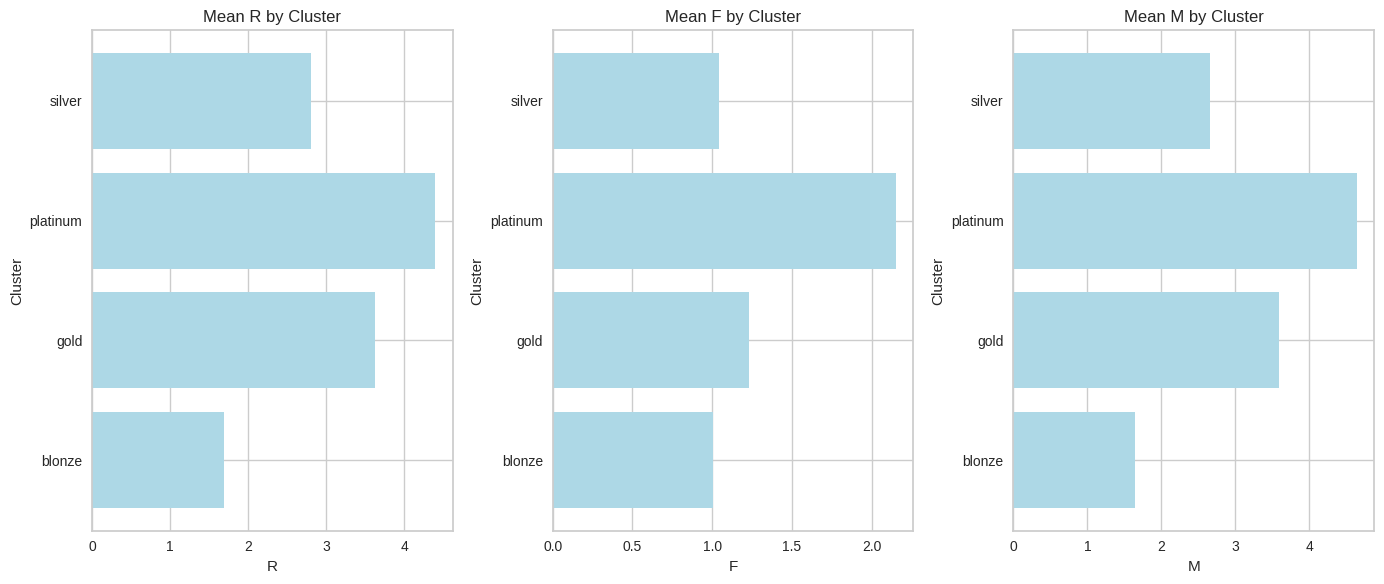

In [131]:
# 군집별  R, F, M 평균 추출
cluster_means = rfm_final.groupby('RFM_class')[['R','F','M']].mean()

# 그래프 크기 설정
plt.figure(figsize=(14, 6))

# 각 군집별로 막대 그래프 그리기
for i, col in enumerate(cluster_means.columns):
    plt.subplot(1, 3, i+1)
    plt.barh(cluster_means.index, cluster_means[col], color='lightblue')
    plt.ylabel('Cluster')
    plt.xlabel(col)
    plt.title(f'Mean {col} by Cluster')

plt.tight_layout()
plt.show()

- 4개의 등급으로 나누었을 때, Frequency의 경우 bronze, silver는 모두 1이므로 (첫 구매 이후 재구매가 없는 것으로 확인된다)
- RFM q-cut 기준을 잡을 때 frequency의 경우 1은 1번 2는 2번으로 기준으로 잡아놨기 때문에 Gold 등급 역시 1-2번 방문한 고객들로 이루어져있지만, 1.2정도의 값으로 확인되어 거의 1번 방문한 고객들로 이루어짐을 알 수 있다

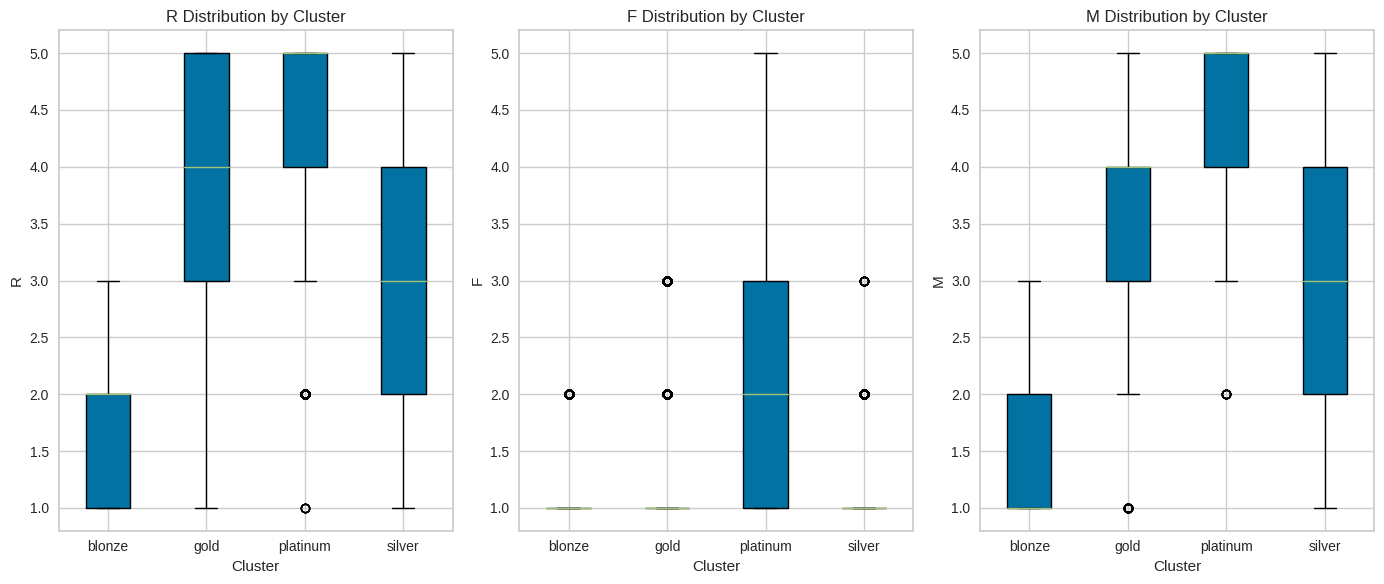

In [132]:
# Boxplot
plt.figure(figsize=(14, 6))

# 각 군집별로 박스플롯 그리기
for i, col in enumerate(cluster_means.columns):
    plt.subplot(1, 3, i+1)
    plt.boxplot([rfm_final[rfm_final['RFM_class']==c][col] for c in cluster_means.index], patch_artist=True)
    plt.xlabel('Cluster')
    plt.ylabel(col)
    plt.title(f'{col} Distribution by Cluster')
    plt.xticks(range(1, len(cluster_means.index)+1), cluster_means.index)

plt.tight_layout()
plt.show()

In [135]:
desired_order = ['platinum', 'gold', 'silver', 'blonze']

result = rfm_final.groupby('RFM_class')[['R', 'F', 'M']].mean().reindex(desired_order)
result

R  F  M
RFM_class         
platinum   4  2  5
gold       4  1  4
silver     3  1  3
blonze     2  1  2

In [137]:
# rfm_grade 별로 통계적으로 유의미한 차이가 있는지 검정
from scipy.stats import f_oneway

# 그룹별 데이터 추출
group_platinum = rfm_final[rfm_final['RFM_class'] == 'platinum']['R']
group_gold = rfm_final[rfm_final['RFM_class'] == 'gold']['R']
group_silver = rfm_final[rfm_final['RFM_class'] == 'silver']['R']
group_bronze = rfm_final[rfm_final['RFM_class'] == 'blonze']['R']

# 분산 분석 수행
f_statistic, p_value = f_oneway(group_platinum, group_gold, group_silver, group_bronze)

# 결과 출력
print("F-statistic:", f_statistic)
print("p-value:", p_value)

F-statistic: 28105.225966376904
p-value: 0.0


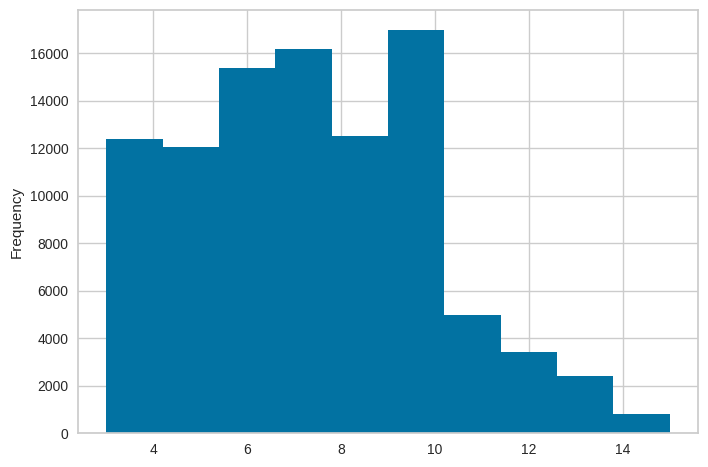

In [139]:
rfm_final['RFM_score'].plot(kind='hist');

In [140]:
!pip install squarify

In [143]:
def get_rfm_scores(dataframe):
    df_ = dataframe.copy()
    df_["recency_score"] = pd.qcut(df_["R"].rank(method="first"), 5, labels=[5, 4, 3, 2, 1])
    df_["frequency_score"] = pd.qcut(df_["F"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
    df_["monetary_score"] = pd.qcut(df_["M"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
    df_["RFM_SCORE"] = df_["recency_score"].astype(str) + df_["frequency_score"].astype(str)
    return df_

rfm1 = get_rfm_scores(rfm_final)

In [146]:
# 기욤 마틴 R,F 점수 고객 세분화
seg_map = {r'[1-2][1-2]': 'hibernating',
           r'[1-2][3-4]': 'at_Risk',
           r'[1-2]5': 'cannot_lose',
           r'3[1-2]': 'about_to_sleep',
           r'33': 'need_attention',
           r'[3-4][4-5]': 'loyal_customers',
           r'41': 'promising',
           r'51': 'new_customers',
           r'[4-5][2-3]': 'potential_loyalists',
           r'5[4-5]': 'champions'}

rfm1['segment'] = rfm1['RFM_SCORE'].replace(seg_map, regex = True)
rfm1.head()

user_id  Recency  Frequency  MonetaryValue  R_log  F_log  M_log  Cluster  \
0   9794320       97          1             13     -5      0      3        8   
1  10079204      116          1             26     -5      0      3        0   
2  10280338       11          5            178     -2      2      5        3   
3  12055855       72          1             17     -4      0      3        8   
4  12936739       44          1             30     -4      0      3        1   

   R  F  M  RFM_segment  RFM_score RFM_class recency_score frequency_score  \
0  2  1  1          211          4    blonze             5               1   
1  1  1  3          113          5    blonze             5               1   
2  5  3  5          535         13  platinum             2               5   
3  3  1  2          312          6    silver             4               1   
4  4  1  3          413          8      gold             3               1   

  monetary_score RFM_SCORE         segment  
0              1        51   new_customers  
1              3        51   new_customers  
2              5        25     cannot_lose  
3              2        41       promising  
4              3        31  about_to_sleep

<마틴의 R, F 점수 기반 고객 세분화>
### 1. Hibernating (동면 고객) 5% 이하

- RFM_SCORE 패턴: R이 1 또는 2, F가 1 또는 2
특징: 최근 거래가 적고, 구매 빈도가 낮은 고객입니다. 활성화되지 않은 고객으로, 재활성화를 유도해야 할 대상입니다.

### 2. At Risk (위험 고객) 5-10%

- RFM_SCORE 패턴: R이 1 또는 2, F가 3 또는 4
특징: 최근 거래가 적지만 구매 빈도가 높은 고객입니다. 잠재적으로 이탈할 수 있는 고객으로, 유지 관리가 필요합니다.

###3. Can't Lose (이탈 방지 고객) 3% 이하

- RFM_SCORE 패턴: R이 1 또는 2, F가 5
특징: 최근 거래가 적지만 매우 높은 구매 빈도를 보이는 고객입니다. 이탈을 방지하기 위해 주의를 기울여야 할 대상입니다.

###4. About to Sleep (잠자리에 들 고객) 3-5%

- RFM_SCORE 패턴: R이 3, F가 1 또는 2
특징: 최근 거래가 감소하고, 구매 빈도도 낮아지고 있는 고객입니다. 잠재적으로 동면 상태에 진입할 가능성이 있는 고객입니다.

###5. Need Attention (주의가 필요한 고객) 5-10%

- RFM_SCORE 패턴: R이 3, F가 3
특징: 최근 거래는 적지만 구매 빈도는 보통인 고객입니다. 활성화 전략을 통해 재구매를 유도할 필요가 있습니다.

###6. Loyal Customers (충성 고객) 15-20%

- RFM_SCORE 패턴: R이 3 또는 4, F가 4 또는 5
특징: 충성도가 높은 고객으로, 최근 거래는 일정하지만 높은 구매 빈도를 유지하는 고객입니다.

###7. Promising (유망 고객) 5-10%

- RFM_SCORE 패턴: R이 4, F가 1
특징: 최근 거래는 적지만 잠재력이 있는 고객입니다. 추가적인 마케팅 노력을 통해 충성도를 향상시킬 수 있는 고객입니다.

###8. New Customers (신규 고객) 10-20%

- RFM_SCORE 패턴: R이 5, F가 1
특징: 최근에 가입한 신규 고객으로, 잠재적으로 충성 고객이 될 수 있는 대상입니다.

###9. Potential Loyalists (잠재적 충성 고객) 10-15%

- RFM_SCORE 패턴: R이 4 또는 5, F가 2 또는 3
특징: 최근 거래는 일정하지만 구매 빈도가 아직 높지 않은 고객입니다. 추가적인 마케팅 노력을 통해 충성도를 높일 수 있는 잠재력이 있는 고객입니다.

###10. Champions (챔피언 고객) 10% 미만

- RFM_SCORE 패턴: R이 5, F가 4 또는 5
특징: 최근 거래가 많고, 구매 빈도가 매우 높은 충성 고객입니다. 회사의 주요 수익원이 될 수 있는 고객입니다.

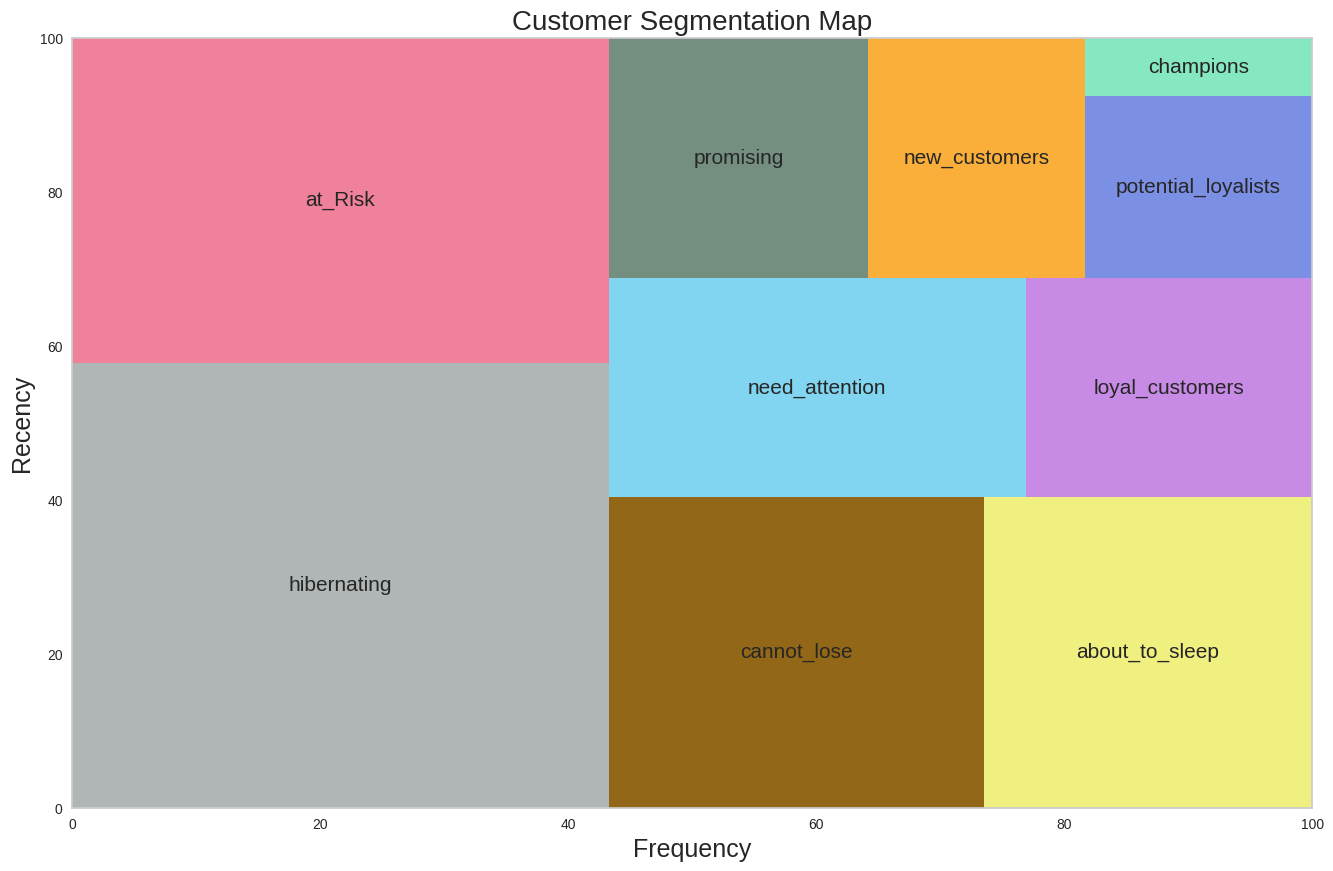

In [147]:
import squarify
segments = rfm1["segment"].value_counts().sort_values(ascending=False)
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 10)
squarify.plot(
    sizes=segments,
    label=[label for label in seg_map.values()],
    color=[
        "#AFB6B5",
        "#F0819A",
        "#926717",
        "#F0F081",
        "#81D5F0",
        "#C78BE5",
        "#748E80",
        "#FAAF3A",
        "#7B8FE4",
        "#86E8C0",
    ],
    pad=False,
    bar_kwargs={"alpha": 1},
    text_kwargs={"fontsize": 15},
)
plt.title("Customer Segmentation Map", fontsize=20)
plt.xlabel("Frequency", fontsize=18)
plt.ylabel("Recency", fontsize=18)
plt.show()

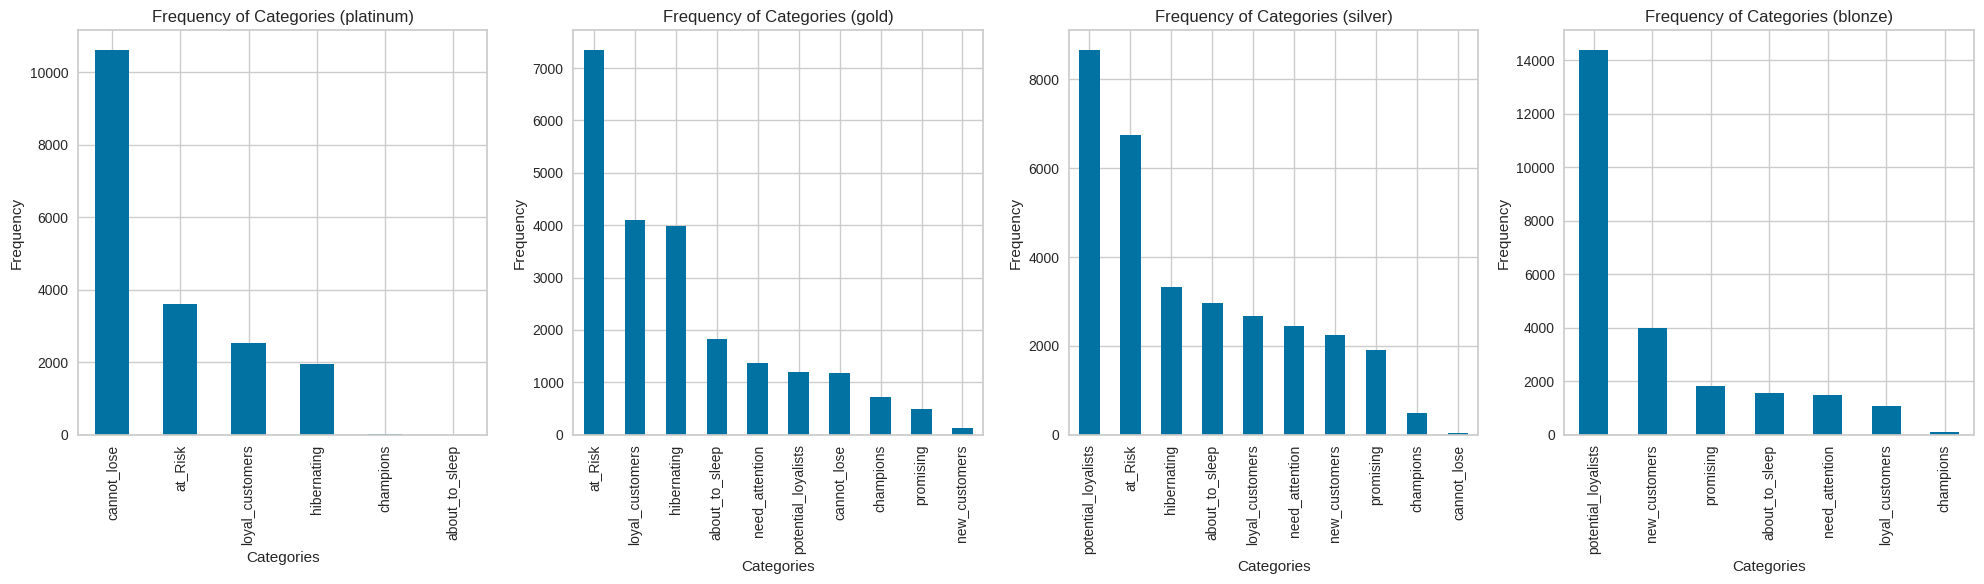

In [151]:
# 등급별 고객 세분화
fig, axes = plt.subplots(1, 4, figsize=(20, 6))

for i, grade in enumerate(['platinum', 'gold', 'silver', 'blonze']):
    category_counts = rfm1[rfm1['RFM_class'] == grade]['segment'].value_counts()
    category_counts.plot(kind='bar', ax=axes[i])  # 각 등급에 해당하는 서브플롯에 그래프 그리기
    axes[i].set_title(f'Frequency of Categories ({grade})')
    axes[i].set_xlabel('Categories')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [157]:
# Diamond, Platinum 전체 매출 퍼센트
round((rfm1[rfm1['RFM_class'] == 'silver']['M'].sum() + rfm1[rfm1['RFM_class'] == 'silver']['M'].sum()) / rfm1['M'].sum() * 100,2)

57.6

# CLV

* 평균 구매 가치 * 평균 구매 빈도율 * 평균 고객 수명
  - 평균 구매 가치 (=기간동안 총매출/주문건수)
  - 평균 구매 빈도율 (=주문건수/유저수)
  - 평균 고객 수명 (=고객생애주기)

In [ ]:
clv_df = pd.read_csv('/content/drive/MyDrive/이커머스 프로젝트/ecommerce_data_1st')

In [ ]:
clv_df.isnull().sum()

event_time            0
event_type            0
product_id            0
category_id           0
brand           7514027
price                 0
user_id               0
user_session       4046
dtype: int64

In [ ]:
clv_df.sample(5)

event_time        event_type  product_id  \
7012470   2019-12-11 04:09:59+00:00              view     5833334   
6807334   2019-12-09 17:11:35+00:00  remove_from_cart     5855508   
6346111   2019-12-05 22:37:26+00:00              view     5903827   
2870415   2019-11-14 08:07:01+00:00              cart       37996   
12456276  2020-01-25 11:33:24+00:00              cart     5626878   

                 category_id       brand  price    user_id  \
7012470  1487580007675986944   bpw.style      1  454012137   
6807334  1487580006350586880         max     95  512346877   
6346111  1487580007675986944         NaN      2  581674379   
2870415  1487580013581566208  refectocil     11  248704072   
12456276 1487580010125459712         NaN      1  506515072   

                                  user_session  
7012470   50dd7b24-6efe-469d-ba52-5e1412068cd4  
6807334   2b7f530b-477c-4479-976c-6237a7bdfb91  
6346111   24fe52c6-48da-42f1-8458-d2f5a2aae247  
2870415   0c5df5fd-f54c-4de8-b07f-d5cb35cc39c4  
12456276  a01b3c7e-94bf-49bc-ad0b-691d75b98d06

In [ ]:
!pip install lifetimes

In [ ]:
from lifetimes.plotting import *
from lifetimes.utils import *
from lifetimes import BetaGeoFitter
from lifetimes.fitters.gamma_gamma_fitter import GammaGammaFitter

from hyperopt import hp, fmin, tpe, rand, SparkTrials, STATUS_OK, space_eval, Trials

In [ ]:
# InvoiceDate (주문 일자): Datetime -> date형
clv_df['event_time'] = pd.to_datetime(df['event_time']).dt.date

In [ ]:
clv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17639017 entries, 0 to 17639016
Data columns (total 8 columns):
 #   Column        Dtype  
---  ------        -----  
 0   event_time    object 
 1   event_type    object 
 2   product_id    int64  
 3   category_id   float64
 4   brand         object 
 5   price         float64
 6   user_id       int64  
 7   user_session  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 1.1+ GB


In [ ]:
clv_df = clv_df[clv_df['event_type'] == 'purchase']
clv_df.head()

event_time event_type  product_id         category_id   brand  price  \
202  2019-10-01   purchase     5619862 1487580000000000000  runail      5   
204  2019-10-01   purchase     5619866 1487580000000000000  runail      3   
205  2019-10-01   purchase     5696184 1487580000000000000  runail      2   
206  2019-10-01   purchase     5706784 1487580000000000000  runail      4   
207  2019-10-01   purchase     5723503 1487580000000000000  runail      3   

       user_id                          user_session  
202  474232307  445f2b74-5e4c-427e-b7fa-6e0a28b156fe  
204  474232307  445f2b74-5e4c-427e-b7fa-6e0a28b156fe  
205  474232307  445f2b74-5e4c-427e-b7fa-6e0a28b156fe  
206  474232307  445f2b74-5e4c-427e-b7fa-6e0a28b156fe  
207  474232307  445f2b74-5e4c-427e-b7fa-6e0a28b156fe

In [ ]:
# 고객 번호, 주문 일자, 구매 금액만 남기고 지우기
cols_of_interest = ['user_id', 'event_time', 'price']
clv_df = clv_df[cols_of_interest]

In [ ]:
clv_df.head()

user_id  event_time  price
202  474232307  2019-10-01      5
204  474232307  2019-10-01      3
205  474232307  2019-10-01      2
206  474232307  2019-10-01      4
207  474232307  2019-10-01      3

In [ ]:
# event_time을 datetime 형식으로 변환하여 최대 날짜를 얻음
clv_df['event_time'] = pd.to_datetime(clv_df['event_time'])
current_date = clv_df['event_time'].max()


metrics_df = summary_data_from_transaction_data(clv_df
                                          , customer_id_col = 'user_id'
                                          , datetime_col = 'event_time'
                                          , monetary_value_col='price'
                                          , observation_period_end=current_date)
metrics_df.sample(5)

frequency  recency   T  monetary_value
user_id                                          
376649954          1       96 114              28
423772284          0        0  43               0
472211769          0        0 110               0
571966871          0        0 106               0
273905233          1       55 105              16

- Frequency: 고객별 구매일수
- Recency: 고객별 첫구매~마지막 구매시간
- T: 고객별 첫구매~종료일까지 시간
- MonetaryValue: 고객 평균 구매금액

In [ ]:
metrics_df[metrics_df.index==376649954]

frequency  recency   T  monetary_value
user_id                                          
376649954          1       96 114              28

- 해당 고객은 총 7번 구매
- 마지막 구매일 - 첫 구매일 = 140일
- 종료일(2/28) - 첫 구매일 - 145일
- 평균금액 - 66

In [ ]:
## 수동 계산해보기!
example = clv_df[clv_df['user_id']==376649954]
example.head(20)

user_id event_time  price
1957131   376649954 2019-11-07      2
1957135   376649954 2019-11-07      0
1957136   376649954 2019-11-07     10
15083627  376649954 2020-02-11     28

In [ ]:
example.info()

<class 'pandas.core.frame.DataFrame'>
Index: 124 entries, 991058 to 16885651
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   user_id     124 non-null    int64  
 1   event_time  124 non-null    object 
 2   price       124 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 7.9+ KB


In [ ]:
example['event_time'] = pd.to_datetime(example['event_time'])

# frequency = 6, 구매 일수
print(len(example['event_time'].unique())-1)

# recency = 365: 최대 주문일 - 최소 주문일
print(max(example['event_time']) - min(example['event_time']))

# T = 367: 집계일 - 최소 주문일
print(current_date - min(example['event_time']))

# monetary_value = 599.701667, 평균 구매 금액
ex_daily_sales = example.groupby("event_time")["price"].sum()
print(np.mean(ex_daily_sales[1:]))

1
96 days 00:00:00
114 days 00:00:00
28.41


In [ ]:
from datetime import timedelta

# Convert current_date to timezone-naive datetime
current_date = current_date.replace(tzinfo=None)

# Assuming df is your DataFrame and event_time needs to be localized
df['event_time'] = pd.to_datetime(df['event_time']).dt.tz_localize('UTC')

holdout_days = 30
calibration_end_date = current_date - timedelta(days=holdout_days)

metrics_cal_df = calibration_and_holdout_data(df,
                                              customer_id_col='user_id',
                                              datetime_col='event_time',
                                              calibration_period_end=calibration_end_date,
                                              observation_period_end=current_date,
                                              monetary_value_col='price')

metrics_cal_df.head()

KeyboardInterrupt: 

In [ ]:
from lifetimes.datasets import load_cdnow_summary
from lifetimes import BetaGeoFitter, GammaGammaFitter
from lifetimes.utils import calibration_and_holdout_data
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from hyperopt import hp, fmin, Trials, tpe

In [ ]:
# calibration과 holdout 데이터 나누기
calibration_period_ends = '2019-11-30'
holdout_period_ends = '2019-12-30'

summary_cal_holdout = calibration_and_holdout_data(
    metrics_df['frequency'],
    metrics_df['recency'],
    metrics_df['T'],
    calibration_period_ends,
    holdout_period_ends
)

KeyError: "None of [Index([(0.0, 0.0, 91.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 0.0, 0.0, 0.0, 17.0, 0.0, 0.0, 24.0, 76.0, 0.0, 19.0, 0.0, 0.0, 48.0, 0.0, 0.0, 88.0, 0.0, 0.0, 0.0, 0.0, 48.0, 0.0, 0.0, 70.0, 0.0, 54.0, 0.0, 95.0, 0.0, 90.0, 0.0, 0.0, 48.0, 0.0, 100.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 10.0, 0.0, 15.0, 0.0, 0.0, 0.0, 61.0, 0.0, 0.0, 0.0, 0.0, 88.0, 83.0, 8.0, 18.0, 58.0, 0.0, 46.0, 0.0, 0.0, 0.0, 35.0, 0.0, 33.0, 0.0, 0.0, 0.0, 79.0, 0.0, 29.0, 0.0, 0.0, 0.0, ...), (96.0, 115.0, 101.0, 71.0, 43.0, 78.0, 105.0, 111.0, 45.0, 32.0, 3.0, 73.0, 33.0, 33.0, 15.0, 109.0, 81.0, 150.0, 149.0, 27.0, 62.0, 89.0, 79.0, 119.0, 109.0, 110.0, 72.0, 113.0, 70.0, 149.0, 109.0, 35.0, 148.0, 32.0, 77.0, 40.0, 32.0, 114.0, 99.0, 16.0, 92.0, 83.0, 17.0, 6.0, 73.0, 74.0, 149.0, 77.0, 91.0, 26.0, 103.0, 67.0, 109.0, 65.0, 113.0, 94.0, 19.0, 72.0, 99.0, 113.0, 67.0, 98.0, 75.0, 146.0, 147.0, 41.0, 110.0, 98.0, 40.0, 114.0, 16.0, 32.0, 91.0, 80.0, 80.0, 68.0, 89.0, 3.0, 99.0, 93.0, 90.0, 99.0, 64.0, 114.0, 104.0, 102.0, 88.0, 148.0, 80.0, 151.0, 92.0, 113.0, 73.0, 84.0, 81.0, 53.0, 76.0, 106.0, 98.0, 114.0, ...)], dtype='object', name='user_id')] are in the [index]"

In [ ]:
metrics_df[['monetary_value', 'frequency']].corr()

monetary_value  frequency
monetary_value               1          0
frequency                    0          1